# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import xlrd
import seaborn as sn
import matplotlib as mpl
mpl.rc('font',family='Arial')

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from eloscore import eloscore

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [6]:
all_final_elo_score_file_paths = glob.glob("./pilot*/**/*final_elo_score*.csv", recursive=True)

In [7]:
all_final_elo_score_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-09-06_2022-09-27/tube_test_final_elo_score_cages_1_2_3_4_5_6_date_2022-09-06_2022-09-27.csv',
 './pilot_3/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_2_4_5_date

In [8]:
len(all_final_elo_score_file_paths)

12

In [9]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv
['3.1' '3.2' '3.3' '3.4' '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '

In [10]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [11]:
combined_final_elo_score_df.head()

cage subject_id  final_elo_score   cohort strain experiment_type  rank
0     1        1.1           1062.2  pilot_1    C57       tube_test   2.0
1     1        1.2            927.1  pilot_1    C57       tube_test   3.0
2     1        1.3            775.7  pilot_1    C57       tube_test   4.0
3     1        1.4           1235.0  pilot_1    C57       tube_test   1.0
4     2        2.1           1122.6  pilot_1    C57       tube_test   2.0

In [12]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [13]:
combined_final_elo_score_df.tail()

cage subject_id  final_elo_score   cohort strain     experiment_type  \
231     5        5.4            901.0  pilot_2    CD1  reward_competition   
232     6        6.1           1117.1  pilot_2    CD1  reward_competition   
233     6        6.2            948.4  pilot_2    CD1  reward_competition   
234     6        6.3           1023.3  pilot_2    CD1  reward_competition   
235     6        6.4            911.2  pilot_2    CD1  reward_competition   

     rank  
231   3.0  
232   1.0  
233   3.0  
234   2.0  
235   4.0

In [14]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_score': "{}_final_elo_score".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=["subject_id", "cohort"], keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

/tmp/ipykernel_487755/1353013162.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cage_y', 'strain_y'} in the result is deprecated and will raise a MergeError in a future version.
  merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])


In [15]:
merged_final_elo_score_df.head(n=50)

cage_x subject_id  reward_competition_final_elo_score   cohort strain_x  \
0       1        1.1                              1165.8  pilot_1      C57   
1       1        1.2                              1007.3  pilot_1      C57   
2       1        1.3                               900.9  pilot_1      C57   
3       1        1.4                               926.0  pilot_1      C57   
4       2        2.1                              1144.7  pilot_1      C57   
5       2        2.2                               951.4  pilot_1      C57   
6       2        2.3                               921.4  pilot_1      C57   
7       2        2.4                               982.5  pilot_1      C57   
8       3        3.1                              1132.5  pilot_1      CD1   
9       3        3.2                               963.2  pilot_1      CD1   
10      3        3.3                               978.1  pilot_1      CD1   
11      3        3.4                               926.2  pilot_1      CD1   
12      4        4.1                              1141.8  pilot_1      CD1   
13      4        4.2                               870.0  pilot_1      CD1   
14      4        4.3                               955.1  pilot_1      CD1   
15      4        4.4                              1033.1  pilot_1      CD1   
16      1        1.1                              1196.9  pilot_3      C57   
17      1        1.2                               974.3  pilot_3      C57   
18      1        1.3                              1011.1  pilot_3      C57   
19      1        1.4                               817.7  pilot_3      C57   
20      2        2.1                              1010.3  pilot_3      C57   
21      2        2.2                              1121.9  pilot_3      C57   
22      2        2.3                              1015.0  pilot_3      C57   
23      2        2.4                               852.8  pilot_3      C57   
24      3        3.1                               929.6  pilot_3      C57   
25      3        3.2                              1086.0  pilot_3      C57   
26      3        3.3                              1007.9  pilot_3      C57   
27      3        3.4                               976.5  pilot_3      C57   
28      4        4.1                              1019.8  pilot_3      CD1   
29      4        4.2                               799.2  pilot_3      CD1   
30      4        4.3                              1035.9  pilot_3      CD1   
31      4        4.4                              1145.1  pilot_3      CD1   
32      5        5.1                               751.4  pilot_3      CD1   
33      5        5.2                              1263.5  pilot_3      CD1   
34      5        5.3                              1030.5  pilot_3      CD1   
35      5        5.4                               954.6  pilot_3      CD1   
36      6        6.1                               991.0  pilot_3      CD1   
37      6        6.2                               752.6  pilot_3      CD1   
38      6        6.3                              1235.4  pilot_3      CD1   
39      6        6.4                              1021.0  pilot_3      CD1   
40      1        1.1                              1193.9  pilot_2      C57   
41      1        1.2                              1017.3  pilot_2      C57   
42      1        1.3                               893.9  pilot_2      C57   
43      1        1.4                               894.9  pilot_2      C57   
44      2        2.1                               814.8  pilot_2      C57   
45      2        2.2                              1006.5  pilot_2      C57   
46      2        2.3                              1033.5  pilot_2      C57   
47      2        2.4                              1145.2  pilot_2      C57   
48      3        3.1                              1073.2  pilot_2      C57   
49      3        3.2                               821.1  pilot_2      C57   

    reward_competition_r

In [16]:
merged_final_elo_score_df.tail(n=50)

cage_x subject_id  reward_competition_final_elo_score   cohort strain_x  \
14      4        4.3                               955.1  pilot_1      CD1   
15      4        4.4                              1033.1  pilot_1      CD1   
16      1        1.1                              1196.9  pilot_3      C57   
17      1        1.2                               974.3  pilot_3      C57   
18      1        1.3                              1011.1  pilot_3      C57   
19      1        1.4                               817.7  pilot_3      C57   
20      2        2.1                              1010.3  pilot_3      C57   
21      2        2.2                              1121.9  pilot_3      C57   
22      2        2.3                              1015.0  pilot_3      C57   
23      2        2.4                               852.8  pilot_3      C57   
24      3        3.1                               929.6  pilot_3      C57   
25      3        3.2                              1086.0  pilot_3      C57   
26      3        3.3                              1007.9  pilot_3      C57   
27      3        3.4                               976.5  pilot_3      C57   
28      4        4.1                              1019.8  pilot_3      CD1   
29      4        4.2                               799.2  pilot_3      CD1   
30      4        4.3                              1035.9  pilot_3      CD1   
31      4        4.4                              1145.1  pilot_3      CD1   
32      5        5.1                               751.4  pilot_3      CD1   
33      5        5.2                              1263.5  pilot_3      CD1   
34      5        5.3                              1030.5  pilot_3      CD1   
35      5        5.4                               954.6  pilot_3      CD1   
36      6        6.1                               991.0  pilot_3      CD1   
37      6        6.2                               752.6  pilot_3      CD1   
38      6        6.3                              1235.4  pilot_3      CD1   
39      6        6.4                              1021.0  pilot_3      CD1   
40      1        1.1                              1193.9  pilot_2      C57   
41      1        1.2                              1017.3  pilot_2      C57   
42      1        1.3                               893.9  pilot_2      C57   
43      1        1.4                               894.9  pilot_2      C57   
44      2        2.1                               814.8  pilot_2      C57   
45      2        2.2                              1006.5  pilot_2      C57   
46      2        2.3                              1033.5  pilot_2      C57   
47      2        2.4                              1145.2  pilot_2      C57   
48      3        3.1                              1073.2  pilot_2      C57   
49      3        3.2                               821.1  pilot_2      C57   
50      3        3.3                              1022.5  pilot_2      C57   
51      3        3.4                              1083.2  pilot_2      C57   
52      4        4.1                               885.4  pilot_2      CD1   
53      4        4.2                              1032.0  pilot_2      CD1   
54      4        4.3                              1043.6  pilot_2      CD1   
55      4        4.4                              1039.0  pilot_2      CD1   
56      5        5.1                              1060.5  pilot_2      CD1   
57      5        5.2                              1157.1  pilot_2      CD1   
58      5        5.3                               881.4  pilot_2      CD1   
59      5        5.4                               901.0  pilot_2      CD1   
60      6        6.1                              1117.1  pilot_2      CD1   
61      6        6.2                               948.4  pilot_2      CD1   
62      6        6.3                              1023.3  pilot_2      CD1   
63      6        6.4                               911.2  pilot_2      CD1   

    reward_competition_r

In [17]:
sorted(merged_final_elo_score_df.columns)

['cage_x',
 'cage_x',
 'cage_y',
 'cage_y',
 'cohort',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'strain_x',
 'strain_x',
 'strain_y',
 'strain_y',
 'subject_id',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [18]:
sorted_columns = [ 'cohort',
 'subject_id',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [19]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted_columns]

In [20]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Combining all the pair wise

In [21]:
all_pairwise_file_paths = glob.glob("./pilot_*/**/*pair*.csv", recursive=True)

In [22]:
all_pairwise_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/pilot_1_tube_test_grouped_by_pairs_cage_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/pilot_1_home_cage_observation_grouped_by_pairs_cage_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/pilot_1_urine_marking_grouped_by_pairs_cage_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_grouped_by_pairs_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-09-06_2022-09-27/pilot_3_tube_test_grouped_by_pairs_cage_1_2_3_4_5_6_date_2022-09-06_2022-09-27.csv',
 './pilot_3/proc/elo_score_spread_sheets/home_ca

In [23]:
protocols_list = ["urine", "tube", "home_cage", "reward"]

In [24]:
protocol_to_all_df = defaultdict(list)
for protocol in protocols_list:
    for file_path in all_pairwise_file_paths:
        if protocol in file_path:
            protocol_to_all_df[protocol].append(pd.read_csv(file_path, index_col=0))

In [25]:
# protocol_to_concatted_df = defaultdict(dict)
all_protocol_df_list = []
for k, v in protocol_to_all_df.items():
    
#     protocol_to_concatted_df[k] = pd.concat(v)
    all_protocol_df_list.append(pd.concat(v).reset_index(drop=True))

In [26]:
# all_protocol_df_list[0]

all_protocol_df_list[0][all_protocol_df_list[0]["tuple_animal_id"] == "('1.1', '1.2')"]

tuple_animal_id  first_spot_number  second_spot_number  \
0   ('1.1', '1.2')               69.0                10.5   
24  ('1.1', '1.2')                1.0                 1.0   
60  ('1.1', '1.2')               14.0                28.0   

    processed_cage_number   cohort strain  uma_number_difference  \
0                       1  pilot_1    C57                   58.5   
24                      1  pilot_3    C57                    0.0   
60                      1  pilot_2    C57                   14.0   

    uma_percent_difference  uma_number_tie  uma_percent_tie  \
0               147.169811           False            False   
24                0.000000            True             True   
60               66.666667           False            False   

    uma_number_then_percent_tie  uma_averaged_winner  uma_averaged_loser  
0                         False                  1.1                 1.2  
24                         True                  1.2                 1.1  
60                        False                  1.2                 1.1

In [27]:
all_protocol_df_list[1].head()

tt_tuple_animal_id                                          tt_winner  \
0     ('1.1', '1.2')  ['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....   
1     ('1.1', '1.3')  ['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....   
2     ('1.1', '1.4')  ['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....   
3     ('1.2', '1.3')  ['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....   
4     ('1.2', '1.4')  ['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....   

                                            tt_loser  processed_cage_number  \
0  ['1.2', '1.2', '1.2', '1.1', '1.2', '1.2', '1....                      1   
1  ['1.1', '1.3', '1.3', '1.3', '1.3', '1.3', '1....                      1   
2  ['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1....                      1   
3  ['1.3', '1.2', '1.3', '1.3', '1.3', '1.3', '1....                      1   
4  ['1.2', '1.2', '1.2', '1.2', '1.2', '1.2', '1....                      1   

    cohort  tt_averaged_winner  tt_averaged_loser  tt_winner_count  \
0  pilot_1                 1.1                1.2               13   
1  pilot_1                 1.1                1.3               13   
2  pilot_1                 1.4                1.1               14   
3  pilot_1                 1.2                1.3               13   
4  pilot_1                 1.4                1.2               14   

   tt_loser_count  tt_count_difference  tt_match_count  tt_percent_win  \
0               1                   12              14        0.928571   
1               1                   12              14        0.928571   
2               0                   14              14        1.000000   
3               1                   12              14        0.928571   
4               0                   14              14        1.000000   

   tt_percentage_tie  
0              False  
1              False  
2              False  
3              False  
4              False

In [28]:
merged_all_protocol_pairwise_df = pd.merge(all_protocol_df_list[0], all_protocol_df_list[1],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['tt_tuple_animal_id','cohort'])

In [29]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[2],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['hco_tuple_animal_id','cohort'])

In [30]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])

/tmp/ipykernel_487755/2138773678.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'processed_cage_number_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])


In [31]:
columns_to_drop = [col for col in merged_all_protocol_pairwise_df.columns if "cage" in col]

In [32]:
merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df.drop(columns=columns_to_drop)

In [33]:
merged_all_protocol_pairwise_df.sort_values(['cohort', "tuple_animal_id"]).to_csv("./proc/merged_all_protocol_pairwise_df.csv")

In [34]:
merged_all_protocol_pairwise_df.head()

tuple_animal_id  first_spot_number  second_spot_number   cohort strain  \
0  ('1.1', '1.2')               69.0                10.5  pilot_1    C57   
1  ('1.1', '1.3')               23.5                 0.0  pilot_1    C57   
2  ('1.1', '1.4')               18.0                15.0  pilot_1    C57   
3  ('1.2', '1.3')                0.0                 0.0  pilot_1    C57   
4  ('1.2', '1.4')               12.0                 8.0  pilot_1    C57   

   uma_number_difference  uma_percent_difference  uma_number_tie  \
0                   58.5              147.169811           False   
1                   23.5              200.000000           False   
2                    3.0               18.181818            True   
3                    0.0                0.000000            True   
4                    4.0               40.000000            True   

   uma_percent_tie  uma_number_then_percent_tie  ...  rc_averaged_loser  \
0            False                        False  ...                1.2   
1            False                        False  ...                1.3   
2             True                         True  ...                1.4   
3             True                         True  ...                1.3   
4            False                         True  ...                1.4   

   rc_winner_count rc_loser_count rc_tie_count  \
0               16             13           10   
1               19             16            4   
2               23             15            1   
3               24             13            2   
4               23             16            0   

  rc_all_match_count_including_ties  rc_winner_count_minus_loser_count  \
0                                39                                  3   
1                                39                                  3   
2                                39                                  8   
3                                39                                 11   
4                                39                                  7   

   rc_win_to_win_plus_lost_ratio  rc_win_to_all_ratio  \
0                       0.551724             0.410256   
1                       0.542857             0.487179   
2                       0.605263             0.589744   
3                       0.648649             0.615385   
4                       0.589744             0.589744   

   rc_is_win_to_win_and_loss_ratio_tie  rc_tie_to_all_ratio  
0                                 True             0.256410  
1                                 True             0.102564  
2                                False             0.025641  
3                                False             0.051282  
4                                 True             0.000000  

[5 rows x 52 columns]

## Filtering for clear dominance pairs

In [35]:
C57_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "C57"].copy()

In [36]:
CD1_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "CD1"].copy()

In [37]:
C57_merged_all_protocol_pairwise_df.head()

tuple_animal_id  first_spot_number  second_spot_number   cohort strain  \
0  ('1.1', '1.2')               69.0                10.5  pilot_1    C57   
1  ('1.1', '1.3')               23.5                 0.0  pilot_1    C57   
2  ('1.1', '1.4')               18.0                15.0  pilot_1    C57   
3  ('1.2', '1.3')                0.0                 0.0  pilot_1    C57   
4  ('1.2', '1.4')               12.0                 8.0  pilot_1    C57   

   uma_number_difference  uma_percent_difference  uma_number_tie  \
0                   58.5              147.169811           False   
1                   23.5              200.000000           False   
2                    3.0               18.181818            True   
3                    0.0                0.000000            True   
4                    4.0               40.000000            True   

   uma_percent_tie  uma_number_then_percent_tie  ...  rc_averaged_loser  \
0            False                        False  ...                1.2   
1            False                        False  ...                1.3   
2             True                         True  ...                1.4   
3             True                         True  ...                1.3   
4            False                         True  ...                1.4   

   rc_winner_count rc_loser_count rc_tie_count  \
0               16             13           10   
1               19             16            4   
2               23             15            1   
3               24             13            2   
4               23             16            0   

  rc_all_match_count_including_ties  rc_winner_count_minus_loser_count  \
0                                39                                  3   
1                                39                                  3   
2                                39                                  8   
3                                39                                 11   
4                                39                                  7   

   rc_win_to_win_plus_lost_ratio  rc_win_to_all_ratio  \
0                       0.551724             0.410256   
1                       0.542857             0.487179   
2                       0.605263             0.589744   
3                       0.648649             0.615385   
4                       0.589744             0.589744   

   rc_is_win_to_win_and_loss_ratio_tie  rc_tie_to_all_ratio  
0                                 True             0.256410  
1                                 True             0.102564  
2                                False             0.025641  
3                                False             0.051282  
4                                 True             0.000000  

[5 rows x 52 columns]

In [38]:
CD1_merged_all_protocol_pairwise_df.head()

tuple_animal_id  first_spot_number  second_spot_number   cohort strain  \
12  ('3.1', '3.2')               17.0                12.0  pilot_1    CD1   
13  ('3.1', '3.3')               24.0                 0.0  pilot_1    CD1   
14  ('3.1', '3.4')               27.0                23.0  pilot_1    CD1   
15  ('3.2', '3.3')               51.0                 0.0  pilot_1    CD1   
16  ('3.2', '3.4')               10.0                28.0  pilot_1    CD1   

    uma_number_difference  uma_percent_difference  uma_number_tie  \
12                    5.0               34.482759           False   
13                   24.0              200.000000           False   
14                    4.0               16.000000            True   
15                   51.0              200.000000           False   
16                   18.0               94.736842           False   

    uma_percent_tie  uma_number_then_percent_tie  ...  rc_averaged_loser  \
12            False                        False  ...                3.2   
13            False                        False  ...                3.3   
14             True                         True  ...                3.4   
15            False                        False  ...                3.3   
16            False                        False  ...                3.4   

    rc_winner_count rc_loser_count rc_tie_count  \
12               14              6            0   
13               24             13            2   
14               42             16            1   
15               20             15            4   
16               25             11            2   

   rc_all_match_count_including_ties  rc_winner_count_minus_loser_count  \
12                                20                                  8   
13                                39                                 11   
14                                59                                 26   
15                                39                                  5   
16                                38                                 14   

    rc_win_to_win_plus_lost_ratio  rc_win_to_all_ratio  \
12                       0.700000             0.700000   
13                       0.648649             0.615385   
14                       0.724138             0.711864   
15                       0.571429             0.512821   
16                       0.694444             0.657895   

    rc_is_win_to_win_and_loss_ratio_tie  rc_tie_to_all_ratio  
12                                False             0.000000  
13                                False             0.051282  
14                                False             0.016949  
15                                 True             0.102564  
16                                False             0.052632  

[5 rows x 52 columns]

In [39]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

- Cross checking with hand scored results

In [40]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail(n=50)

tuple_animal_id   cohort  hco_averaged_winner hco_percentage_tie  \
46  ('4.2', '4.4')  pilot_3                  4.2               True   
47  ('4.3', '4.4')  pilot_3                  4.3               True   
48  ('5.1', '5.2')  pilot_3                  NaN                NaN   
49  ('5.1', '5.3')  pilot_3                  5.1              False   
50  ('5.1', '5.4')  pilot_3                  NaN                NaN   
51  ('5.2', '5.3')  pilot_3                  NaN                NaN   
52  ('5.2', '5.4')  pilot_3                  5.4               True   
53  ('5.3', '5.4')  pilot_3                  5.3              False   
54  ('6.1', '6.2')  pilot_3                  NaN                NaN   
55  ('6.1', '6.3')  pilot_3                  NaN                NaN   
56  ('6.1', '6.4')  pilot_3                  NaN                NaN   
57  ('6.2', '6.3')  pilot_3                  NaN                NaN   
58  ('6.2', '6.4')  pilot_3                  NaN                NaN   
59  ('6.3', '6.4')  pilot_3                  NaN                NaN   
60  ('1.1', '1.2')  pilot_2                  1.2              False   
61  ('1.1', '1.3')  pilot_2                  1.1               True   
62  ('1.1', '1.4')  pilot_2                  1.1               True   
63  ('1.2', '1.3')  pilot_2                  1.2              False   
64  ('1.2', '1.4')  pilot_2                  1.2              False   
65  ('1.3', '1.4')  pilot_2                  1.4               True   
66  ('2.1', '2.2')  pilot_2                  2.1               True   
67  ('2.1', '2.3')  pilot_2                  2.3              False   
68  ('2.1', '2.4')  pilot_2                  2.4               True   
69  ('2.2', '2.3')  pilot_2                  2.3              False   
70  ('2.2', '2.4')  pilot_2                  2.4               True   
71  ('2.3', '2.4')  pilot_2                  2.3              False   
72  ('3.1', '3.2')  pilot_2                  3.1              False   
73  ('3.1', '3.3')  pilot_2                  3.1              False   
74  ('3.1', '3.4')  pilot_2                  3.1              False   
75  ('3.2', '3.3')  pilot_2                  3.2               True   
76  ('3.2', '3.4')  pilot_2                  3.4               True   
77  ('3.3', '3.4')  pilot_2                  3.3               True   
78  ('4.1', '4.2')  pilot_2                  4.1               True   
79  ('4.1', '4.3')  pilot_2                  4.1              False   
80  ('4.1', '4.4')  pilot_2                  4.1              False   
81  ('4.2', '4.3')  pilot_2                  4.2              False   
82  ('4.2', '4.4')  pilot_2                  4.2              False   
83  ('4.3', '4.4')  pilot_2                  NaN                NaN   
84  ('5.1', '5.2')  pilot_2                  5.1              False   
85  ('5.1', '5.3')  pilot_2                  5.3              False   
86  ('5.1', '5.4')  pilot_2                  5.4               True   
87  ('5.2', '5.3')  pilot_2                  5.3              False   
88  ('5.2', '5.4')  pilot_2                  5.4              False   
89  ('5.3', '5.4')  pilot_2                  5.3               True   
90  ('6.1', '6.2')  pilot_2                  6.1              False   
91  ('6.1', '6.3')  pilot_2                  6.1              False   
92  ('6.1', '6.4')  pilot_2                  6.1              False   
93  ('6.2', '6.3')  pilot_2                  6.2              False   
94  ('6.2', '6.4')  pilot_2                  6.4              False   
95  ('6.3', '6.4')  pilot_2                  6.4              False   

    hco_percent_win                                         hco_action  
46         0.666667                                    ['f', 'f', 'f']  
47         0.500000                               ['f', 'c', 'f', 'c']  
48              NaN                                                NaN  
49         0.938776  ['c', 'c', 'f', 'f', 'f', 'c', 'c', 'f', 'f', ...  
50              

In [41]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head(n=50)

tuple_animal_id   cohort  tt_averaged_winner  tt_percentage_tie  \
0   ('1.1', '1.2')  pilot_1                 1.1              False   
1   ('1.1', '1.3')  pilot_1                 1.1              False   
2   ('1.1', '1.4')  pilot_1                 1.4              False   
3   ('1.2', '1.3')  pilot_1                 1.2              False   
4   ('1.2', '1.4')  pilot_1                 1.4              False   
5   ('1.3', '1.4')  pilot_1                 1.4              False   
6   ('2.1', '2.2')  pilot_1                 2.1              False   
7   ('2.1', '2.3')  pilot_1                 2.1              False   
8   ('2.1', '2.4')  pilot_1                 2.4              False   
9   ('2.2', '2.3')  pilot_1                 2.2              False   
10  ('2.2', '2.4')  pilot_1                 2.4              False   
11  ('2.3', '2.4')  pilot_1                 2.4              False   
12  ('3.1', '3.2')  pilot_1                 3.2              False   
13  ('3.1', '3.3')  pilot_1                 3.3              False   
14  ('3.1', '3.4')  pilot_1                 3.4              False   
15  ('3.2', '3.3')  pilot_1                 3.2              False   
16  ('3.2', '3.4')  pilot_1                 3.2              False   
17  ('3.3', '3.4')  pilot_1                 3.3              False   
18  ('4.1', '4.2')  pilot_1                 4.2               True   
19  ('4.1', '4.3')  pilot_1                 4.3              False   
20  ('4.1', '4.4')  pilot_1                 4.1              False   
21  ('4.2', '4.3')  pilot_1                 4.3               True   
22  ('4.2', '4.4')  pilot_1                 4.2              False   
23  ('4.3', '4.4')  pilot_1                 4.3              False   
24  ('1.1', '1.2')  pilot_3                 1.1              False   
25  ('1.1', '1.3')  pilot_3                 1.1              False   
26  ('1.1', '1.4')  pilot_3                 1.1              False   
27  ('1.2', '1.3')  pilot_3                 1.2              False   
28  ('1.2', '1.4')  pilot_3                 1.2              False   
29  ('1.3', '1.4')  pilot_3                 1.4               True   
30  ('2.1', '2.2')  pilot_3                 2.1              False   
31  ('2.1', '2.3')  pilot_3                 2.1              False   
32  ('2.1', '2.4')  pilot_3                 2.1              False   
33  ('2.2', '2.3')  pilot_3                 2.3              False   
34  ('2.2', '2.4')  pilot_3                 2.2              False   
35  ('2.3', '2.4')  pilot_3                 2.3              False   
36  ('3.1', '3.2')  pilot_3                 3.2              False   
37  ('3.1', '3.3')  pilot_3                 3.3              False   
38  ('3.1', '3.4')  pilot_3                 3.4              False   
39  ('3.2', '3.3')  pilot_3                 3.2               True   
40  ('3.2', '3.4')  pilot_3                 3.4              False   
41  ('3.3', '3.4')  pilot_3                 3.4              False   
42  ('4.1', '4.2')  pilot_3                 4.2              False   
43  ('4.1', '4.3')  pilot_3                 4.3              False   
44  ('4.1', '4.4')  pilot_3                 4.1              False   
45  ('4.2', '4.3')  pilot_3                 4.2              False   
46  ('4.2', '4.4')  pilot_3                 4.2              False   
47  ('4.3', '4.4')  pilot_3                 4.3              False   
48  ('5.1', '5.2')  pilot_3                 5.1               True   
49  ('5.1', '5.3')  pilot_3                 5.1              False   

    tt_percent_win                                          tt_winner  
0         0.928571  ['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....  
1         0.928571  ['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....  
2         1.000000  ['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....  
3         0.928571  ['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....  
4         1.000000  ['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....  


In [42]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail(n=50)

tuple_animal_id   cohort  uma_averaged_winner  uma_number_then_percent_tie  \
46  ('4.2', '4.4')  pilot_3                  4.4                        False   
47  ('4.3', '4.4')  pilot_3                  4.4                        False   
48  ('5.1', '5.2')  pilot_3                  5.2                        False   
49  ('5.1', '5.3')  pilot_3                  5.3                         True   
50  ('5.1', '5.4')  pilot_3                  5.4                        False   
51  ('5.2', '5.3')  pilot_3                  5.2                        False   
52  ('5.2', '5.4')  pilot_3                  5.4                        False   
53  ('5.3', '5.4')  pilot_3                  5.4                         True   
54  ('6.1', '6.2')  pilot_3                  6.1                         True   
55  ('6.1', '6.3')  pilot_3                  6.3                        False   
56  ('6.1', '6.4')  pilot_3                  6.4                        False   
57  ('6.2', '6.3')  pilot_3                  6.3                        False   
58  ('6.2', '6.4')  pilot_3                  6.4                        False   
59  ('6.3', '6.4')  pilot_3                  6.3                        False   
60  ('1.1', '1.2')  pilot_2                  1.2                        False   
61  ('1.1', '1.3')  pilot_2                  1.1                         True   
62  ('1.1', '1.4')  pilot_2                  1.1                        False   
63  ('1.2', '1.3')  pilot_2                  1.2                        False   
64  ('1.2', '1.4')  pilot_2                  1.2                        False   
65  ('1.3', '1.4')  pilot_2                  1.3                         True   
66  ('2.1', '2.2')  pilot_2                  2.1                        False   
67  ('2.1', '2.3')  pilot_2                  2.3                         True   
68  ('2.1', '2.4')  pilot_2                  2.1                         True   
69  ('2.2', '2.3')  pilot_2                  2.3                        False   
70  ('2.2', '2.4')  pilot_2                  2.2                         True   
71  ('2.3', '2.4')  pilot_2                  2.3                        False   
72  ('3.1', '3.2')  pilot_2                  3.1                        False   
73  ('3.1', '3.3')  pilot_2                  3.3                        False   
74  ('3.1', '3.4')  pilot_2                  3.1                        False   
75  ('3.2', '3.3')  pilot_2                  3.3                        False   
76  ('3.2', '3.4')  pilot_2                  3.4                         True   
77  ('3.3', '3.4')  pilot_2                  3.3                        False   
78  ('4.1', '4.2')  pilot_2                  4.2                        False   
79  ('4.1', '4.3')  pilot_2                  4.1                         True   
80  ('4.1', '4.4')  pilot_2                  4.4                         True   
81  ('4.2', '4.3')  pilot_2                  4.2                        False   
82  ('4.2', '4.4')  pilot_2                  4.2                        False   
83  ('4.3', '4.4')  pilot_2                  4.3                        False   
84  ('5.1', '5.2')  pilot_2                  5.2                        False   
85  ('5.1', '5.3')  pilot_2                  5.3                         True   
86  ('5.1', '5.4')  pilot_2                  5.4                        False   
87  ('5.2', '5.3')  pilot_2                  5.2                         True   
88  ('5.2', '5.4')  pilot_2                  5.4                        False   
89  ('5.3', '5.4')  pilot_2                  5.3                        False   
90  ('6.1', '6.2')  pilot_2                  6.1                        False   
91  ('6.1', '6.3')  pilot_2                  6.1                        False   
92  ('6.1', '6.4')  pilot_2                  6.4                        False   
93  ('6.2', '6.3')  pilot_2                  6.3                        False   
94  ('6.2', '6.4')  pilot_2       

# Combining all the dataframes

In [43]:
first_merged_final_elo_score_df = merged_final_elo_score_df.copy()
second_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [44]:
first_merged_final_elo_score_df.columns = ["first_{}".format(col) for col in first_merged_final_elo_score_df.columns]
second_merged_final_elo_score_df.columns = ["second_{}".format(col) for col in second_merged_final_elo_score_df.columns]

In [45]:
first_merged_final_elo_score_df

first_cohort first_subject_id  first_home_cage_observation_final_elo_score  \
0       pilot_1              1.1                                          NaN   
1       pilot_1              1.2                                          NaN   
2       pilot_1              1.3                                          NaN   
3       pilot_1              1.4                                          NaN   
4       pilot_1              2.1                                          NaN   
..          ...              ...                                          ...   
59      pilot_2              5.4                                       1309.0   
60      pilot_2              6.1                                       1425.3   
61      pilot_2              6.2                                        779.7   
62      pilot_2              6.3                                        714.6   
63      pilot_2              6.4                                       1080.4   

    first_home_cage_observation_rank  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
..                               ...   
59                               1.0   
60                               1.0   
61                               3.0   
62                               4.0   
63                               2.0   

    first_reward_competition_final_elo_score  first_reward_competition_rank  \
0                                     1165.8                            1.0   
1                                     1007.3                            2.0   
2                                      900.9                            4.0   
3                                      926.0                            3.0   
4                                     1144.7                            1.0   
..                                       ...                            ...   
59                                     901.0                            3.0   
60                                    1117.1                            1.0   
61                                     948.4                            3.0   
62                                    1023.3                            2.0   
63                                     911.2                            4.0   

    first_tube_test_final_elo_score  first_tube_test_rank  \
0                            1062.2                   2.0   
1                             927.1                   3.0   
2                             775.7                   4.0   
3                            1235.0                   1.0   
4                            1122.6                   2.0   
..                              ...                   ...   
59                            844.8                   4.0   
60                            943.6                   3.0   
61                           1031.7                   2.0   
62                            910.6                   4.0   
63                           1114.1                   1.0   

    first_urine_marking_final_elo_score  first_urine_marking_rank  
0                                1010.3                       2.0  
1                                1000.8                       3.0  
2                                 972.0                       4.0  
3                                1016.9                       1.0  
4                                1037.4                       1.0  
..                                  ...                       ...  
59                               1009.5                       2.0  
60                               1027.0                       1.0  
61                                962.5                       4.0  
62                               1009.7                       2.0  
63                               1000.8                       3.0  

[64 rows x 10 columns]

In [46]:
merged_final_elo_score_df

cohort subject_id  home_cage_observation_final_elo_score  \
0   pilot_1        1.1                                    NaN   
1   pilot_1        1.2                                    NaN   
2   pilot_1        1.3                                    NaN   
3   pilot_1        1.4                                    NaN   
4   pilot_1        2.1                                    NaN   
..      ...        ...                                    ...   
59  pilot_2        5.4                                 1309.0   
60  pilot_2        6.1                                 1425.3   
61  pilot_2        6.2                                  779.7   
62  pilot_2        6.3                                  714.6   
63  pilot_2        6.4                                 1080.4   

    home_cage_observation_rank  reward_competition_final_elo_score  \
0                          NaN                              1165.8   
1                          NaN                              1007.3   
2                          NaN                               900.9   
3                          NaN                               926.0   
4                          NaN                              1144.7   
..                         ...                                 ...   
59                         1.0                               901.0   
60                         1.0                              1117.1   
61                         3.0                               948.4   
62                         4.0                              1023.3   
63                         2.0                               911.2   

    reward_competition_rank  tube_test_final_elo_score  tube_test_rank  \
0                       1.0                     1062.2             2.0   
1                       2.0                      927.1             3.0   
2                       4.0                      775.7             4.0   
3                       3.0                     1235.0             1.0   
4                       1.0                     1122.6             2.0   
..                      ...                        ...             ...   
59                      3.0                      844.8             4.0   
60                      1.0                      943.6             3.0   
61                      3.0                     1031.7             2.0   
62                      2.0                      910.6             4.0   
63                      4.0                     1114.1             1.0   

    urine_marking_final_elo_score  urine_marking_rank  
0                          1010.3                 2.0  
1                          1000.8                 3.0  
2                           972.0                 4.0  
3                          1016.9                 1.0  
4                          1037.4                 1.0  
..                            ...                 ...  
59                         1009.5                 2.0  
60                         1027.0                 1.0  
61                          962.5                 4.0  
62                         1009.7                 2.0  
63                         1000.8                 3.0  

[64 rows x 10 columns]

In [47]:
second_merged_final_elo_score_df.groupby(['second_subject_id', "second_cohort"]).count()

second_home_cage_observation_final_elo_score  \
second_subject_id second_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 second_home_cage_observation_rank  \
second_subject_id second_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 second_reward_competition_final_elo_score  \
second_subject_id second_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 second_reward_competition_rank  \
second_subject_id second_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 second_tube_test_final_elo_score  \
second_subject_id second_cohort                                     
1.1               pilot_1                  

In [48]:
pd.unique(second_merged_final_elo_score_df[['second_subject_id', 'second_cohort']].values.ravel('K'))

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', 'pilot_1', 'pilot_3',
       'pilot_2'], dtype=object)

In [49]:
second_merged_final_elo_score_df["second_subject_id"]

0     1.1
1     1.2
2     1.3
3     1.4
4     2.1
     ... 
59    5.4
60    6.1
61    6.2
62    6.3
63    6.4
Name: second_subject_id, Length: 64, dtype: object

In [50]:
merged_all_protocol_pairwise_df["first_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[0])
merged_all_protocol_pairwise_df["second_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[1])

In [51]:
pairwise_and_final_elo_score_df = pd.merge(merged_all_protocol_pairwise_df, first_merged_final_elo_score_df,  how='left', left_on=['first_tuple_animal_id','cohort'], right_on = ['first_subject_id','first_cohort'])
pairwise_and_final_elo_score_df = pd.merge(pairwise_and_final_elo_score_df, second_merged_final_elo_score_df,  how='left', left_on=['second_tuple_animal_id','cohort'], right_on = ['second_subject_id','second_cohort'])

In [52]:
pairwise_and_final_elo_score_df

tuple_animal_id  first_spot_number  second_spot_number   cohort strain  \
0   ('1.1', '1.2')               69.0                10.5  pilot_1    C57   
1   ('1.1', '1.3')               23.5                 0.0  pilot_1    C57   
2   ('1.1', '1.4')               18.0                15.0  pilot_1    C57   
3   ('1.2', '1.3')                0.0                 0.0  pilot_1    C57   
4   ('1.2', '1.4')               12.0                 8.0  pilot_1    C57   
..             ...                ...                 ...      ...    ...   
91  ('6.1', '6.3')               20.0                13.0  pilot_2    CD1   
92  ('6.1', '6.4')               38.5                70.0  pilot_2    CD1   
93  ('6.2', '6.3')               17.5                27.5  pilot_2    CD1   
94  ('6.2', '6.4')                8.0                37.5  pilot_2    CD1   
95  ('6.3', '6.4')               54.0                10.0  pilot_2    CD1   

    uma_number_difference  uma_percent_difference  uma_number_tie  \
0                    58.5              147.169811           False   
1                    23.5              200.000000           False   
2                     3.0               18.181818            True   
3                     0.0                0.000000            True   
4                     4.0               40.000000            True   
..                    ...                     ...             ...   
91                    7.0               42.424242           False   
92                   31.5               58.064516           False   
93                   10.0               44.444444           False   
94                   29.5              129.670330           False   
95                   44.0              137.500000           False   

    uma_percent_tie  uma_number_then_percent_tie  ...  second_cohort  \
0             False                        False  ...        pilot_1   
1             False                        False  ...        pilot_1   
2              True                         True  ...        pilot_1   
3              True                         True  ...        pilot_1   
4             False                         True  ...        pilot_1   
..              ...                          ...  ...            ...   
91            False                        False  ...        pilot_2   
92            False                        False  ...        pilot_2   
93            False                        False  ...        pilot_2   
94            False                        False  ...        pilot_2   
95            False                        False  ...        pilot_2   

    second_subject_id second_home_cage_observation_final_elo_score  \
0                 1.2                                          NaN   
1                 1.3                                          NaN   
2                 1.4                                          NaN   
3                 1.3                                          NaN   
4                 1.4                                          NaN   
..                ...                                          ...   
91                6.3                                        714.6   
92                6.4                                       1080.4   
93                6.3                                        714.6   
94                6.4                                       1080.4   
95                6.4                                       1080.4   

   second_home_cage_observation_rank  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
..                               ...   
91                               4.0   
92                               2.0   
93                               4.0   
94                               2.0   
95                               2.0   

   second_reward_competition_final_elo_score  second_reward_co

In [53]:
pairwise_and_final_elo_score_df.to_csv("./proc/pairwise_and_final_elo_score.csv")

## Making Punnet Squares

In [54]:
pairwise_and_final_elo_score_df.head()

tuple_animal_id  first_spot_number  second_spot_number   cohort strain  \
0  ('1.1', '1.2')               69.0                10.5  pilot_1    C57   
1  ('1.1', '1.3')               23.5                 0.0  pilot_1    C57   
2  ('1.1', '1.4')               18.0                15.0  pilot_1    C57   
3  ('1.2', '1.3')                0.0                 0.0  pilot_1    C57   
4  ('1.2', '1.4')               12.0                 8.0  pilot_1    C57   

   uma_number_difference  uma_percent_difference  uma_number_tie  \
0                   58.5              147.169811           False   
1                   23.5              200.000000           False   
2                    3.0               18.181818            True   
3                    0.0                0.000000            True   
4                    4.0               40.000000            True   

   uma_percent_tie  uma_number_then_percent_tie  ...  second_cohort  \
0            False                        False  ...        pilot_1   
1            False                        False  ...        pilot_1   
2             True                         True  ...        pilot_1   
3             True                         True  ...        pilot_1   
4            False                         True  ...        pilot_1   

   second_subject_id second_home_cage_observation_final_elo_score  \
0                1.2                                          NaN   
1                1.3                                          NaN   
2                1.4                                          NaN   
3                1.3                                          NaN   
4                1.4                                          NaN   

  second_home_cage_observation_rank second_reward_competition_final_elo_score  \
0                               NaN                                    1007.3   
1                               NaN                                     900.9   
2                               NaN                                     926.0   
3                               NaN                                     900.9   
4                               NaN                                     926.0   

   second_reward_competition_rank  second_tube_test_final_elo_score  \
0                             2.0                             927.1   
1                             4.0                             775.7   
2                             3.0                            1235.0   
3                             4.0                             775.7   
4                             3.0                            1235.0   

   second_tube_test_rank  second_urine_marking_final_elo_score  \
0                    3.0                                1000.8   
1                    4.0                                 972.0   
2                    1.0                                1016.9   
3                    4.0                                 972.0   
4                    1.0                                1016.9   

   second_urine_marking_rank  
0                        3.0  
1                        4.0  
2                        1.0  
3                        4.0  
4                        1.0  

[5 rows x 74 columns]

In [55]:
pairwise_and_final_elo_score_df["list_animal_id"] = pairwise_and_final_elo_score_df["tuple_animal_id"].apply(lambda x: list(ast.literal_eval(x)))

In [56]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [57]:
exploded_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df.explode('list_animal_id')

In [58]:
exploded_pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [59]:
averaged_winner_loser_columns = [col for col in exploded_pairwise_and_final_elo_score_df if "averaged" in col]

In [60]:
for col in averaged_winner_loser_columns:
    exploded_pairwise_and_final_elo_score_df[col] = exploded_pairwise_and_final_elo_score_df[col].astype(str)
exploded_pairwise_and_final_elo_score_df["list_animal_id"] = exploded_pairwise_and_final_elo_score_df["list_animal_id"].astype(str)

In [61]:
exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["uma_number_then_percent_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["uma_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["uma_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["hco_percentage_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["hco_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["hco_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["tt_percentage_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["tt_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["tt_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["rc_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["rc_is_win_to_win_and_loss_ratio_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["rc_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["rc_averaged_loser"]) else np.nan)), axis=1)
                                                                                                            
                                                                                                            
#                                                                                                             "Dominant" if x["list_animal_id"] == x["uma_averaged_winner"])

In [62]:
dominance_columns = ["uma_dom_tie_sub", "hco_dom_tie_sub", "tt_dom_tie_sub", "rc_dom_tie_sub"]
strains = ["CD1", "C57"]

In [253]:
all_dominance_count_df_list = []
for assay in dominance_columns:
#     print(strain, assay)
    dominance_count_df = pd.DataFrame(exploded_pairwise_and_final_elo_score_df.groupby(["strain", assay]).size()).reset_index()
    dominance_count_df = dominance_count_df.rename(columns={0: "{}_count".format(assay)})
    print(dominance_count_df)
    all_dominance_count_df_list.append(dominance_count_df)

  strain uma_dom_tie_sub  uma_dom_tie_sub_count
0    C57        Dominant                     33
1    C57     Subordinate                     33
2    C57             Tie                     30
3    CD1        Dominant                     37
4    CD1     Subordinate                     37
5    CD1             Tie                     22
  strain hco_dom_tie_sub  hco_dom_tie_sub_count
0    C57        Dominant                     12
1    C57     Subordinate                     12
2    C57             Tie                     20
3    CD1        Dominant                     25
4    CD1     Subordinate                     25
5    CD1             Tie                     24
  strain tt_dom_tie_sub  tt_dom_tie_sub_count
0    C57       Dominant                    35
1    C57    Subordinate                    35
2    C57            Tie                    26
3    CD1       Dominant                    37
4    CD1    Subordinate                    37
5    CD1            Tie                    22
  stra

In [257]:
combined_dominance_count_df = pd.concat(all_dominance_count_df_list, axis = 1)
combined_dominance_count_df = combined_dominance_count_df.loc[:,~combined_dominance_count_df.columns.duplicated()].copy()

In [68]:
exploded_pairwise_and_final_elo_score_df[(exploded_pairwise_and_final_elo_score_df["strain"] == "C57")]["rc_averaged_loser"].tail(n=25)

65    1.3
66    2.2
66    2.2
67    2.1
67    2.1
68    2.1
68    2.1
69    2.2
69    2.2
70    2.4
70    2.4
71    2.3
71    2.3
72    3.2
72    3.2
73    3.3
73    3.3
74    3.4
74    3.4
75    3.2
75    3.2
76    3.2
76    3.2
77    3.3
77    3.3
Name: rc_averaged_loser, dtype: object

In [229]:
exploded_pairwise_and_final_elo_score_df.loc[70]["rc_averaged_loser"].iloc[0]

'2.4'

In [231]:
exploded_pairwise_and_final_elo_score_df.loc[70]["list_animal_id"].iloc[1]

'2.4'

In [69]:
dom_index

Int64Index([ 2,  3,  6,  8,  9, 24, 25, 27, 28, 30, 31, 32, 38, 39, 40, 41, 61,
            62, 63, 64, 67, 68, 69, 70, 72, 73, 75, 76],
           dtype='int64')

In [70]:
sub_index

Int64Index([ 2,  3,  6,  8,  9, 24, 25, 27, 28, 30, 31, 32, 38, 39, 40, 41, 61,
            62, 63, 64, 67, 68, 69, 72, 73, 75, 76],
           dtype='int64')

In [260]:
combined_dominance_count_df

strain uma_dom_tie_sub  uma_dom_tie_sub_count hco_dom_tie_sub  \
0    C57        Dominant                     33        Dominant   
1    C57     Subordinate                     33     Subordinate   
2    C57             Tie                     30             Tie   
3    CD1        Dominant                     37        Dominant   
4    CD1     Subordinate                     37     Subordinate   
5    CD1             Tie                     22             Tie   

   hco_dom_tie_sub_count tt_dom_tie_sub  tt_dom_tie_sub_count rc_dom_tie_sub  \
0                     12       Dominant                    35       Dominant   
1                     12    Subordinate                    35    Subordinate   
2                     20            Tie                    26            Tie   
3                     25       Dominant                    37       Dominant   
4                     25    Subordinate                    37    Subordinate   
5                     24            Tie                    22            Tie   

   rc_dom_tie_sub_count  
0                    28  
1                    27  
2                    40  
3                    34  
4                    34  
5                    28

In [259]:
combined_dominance_count_df.to_csv("./proc/stable_dominance_pair_count_per_individual_assay.csv")

- Verifying output

In [71]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "uma_dom_tie_sub", "tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail()


list_animal_id uma_dom_tie_sub tuple_animal_id   cohort  \
93            6.3        Dominant  ('6.2', '6.3')  pilot_2   
94            6.2     Subordinate  ('6.2', '6.4')  pilot_2   
94            6.4        Dominant  ('6.2', '6.4')  pilot_2   
95            6.3        Dominant  ('6.3', '6.4')  pilot_2   
95            6.4     Subordinate  ('6.3', '6.4')  pilot_2   

   uma_averaged_winner  uma_number_then_percent_tie  uma_percent_difference  \
93                 6.3                        False               44.444444   
94                 6.4                        False              129.670330   
94                 6.4                        False              129.670330   
95                 6.3                        False              137.500000   
95                 6.3                        False              137.500000   

    uma_number_difference  
93                   10.0  
94                   29.5  
94                   29.5  
95                   44.0  
95                   44.0

In [72]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "hco_dom_tie_sub", "tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail()

list_animal_id hco_dom_tie_sub tuple_animal_id   cohort  \
93            6.3     Subordinate  ('6.2', '6.3')  pilot_2   
94            6.2     Subordinate  ('6.2', '6.4')  pilot_2   
94            6.4        Dominant  ('6.2', '6.4')  pilot_2   
95            6.3     Subordinate  ('6.3', '6.4')  pilot_2   
95            6.4        Dominant  ('6.3', '6.4')  pilot_2   

   hco_averaged_winner hco_percentage_tie  hco_percent_win  \
93                 6.2              False         0.777778   
94                 6.4              False         0.847826   
94                 6.4              False         0.847826   
95                 6.4              False         1.000000   
95                 6.4              False         1.000000   

                                           hco_action  
93      ['f', 'f', 'f', 'f', 'c', 'f', 'c', 'c', 'c']  
94  ['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ...  
94  ['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ...  
95  ['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ...  
95  ['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ...

In [73]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "tt_dom_tie_sub", "tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head()

list_animal_id tt_dom_tie_sub tuple_animal_id   cohort tt_averaged_winner  \
0            1.1       Dominant  ('1.1', '1.2')  pilot_1                1.1   
0            1.2    Subordinate  ('1.1', '1.2')  pilot_1                1.1   
1            1.1       Dominant  ('1.1', '1.3')  pilot_1                1.1   
1            1.3    Subordinate  ('1.1', '1.3')  pilot_1                1.1   
2            1.1    Subordinate  ('1.1', '1.4')  pilot_1                1.4   

   tt_percentage_tie  tt_percent_win  \
0              False        0.928571   
0              False        0.928571   
1              False        0.928571   
1              False        0.928571   
2              False        1.000000   

                                           tt_winner  
0  ['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....  
0  ['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....  
1  ['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....  
1  ['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....  
2  ['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....

In [74]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "rc_dom_tie_sub", "tuple_animal_id", "cohort", "rc_averaged_winner", "rc_is_win_to_win_and_loss_ratio_tie", "rc_win_to_all_ratio"]].tail(n=10)

list_animal_id rc_dom_tie_sub tuple_animal_id   cohort rc_averaged_winner  \
91            6.1       Dominant  ('6.1', '6.3')  pilot_2                6.1   
91            6.3    Subordinate  ('6.1', '6.3')  pilot_2                6.1   
92            6.1       Dominant  ('6.1', '6.4')  pilot_2                6.1   
92            6.4    Subordinate  ('6.1', '6.4')  pilot_2                6.1   
93            6.2            Tie  ('6.2', '6.3')  pilot_2                6.3   
93            6.3            Tie  ('6.2', '6.3')  pilot_2                6.3   
94            6.2    Subordinate  ('6.2', '6.4')  pilot_2                6.4   
94            6.4       Dominant  ('6.2', '6.4')  pilot_2                6.4   
95            6.3       Dominant  ('6.3', '6.4')  pilot_2                6.3   
95            6.4    Subordinate  ('6.3', '6.4')  pilot_2                6.3   

    rc_is_win_to_win_and_loss_ratio_tie  rc_win_to_all_ratio  
91                                False             0.657895  
91                                False             0.657895  
92                                False             0.921053  
92                                False             0.921053  
93                                 True             0.473684  
93                                 True             0.473684  
94                                False             0.894737  
94                                False             0.894737  
95                                False             0.578947  
95                                False             0.578947

In [75]:
exploded_pairwise_and_final_elo_score_df["tt_uma_match"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x:np.nan if x["tt_dom_tie_sub"] == "tie" or x["uma_dom_tie_sub"] == "tie" else (True if x["tt_dom_tie_sub"] == x["uma_dom_tie_sub"] else False), axis=1)

In [76]:
exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["cohort"] == "pilot_3"][["tuple_animal_id", "tt_uma_match", "tt_dom_tie_sub", "uma_dom_tie_sub", "cohort"]].head(n=50)

tuple_animal_id  tt_uma_match tt_dom_tie_sub uma_dom_tie_sub   cohort
24  ('1.1', '1.2')         False       Dominant             Tie  pilot_3
24  ('1.1', '1.2')         False    Subordinate             Tie  pilot_3
25  ('1.1', '1.3')          True       Dominant        Dominant  pilot_3
25  ('1.1', '1.3')          True    Subordinate     Subordinate  pilot_3
26  ('1.1', '1.4')         False       Dominant             Tie  pilot_3
26  ('1.1', '1.4')         False    Subordinate             Tie  pilot_3
27  ('1.2', '1.3')          True       Dominant        Dominant  pilot_3
27  ('1.2', '1.3')          True    Subordinate     Subordinate  pilot_3
28  ('1.2', '1.4')         False       Dominant     Subordinate  pilot_3
28  ('1.2', '1.4')         False    Subordinate        Dominant  pilot_3
29  ('1.3', '1.4')          True            Tie             Tie  pilot_3
29  ('1.3', '1.4')          True            Tie             Tie  pilot_3
30  ('2.1', '2.2')          True       Dominant        Dominant  pilot_3
30  ('2.1', '2.2')          True    Subordinate     Subordinate  pilot_3
31  ('2.1', '2.3')          True       Dominant        Dominant  pilot_3
31  ('2.1', '2.3')          True    Subordinate     Subordinate  pilot_3
32  ('2.1', '2.4')         False       Dominant     Subordinate  pilot_3
32  ('2.1', '2.4')         False    Subordinate        Dominant  pilot_3
33  ('2.2', '2.3')          True    Subordinate     Subordinate  pilot_3
33  ('2.2', '2.3')          True       Dominant        Dominant  pilot_3
34  ('2.2', '2.4')         False       Dominant     Subordinate  pilot_3
34  ('2.2', '2.4')         False    Subordinate        Dominant  pilot_3
35  ('2.3', '2.4')         False       Dominant             Tie  pilot_3
35  ('2.3', '2.4')         False    Subordinate             Tie  pilot_3
36  ('3.1', '3.2')         False    Subordinate        Dominant  pilot_3
36  ('3.1', '3.2')         False       Dominant     Subordinate  pilot_3
37  ('3.1', '3.3')         False    Subordinate        Dominant  pilot_3
37  ('3.1', '3.3')         False       Dominant     Subordinate  pilot_3
38  ('3.1', '3.4')          True    Subordinate     Subordinate  pilot_3
38  ('3.1', '3.4')          True       Dominant        Dominant  pilot_3
39  ('3.2', '3.3')         False            Tie     Subordinate  pilot_3
39  ('3.2', '3.3')         False            Tie        Dominant  pilot_3
40  ('3.2', '3.4')         False    Subordinate        Dominant  pilot_3
40  ('3.2', '3.4')         False       Dominant     Subordinate  pilot_3
41  ('3.3', '3.4')         False    Subordinate        Dominant  pilot_3
41  ('3.3', '3.4')         False       Dominant     Subordinate  pilot_3
42  ('4.1', '4.2')          True    Subordinate     Subordinate  pilot_3
42  ('4.1', '4.2')          True       Dominant        Dominant  pilot_3
43  ('4.1', '4.3')          True    Subordinate     Subordinate  pilot_3
43  ('4.1', '4.3')          True       Dominant        Dominant  pilot_3
44  ('4.1', '4.4')         False       Dominant             Tie  pilot_3
44  ('4.1', '4.4')         False    Subordinate             Tie  pilot_3
45  ('4.2', '4.3')         False       Dominant     Subordinate  pilot_3
45  ('4.2', '4.3')         False    Subordinate        Dominant  pilot_3
46  ('4.2', '4.4')         False       Dominant     Subordinate  pilot_3
46  ('4.2', '4.4')         False    Subordinate        Dominant  pilot_3
47  ('4.3', '4.4')         False       Dominant     Subordinate  pilot_3
47  ('4.3', '4.4')         False    Subordinate        Dominant  pilot_3
48  ('5.1', '5.2')         False            Tie     Subordinate  pilot_3
48  ('5.1', '5.2')         False            Tie        Dominant  pilot_3

In [77]:
exploded_pairwise_and_final_elo_score_df.groupby(["strain", "tt_dom_tie_sub", "uma_dom_tie_sub"]).count()

tuple_animal_id  first_spot_number  \
strain tt_dom_tie_sub uma_dom_tie_sub                                       
C57    Dominant       Dominant                      16                 16   
                      Subordinate                    9                  9   
                      Tie                           10                 10   
       Subordinate    Dominant                       9                  9   
                      Subordinate                   16                 16   
                      Tie                           10                 10   
       Tie            Dominant                       8                  8   
                      Subordinate                    8                  8   
                      Tie                           10                 10   
CD1    Dominant       Dominant                       9                  9   
                      Subordinate                   20                 20   
                      Tie                            8                  8   
       Subordinate    Dominant                      20                 20   
                      Subordinate                    9                  9   
                      Tie                            8                  8   
       Tie            Dominant                       8                  8   
                      Subordinate                    8                  8   
                      Tie                            6                  6   

                                       second_spot_number  cohort  \
strain tt_dom_tie_sub uma_dom_tie_sub                               
C57    Dominant       Dominant                         16      16   
                      Subordinate                       9       9   
                      Tie                              10      10   
       Subordinate    Dominant                          9       9   
                      Subordinate                      16      16   
                      Tie                              10      10   
       Tie            Dominant                          8       8   
                      Subordinate                       8       8   
                      Tie                              10      10   
CD1    Dominant       Dominant                          9       9   
                      Subordinate                      20      20   
                      Tie                               8       8   
       Subordinate    Dominant                         20      20   
                      Subordinate                       9       9   
                      Tie                               8       8   
       Tie            Dominant                          8       8   
                      Subordinate                       8       8   
                      Tie                               6       6   

                                       uma_number_difference  \
strain tt_dom_tie_sub uma_dom_tie_sub                          
C57    Dominant       Dominant                            16   
                      Subordinate                          9   
                      Tie                                 10   
       Subordinate    Dominant                             9   
                      Subordinate                         16   
                      Tie                                 10   
       Tie            Dominant                             8   
                      Subordinate                          8   
                      Tie                                 10   
CD1    Dominant       Dominant                             9   
                      Subordinate                         20   
                      Tie                                  8   
       Subordinate    Dominant                            20   
                      Subordinate                          9   
                      Tie                                  8   
       Tie            Dominan

In [78]:
tt_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
tt_and_uma_confusion = tt_and_uma_confusion.reindex(["Dominant", "Subordinate", "Tie"])
tt_and_uma_confusion

uma_dom_tie_sub  Dominant  Subordinate  Tie
tt_dom_tie_sub                             
Dominant               25           29   18
Subordinate            29           25   18
Tie                    16           16   16

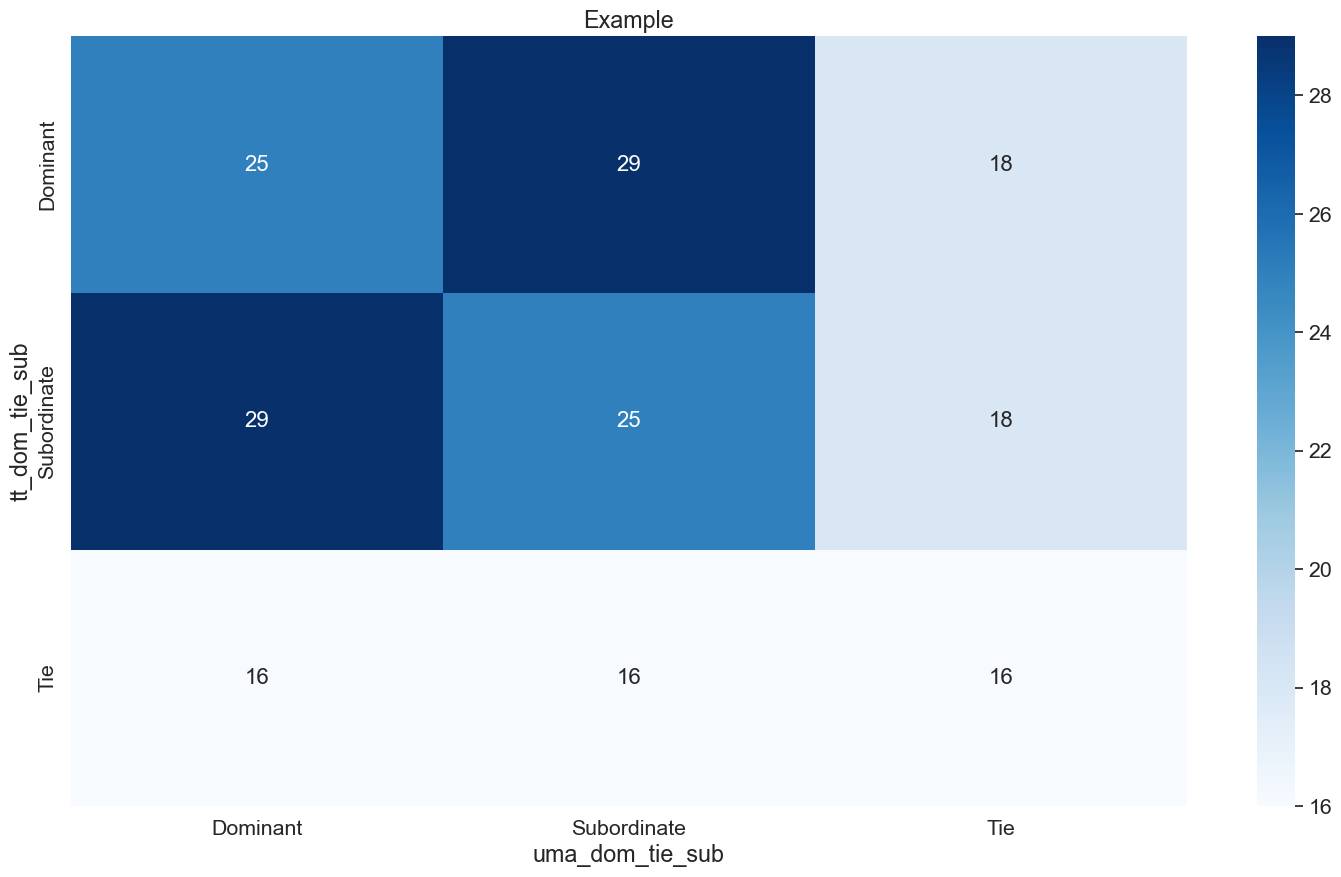

In [79]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(tt_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.title("Example")
plt.show()

In [80]:
dom_tie_sub_col = [col for col in exploded_pairwise_and_final_elo_score_df if "dom_tie_sub" in col]

In [81]:
dom_tie_sub_col

['uma_dom_tie_sub', 'hco_dom_tie_sub', 'tt_dom_tie_sub', 'rc_dom_tie_sub']

In [82]:
acronym_to_assay = {"tt": "Tube Test", "hco": "Home Cage", "uma": "Urine Marking", "rc": "Reward Competition"}

In [83]:
"abs" < "zyx"

True

In [277]:
from openpyxl import load_workbook

In [ ]:

 
 
# Creating first dataframe
DataSample1= [[10,'value1'], 
             [20,'value2'], 
             [30,'value3']]
SimpleDataFrame1=pd.DataFrame(data=DataSample1, columns=['Col1','Col2'])
print(SimpleDataFrame1)
 
# Creating second dataframe
DataSample2= [[100,'A'], 
             [200,'B'], 
             [300,'C']]
SimpleDataFrame2=pd.DataFrame(data=DataSample2, columns=['colA','colB'])
print(SimpleDataFrame2)
 
# Adding the DataFrames to the excel as a new sheet
SimpleDataFrame1.to_excel(writer, sheet_name = 'Data1')
SimpleDataFrame2.to_excel(writer, sheet_name = 'Data2')
writer.save()
writer.close()



In [279]:
FilePath = "./proc/pair_wise_punnet_square.xlsx"

In [325]:
pair_wise_dominance_df_list = []
for assay_1, assay_2 in itertools.product(dom_tie_sub_col, dom_tie_sub_col):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]
    
    pair_wise_df = pd.DataFrame(exploded_pairwise_and_final_elo_score_df.groupby(["strain", assay_1, assay_2]).size()).reset_index()
    pair_wise_df = pair_wise_df.rename(columns={0: "{}_{}_count".format(acronym_1, acronym_2)})
    pair_wise_df = pair_wise_df.rename(columns={assay_1: "{}_with_{}".format(assay_1, acronym_2), assay_2: "{}_with_{}".format(assay_2, acronym_1)})
    pair_wise_dominance_df_list.append(pair_wise_df)

In [291]:
acronym_1

'rc'

In [ ]:
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])

In [334]:
pair_wise_dominance_df = pd.concat(pair_wise_dominance_df_list, axis = 1)

In [312]:
strain_df[dom_tie_sub_col + ["strain"]]

uma_dom_tie_sub hco_dom_tie_sub tt_dom_tie_sub rc_dom_tie_sub strain
12        Dominant        Dominant    Subordinate       Dominant    CD1
12     Subordinate     Subordinate       Dominant    Subordinate    CD1
13        Dominant             Tie    Subordinate       Dominant    CD1
13     Subordinate             Tie       Dominant    Subordinate    CD1
14             Tie        Dominant    Subordinate       Dominant    CD1
..             ...             ...            ...            ...    ...
93        Dominant     Subordinate    Subordinate            Tie    CD1
94     Subordinate     Subordinate            Tie    Subordinate    CD1
94        Dominant        Dominant            Tie       Dominant    CD1
95        Dominant     Subordinate    Subordinate       Dominant    CD1
95     Subordinate        Dominant       Dominant    Subordinate    CD1

[96 rows x 5 columns]

In [332]:
pair_wise_dominance_df = pair_wise_dominance_df.loc[:,~pair_wise_dominance_df.columns.duplicated()].copy()

In [337]:
pair_wise_dominance_df

strain hco_dom_tie_sub_with_uma uma_dom_tie_sub_with_hco  hco_uma_count  \
0     C57                 Dominant                 Dominant            9.0   
1     C57                 Dominant              Subordinate            2.0   
2     C57                 Dominant                      Tie            1.0   
3     C57              Subordinate                 Dominant            2.0   
4     C57              Subordinate              Subordinate            9.0   
5     C57              Subordinate                      Tie            1.0   
6     C57                      Tie                 Dominant            4.0   
7     C57                      Tie              Subordinate            4.0   
8     C57                      Tie                      Tie           12.0   
9     CD1                 Dominant                 Dominant           12.0   
10    CD1                 Dominant              Subordinate            4.0   
11    CD1                 Dominant                      Tie            9.0   
12    CD1              Subordinate                 Dominant            4.0   
13    CD1              Subordinate              Subordinate           12.0   
14    CD1              Subordinate                      Tie            9.0   
15    CD1                      Tie                 Dominant           12.0   
16    CD1                      Tie              Subordinate           12.0   
17    NaN                      NaN                      NaN            NaN   

   strain tt_dom_tie_sub_with_uma uma_dom_tie_sub_with_tt  tt_uma_count  \
0     C57                Dominant                Dominant            16   
1     C57                Dominant             Subordinate             9   
2     C57                Dominant                     Tie            10   
3     C57             Subordinate                Dominant             9   
4     C57             Subordinate             Subordinate            16   
5     C57             Subordinate                     Tie            10   
6     C57                     Tie                Dominant             8   
7     C57                     Tie             Subordinate             8   
8     C57                     Tie                     Tie            10   
9     CD1                Dominant                Dominant             9   
10    CD1                Dominant             Subordinate            20   
11    CD1                Dominant                     Tie             8   
12    CD1             Subordinate                Dominant            20   
13    CD1             Subordinate             Subordinate             9   
14    CD1             Subordinate                     Tie             8   
15    CD1                     Tie                Dominant             8   
16    CD1                     Tie             Subordinate             8   
17    CD1                     Tie                     Tie             6   

   strain rc_dom_tie_sub_with_uma  ... uma_dom_tie_sub_with_rc  rc_uma_count  \
0     C57                Dominant  ...                Dominant            13   
1     C57                Dominant  ...             Subordinate             7   
2     C57                Dominant  ...                     Tie             8   
3     C57             Subordinate  ...                Dominant             7   
4     C57             Subordinate  ...             Subordinate            13   
5     C57             Subordinate  ...                     Tie             7   
6     C57                     Tie  ...                Dominant            13   
7     C57                     Tie  ...             Subordinate            13   
8     C57                     Tie  ...                     Tie            14   
9     CD1                Dominant  ...                Dominant            18   
10    CD1                Dominant  ...             Subordinate             6   
11    CD1                Dominant  ...                     Tie            10   
12    CD1             Subordinate  ...                

In [336]:
pair_wise_dominance_df.to_csv("./proc/pair_wise_punnet_square.csv")

hco_dom_tie_sub
uma_dom_tie_sub


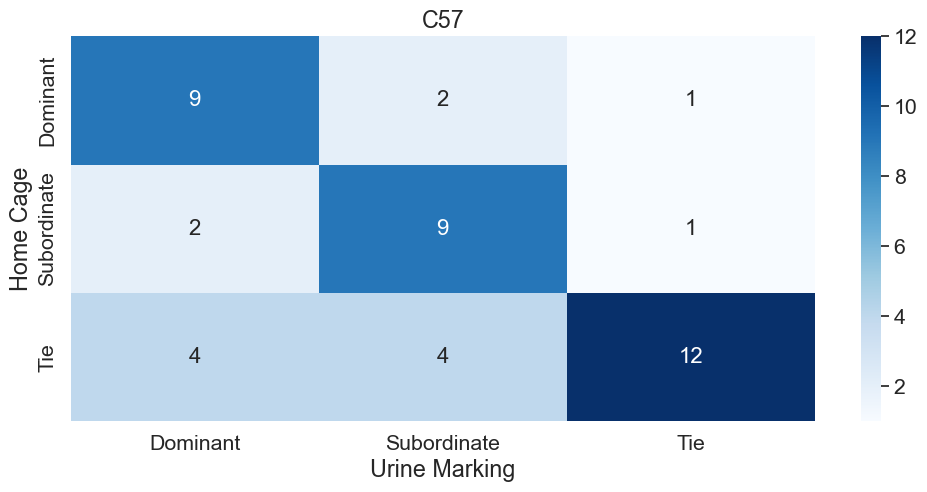

hco_dom_tie_sub
uma_dom_tie_sub


/tmp/ipykernel_487755/2209294781.py:41: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = ExcelWorkbook


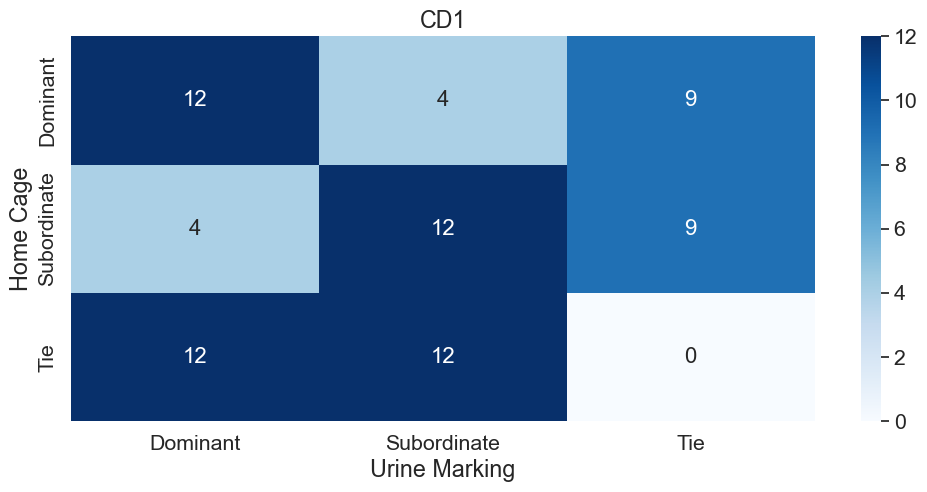

tt_dom_tie_sub
uma_dom_tie_sub


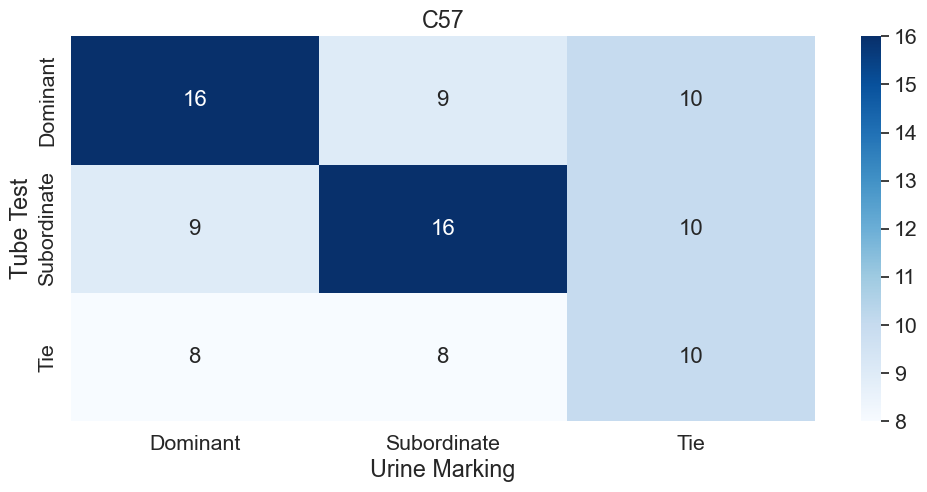

tt_dom_tie_sub
uma_dom_tie_sub


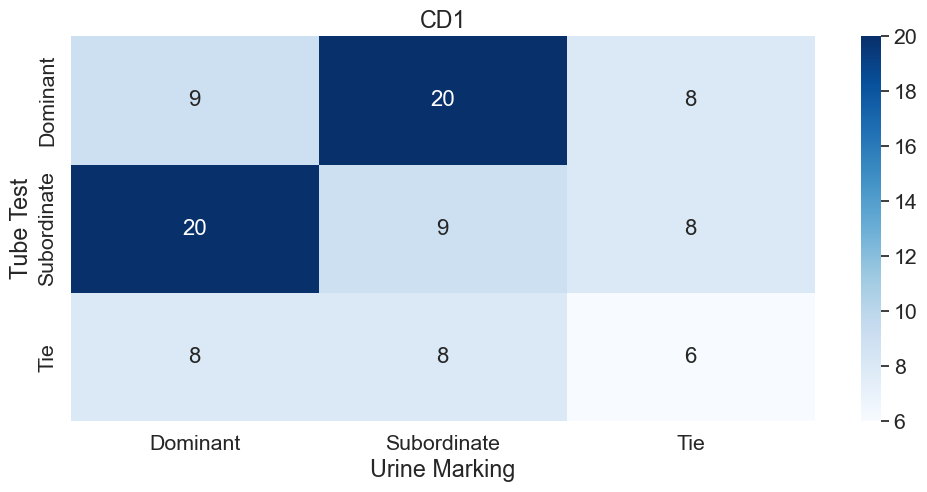

rc_dom_tie_sub
uma_dom_tie_sub


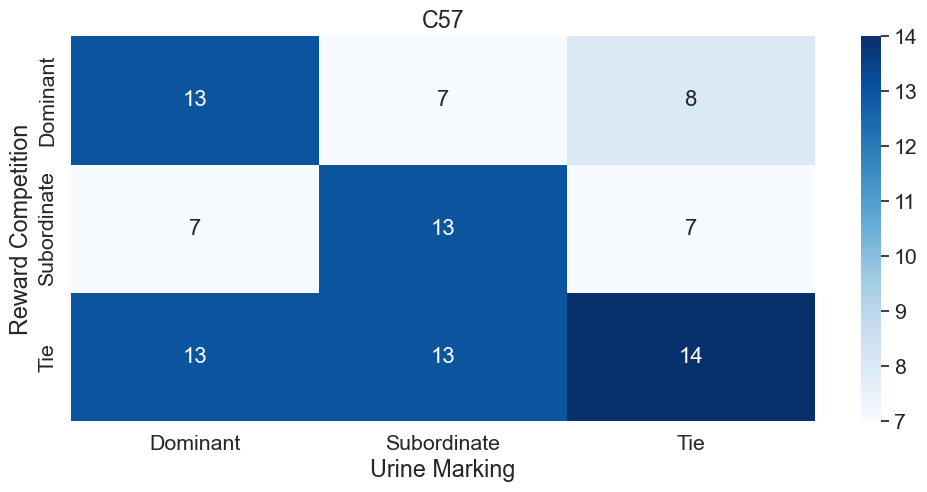

rc_dom_tie_sub
uma_dom_tie_sub


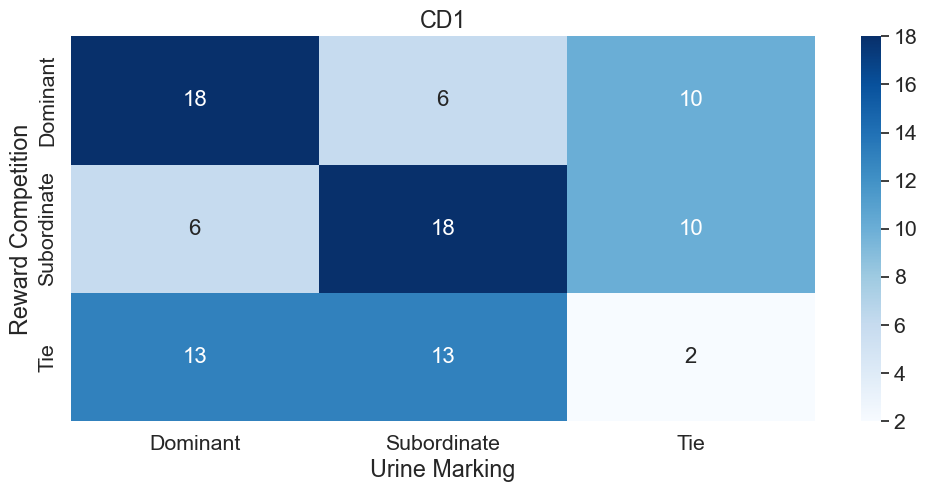

hco_dom_tie_sub
uma_dom_tie_sub


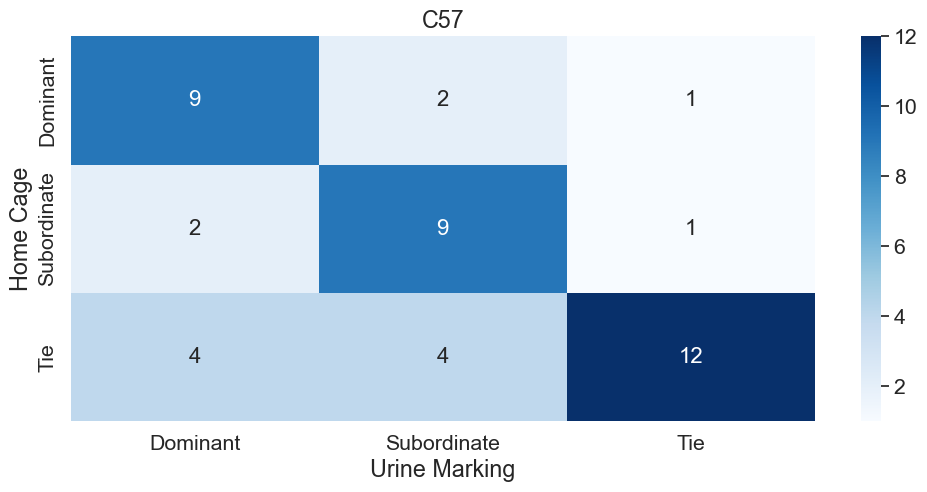

hco_dom_tie_sub
uma_dom_tie_sub


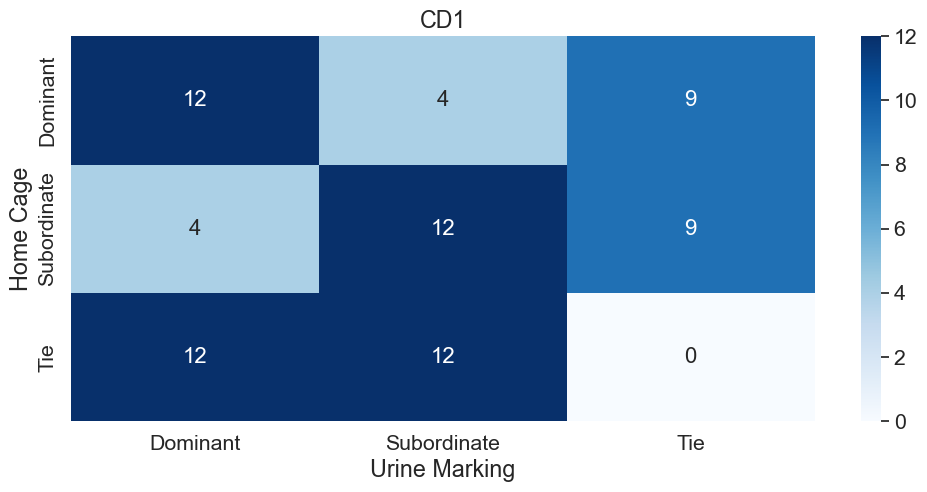

hco_dom_tie_sub
tt_dom_tie_sub


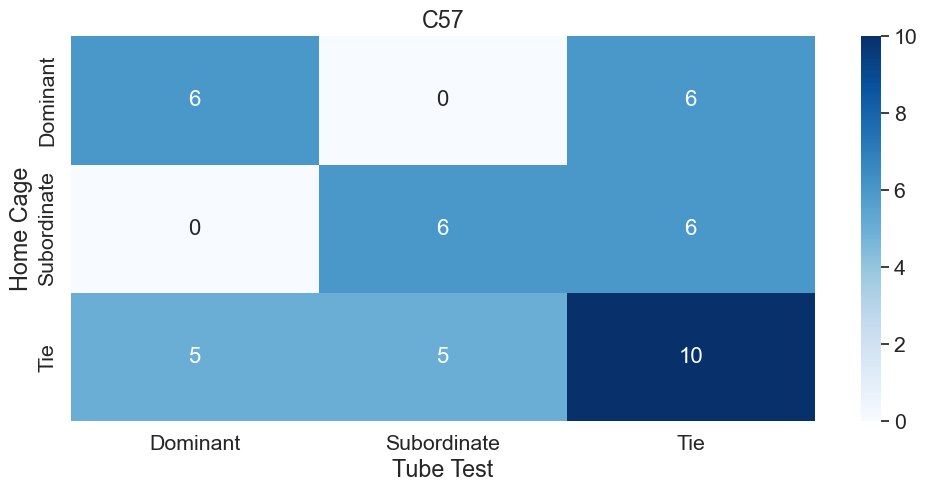

hco_dom_tie_sub
tt_dom_tie_sub


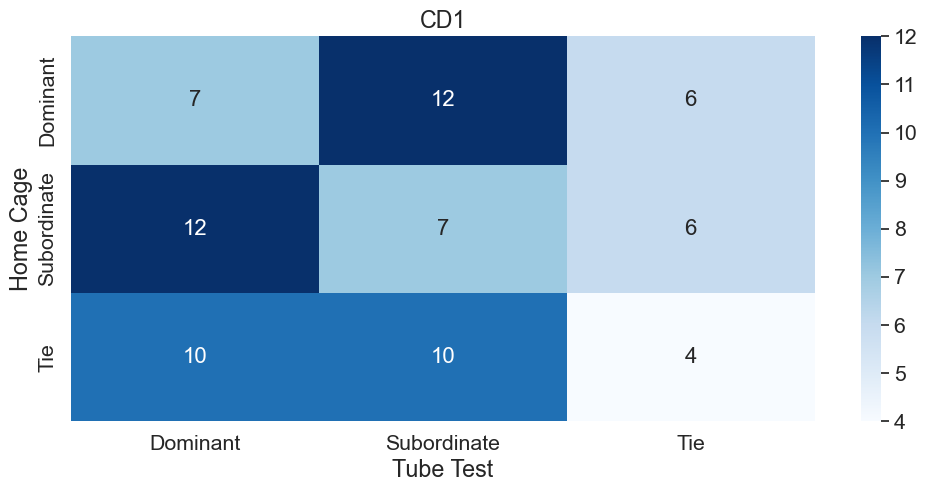

hco_dom_tie_sub
rc_dom_tie_sub


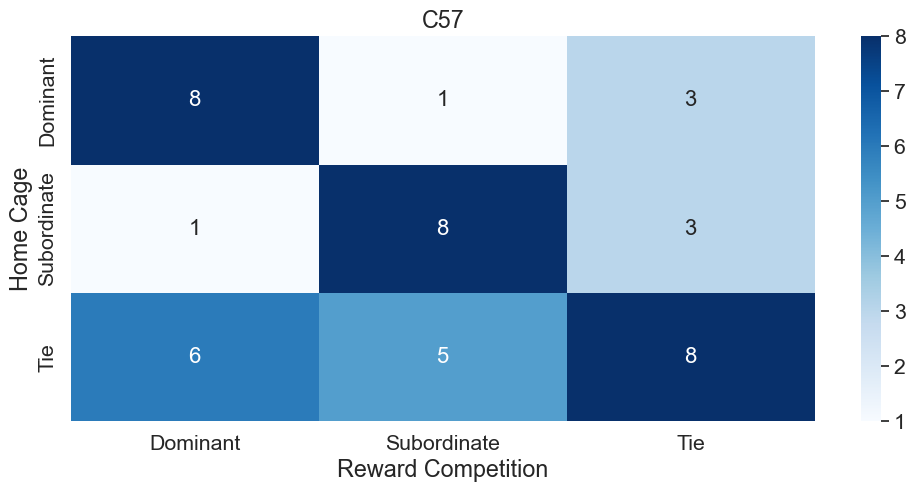

hco_dom_tie_sub
rc_dom_tie_sub


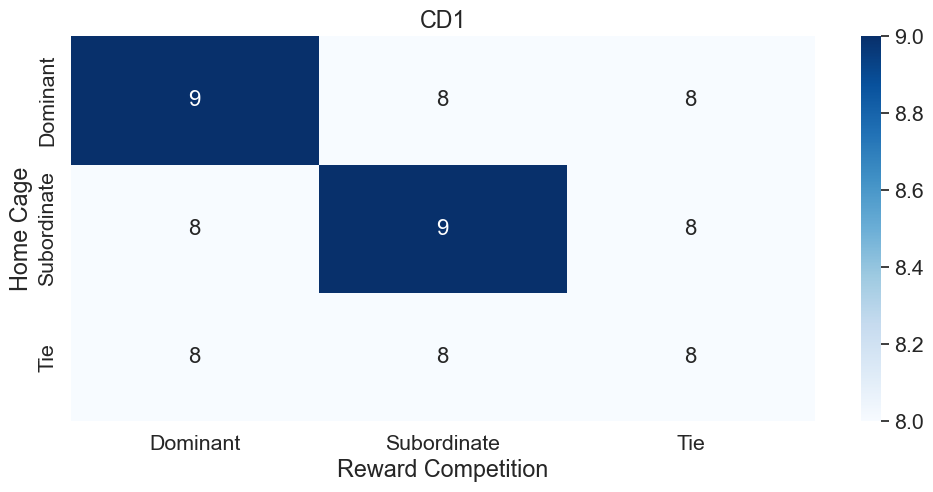

tt_dom_tie_sub
uma_dom_tie_sub


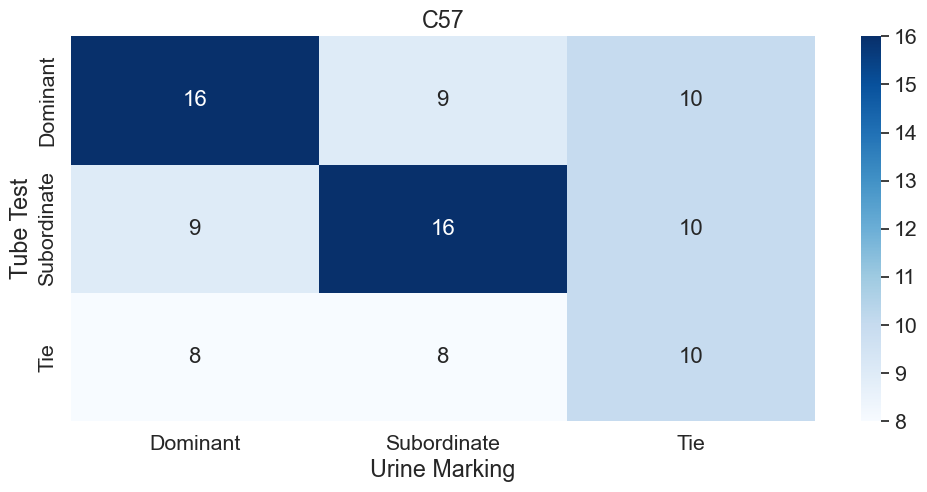

tt_dom_tie_sub
uma_dom_tie_sub


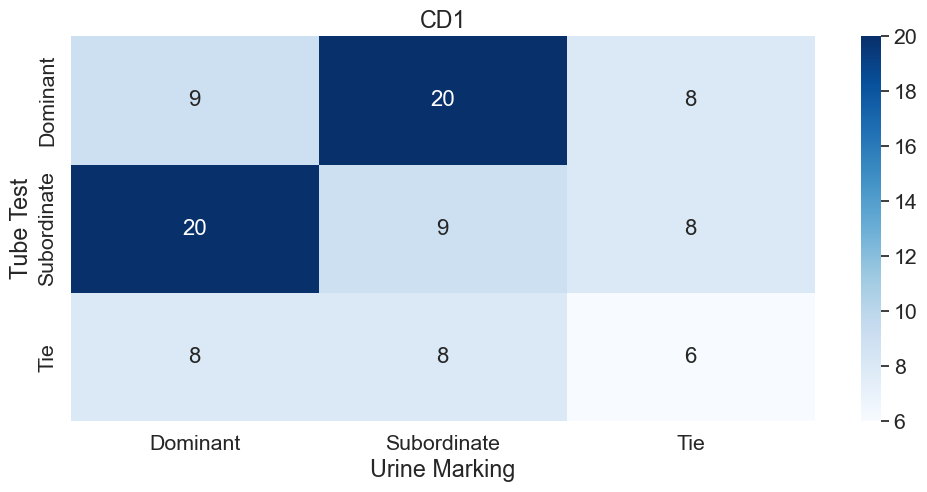

hco_dom_tie_sub
tt_dom_tie_sub


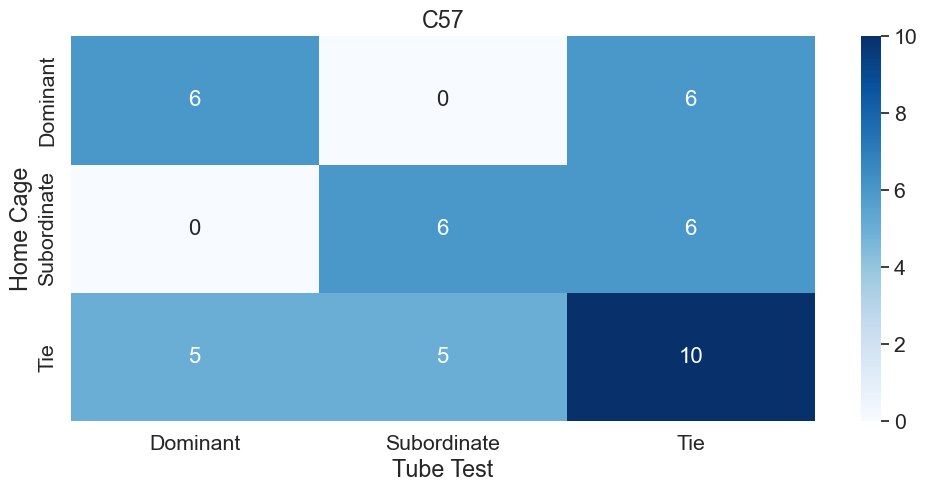

hco_dom_tie_sub
tt_dom_tie_sub


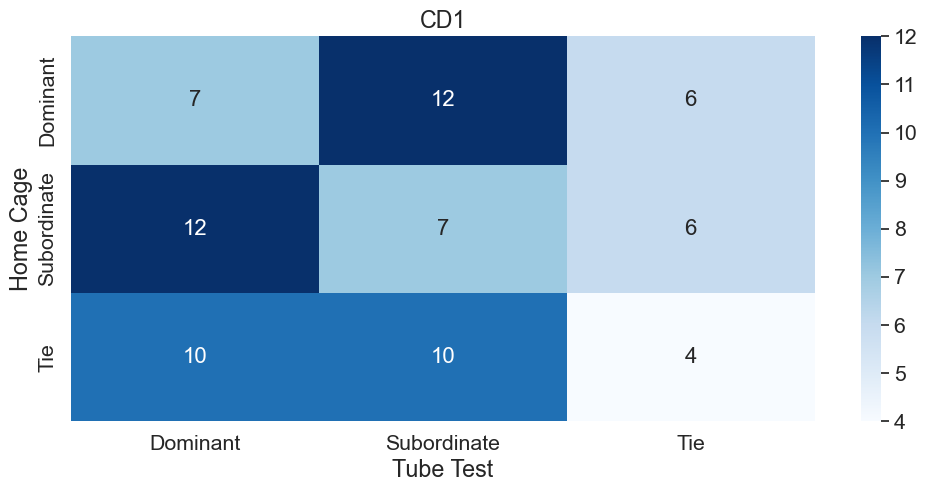

rc_dom_tie_sub
tt_dom_tie_sub


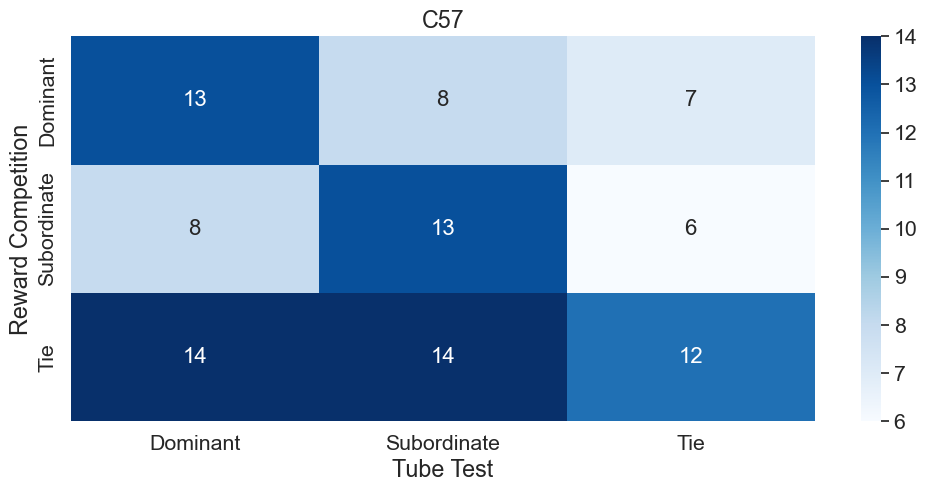

rc_dom_tie_sub
tt_dom_tie_sub


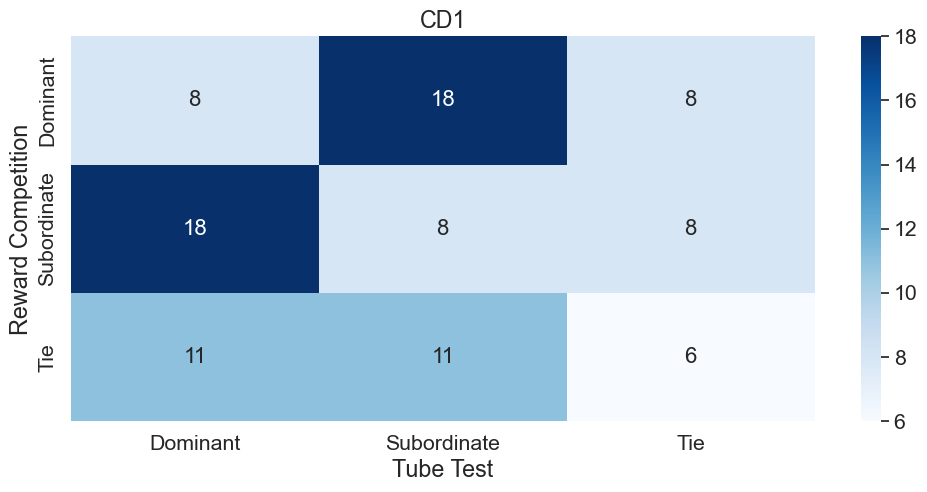

rc_dom_tie_sub
uma_dom_tie_sub


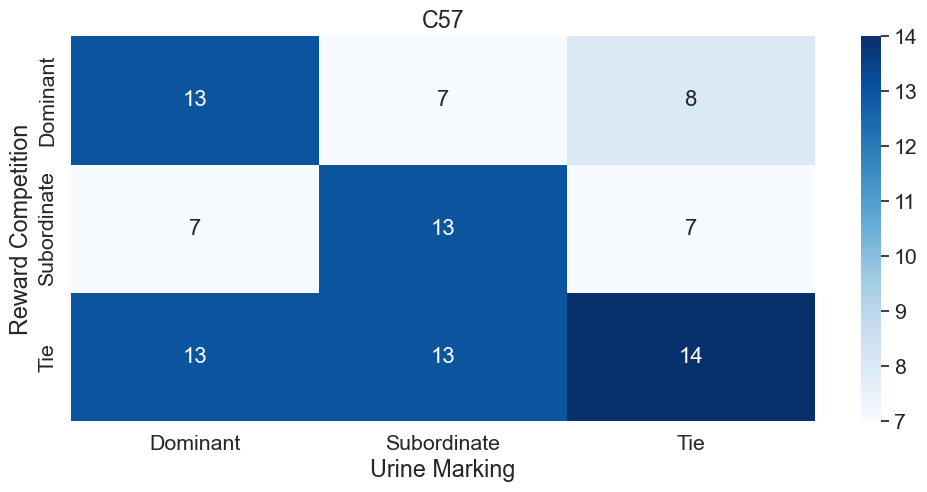

rc_dom_tie_sub
uma_dom_tie_sub


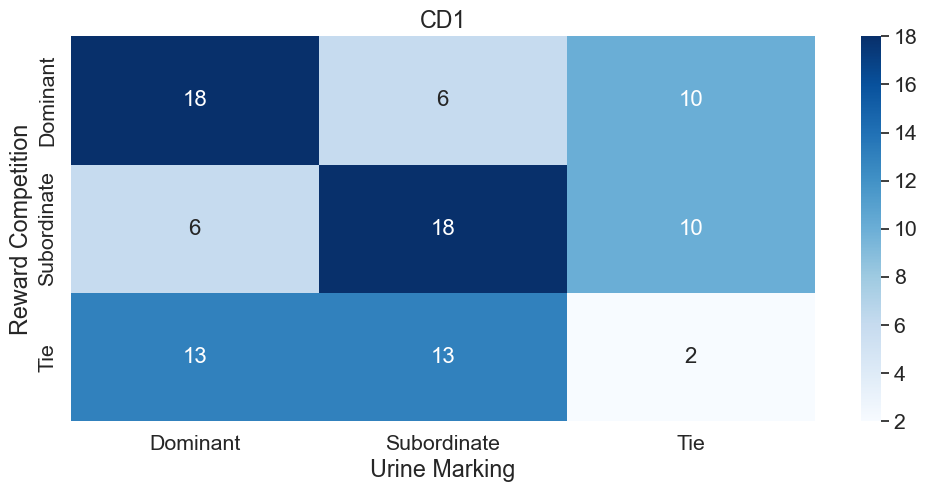

hco_dom_tie_sub
rc_dom_tie_sub


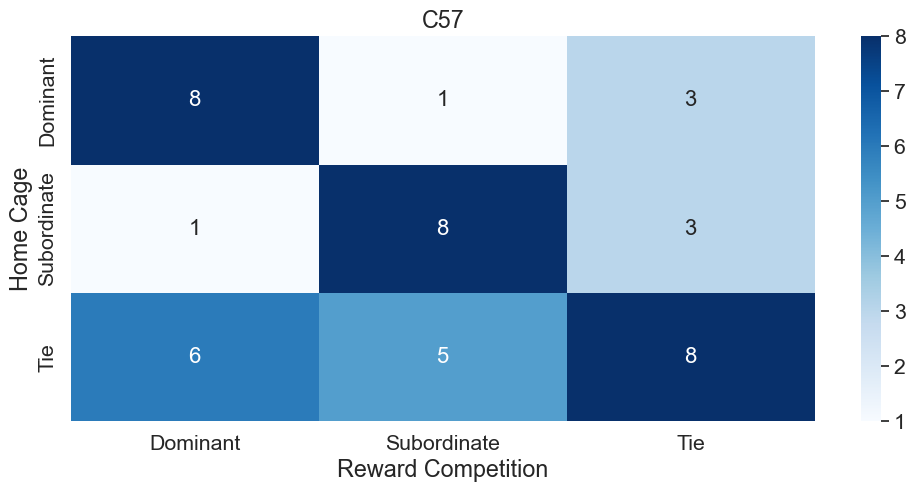

hco_dom_tie_sub
rc_dom_tie_sub


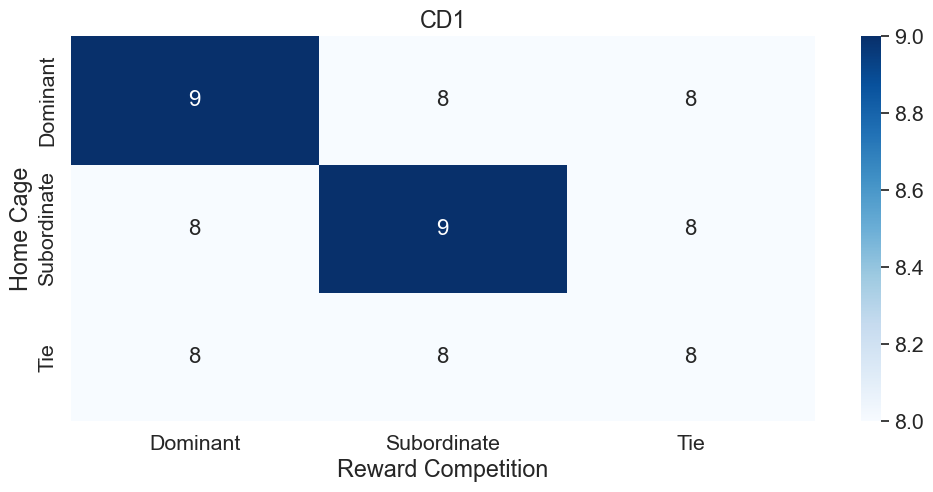

rc_dom_tie_sub
tt_dom_tie_sub


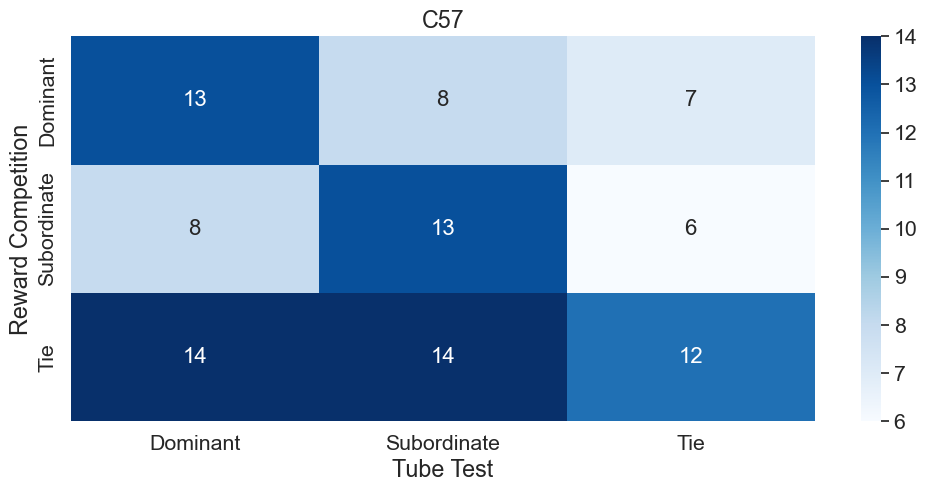

rc_dom_tie_sub
tt_dom_tie_sub


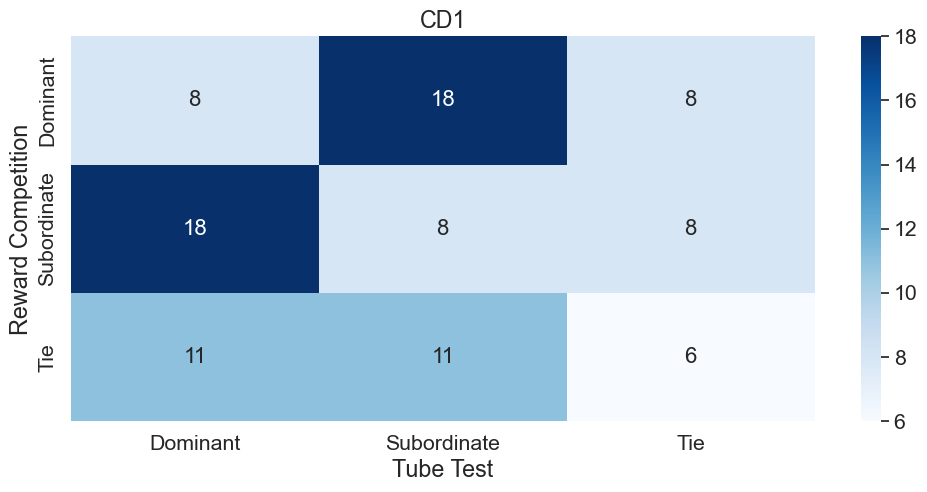

/tmp/ipykernel_487755/2209294781.py:45: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [292]:
excel_output = None

for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion.reindex(["Dominant", "Subordinate", "Tie"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.svg".format(strain, acronym_1, acronym_2))
    plt.show()
    
    pair_assay_confusion["strain"] = strain
    pair_assay_confusion["column_assay"] = acronym_to_assay[acronym_1]
    pair_assay_confusion["row_assay"] = acronym_to_assay[acronym_2]

    if excel_output is None:
        pair_assay_confusion.to_excel(FilePath, sheet_name="{}_{}_{}".format(strain, acronym_1, acronym_2))
        excel_output = writer
        # Generating workbook
        ExcelWorkbook = load_workbook(FilePath)

        # Generating the writer engine
        writer = pd.ExcelWriter(FilePath, engine = 'openpyxl')

        # Assigning the workbook to the writer engine
        writer.book = ExcelWorkbook
    else:
        pair_assay_confusion.to_excel(writer, sheet_name="{}_{}_{}".format(strain, acronym_1, acronym_2))
    
writer.save()
writer.close()

In [289]:
pair_assay_confusion.index.name

'rc_dom_tie_sub'

## Reward Competition Winner vs Loser Disctribution

In [85]:
import matplotlib.colors as mcolors

hco_dom_tie_sub
uma_dom_tie_sub


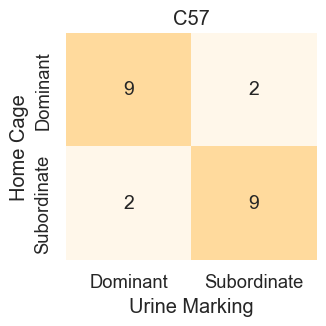

hco_dom_tie_sub
uma_dom_tie_sub


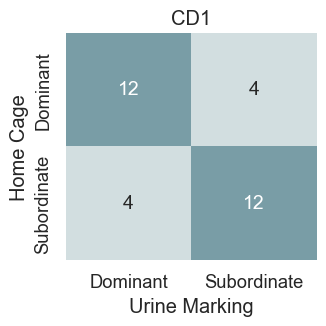

tt_dom_tie_sub
uma_dom_tie_sub


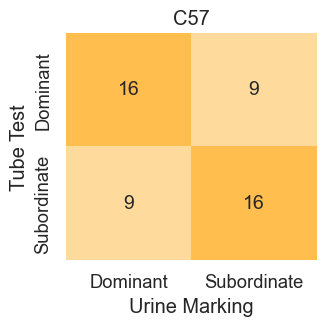

tt_dom_tie_sub
uma_dom_tie_sub


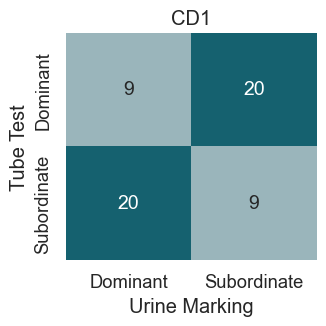

rc_dom_tie_sub
uma_dom_tie_sub


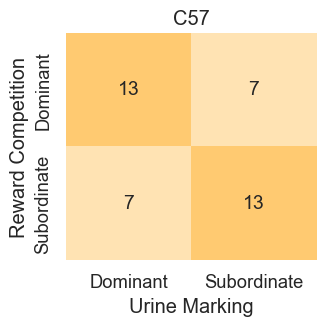

rc_dom_tie_sub
uma_dom_tie_sub


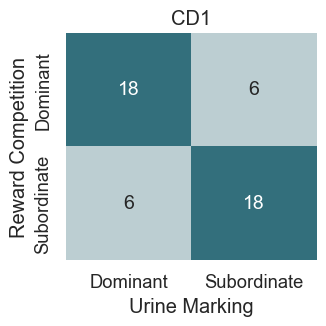

hco_dom_tie_sub
uma_dom_tie_sub


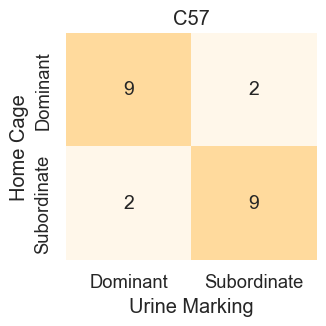

hco_dom_tie_sub
uma_dom_tie_sub


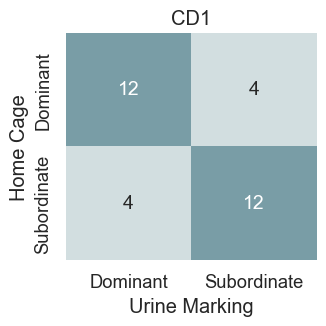

hco_dom_tie_sub
tt_dom_tie_sub


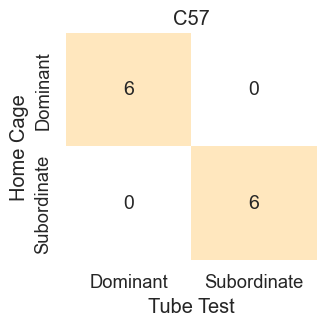

hco_dom_tie_sub
tt_dom_tie_sub


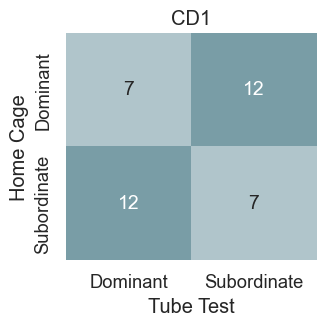

hco_dom_tie_sub
rc_dom_tie_sub


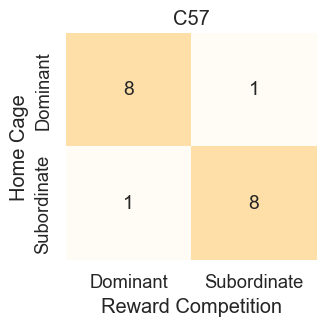

hco_dom_tie_sub
rc_dom_tie_sub


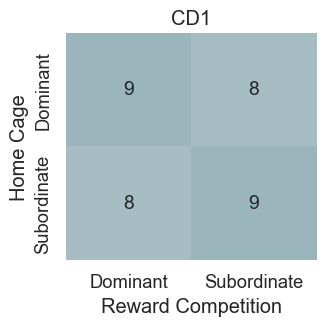

tt_dom_tie_sub
uma_dom_tie_sub


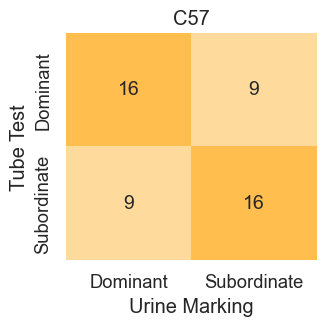

tt_dom_tie_sub
uma_dom_tie_sub


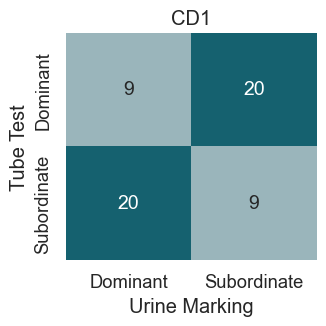

hco_dom_tie_sub
tt_dom_tie_sub


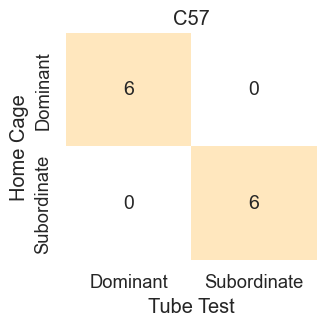

hco_dom_tie_sub
tt_dom_tie_sub


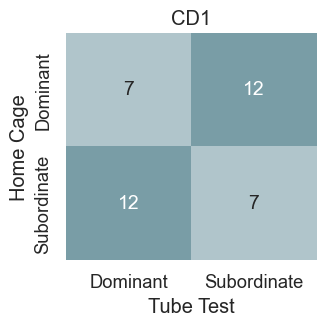

rc_dom_tie_sub
tt_dom_tie_sub


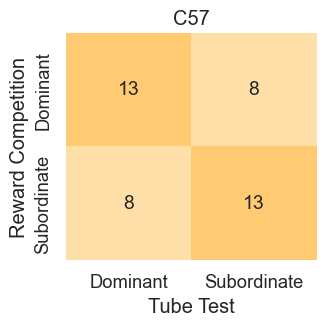

rc_dom_tie_sub
tt_dom_tie_sub


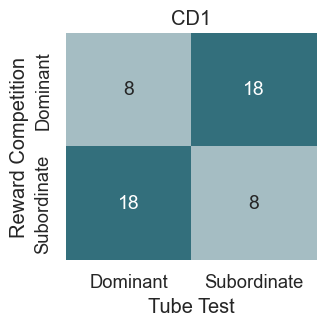

rc_dom_tie_sub
uma_dom_tie_sub


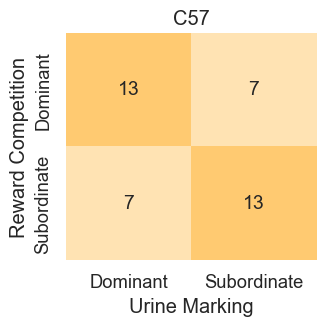

rc_dom_tie_sub
uma_dom_tie_sub


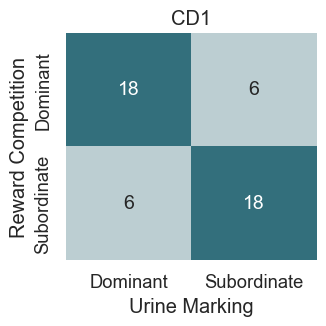

hco_dom_tie_sub
rc_dom_tie_sub


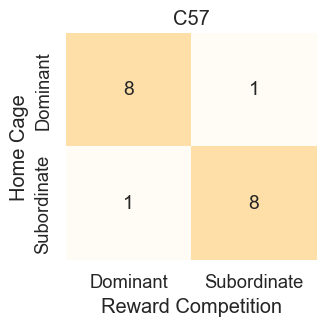

hco_dom_tie_sub
rc_dom_tie_sub


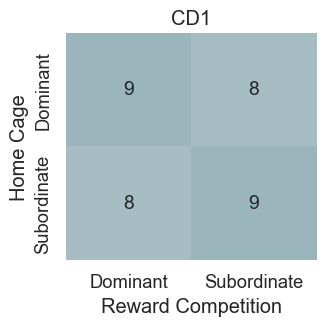

rc_dom_tie_sub
tt_dom_tie_sub


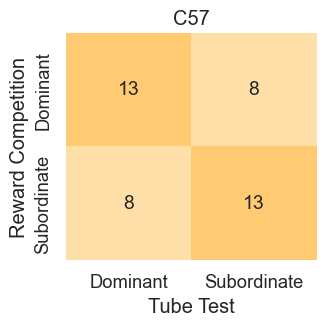

rc_dom_tie_sub
tt_dom_tie_sub


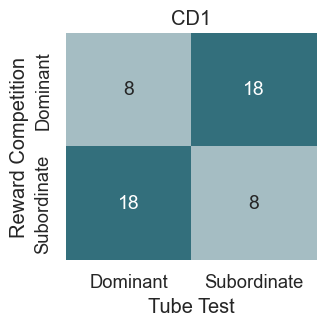

In [86]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion[["Dominant", "Subordinate"]].loc[["Dominant", "Subordinate"]]
    pair_assay_confusion = pair_assay_confusion.reindex(["Dominant", "Subordinate"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.2, font="Arial", rc={'figure.figsize':(3.5,3.5)}) # for label size
    if "CD1" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#e6ecee", "#cddadd", "#b4c8cd", "#9bb6bc", "#83a4ac", "#6b939d", "#52828d", "#37717e", "#15616f"])

    elif "C57" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#fff6e7", "#ffedce", "#ffe4b6", "#ffdb9e", "#ffd286", "#ffc96d", "#ffc053", "#ffb836", "#ffaf00"])

    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 14}, cmap=color, vmin=0, vmax=20, cbar=False) # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1], )
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.tight_layout() 
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.svg".format(strain, acronym_1, acronym_2))
    
    plt.show()

In [87]:
pair_assay_confusion

tt_dom_tie_sub  Dominant  Subordinate
rc_dom_tie_sub                       
Dominant               8           18
Subordinate           18            8

hco_dom_tie_sub
uma_dom_tie_sub


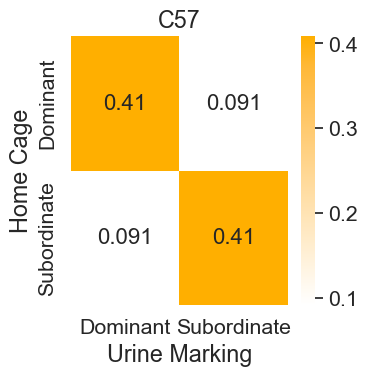

hco_dom_tie_sub
uma_dom_tie_sub


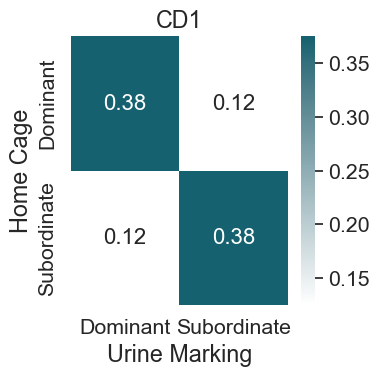

tt_dom_tie_sub
uma_dom_tie_sub


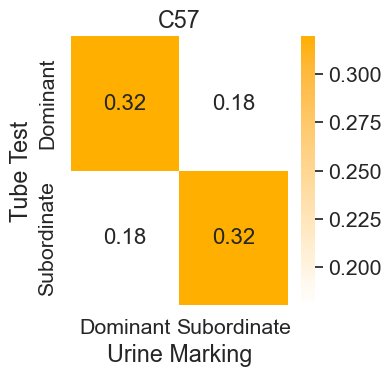

tt_dom_tie_sub
uma_dom_tie_sub


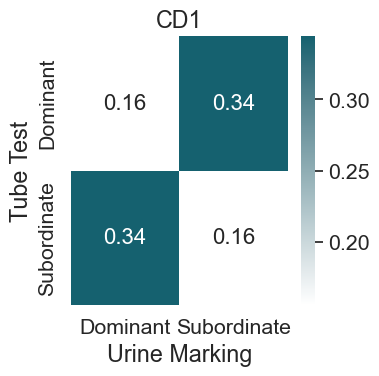

rc_dom_tie_sub
uma_dom_tie_sub


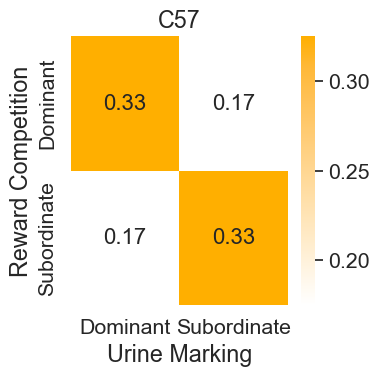

rc_dom_tie_sub
uma_dom_tie_sub


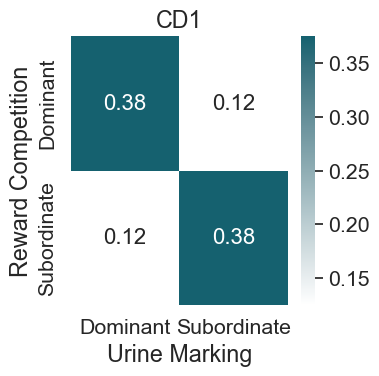

hco_dom_tie_sub
uma_dom_tie_sub


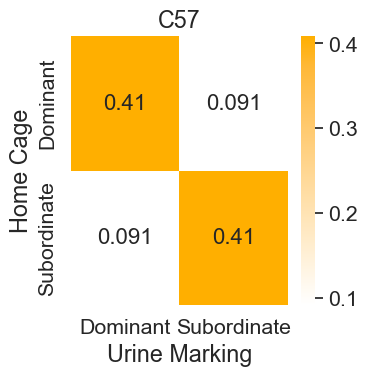

hco_dom_tie_sub
uma_dom_tie_sub


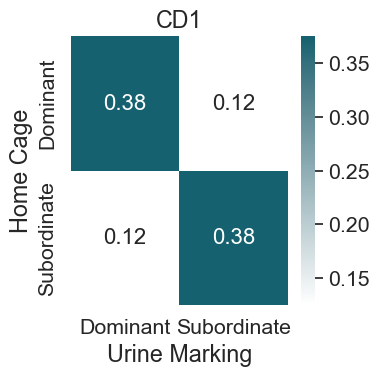

hco_dom_tie_sub
tt_dom_tie_sub


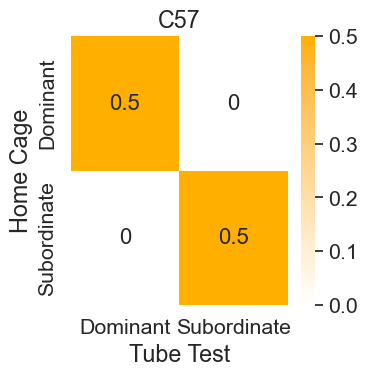

hco_dom_tie_sub
tt_dom_tie_sub


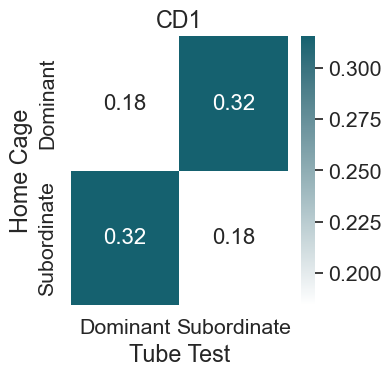

hco_dom_tie_sub
rc_dom_tie_sub


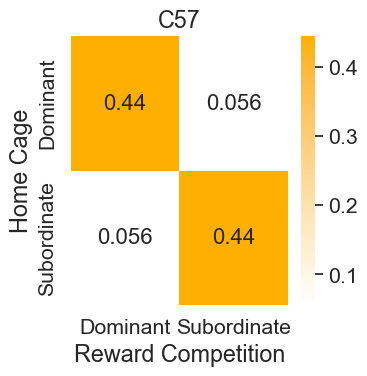

hco_dom_tie_sub
rc_dom_tie_sub


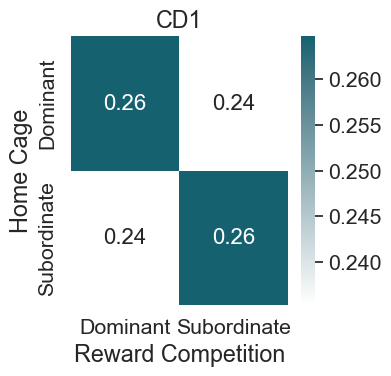

tt_dom_tie_sub
uma_dom_tie_sub


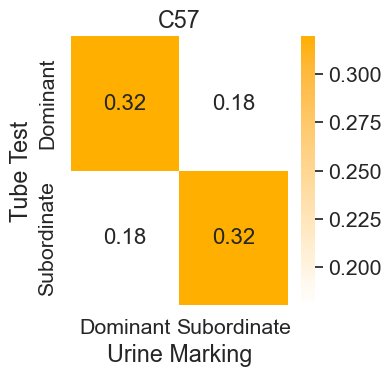

tt_dom_tie_sub
uma_dom_tie_sub


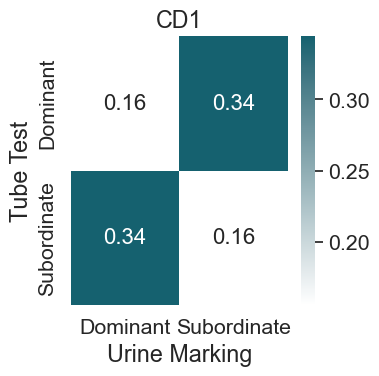

hco_dom_tie_sub
tt_dom_tie_sub


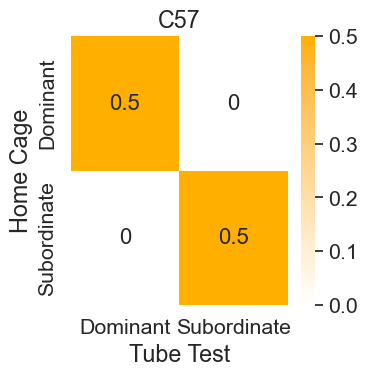

hco_dom_tie_sub
tt_dom_tie_sub


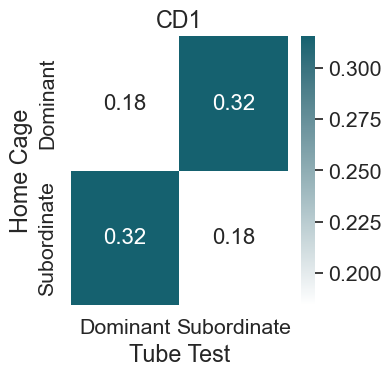

rc_dom_tie_sub
tt_dom_tie_sub


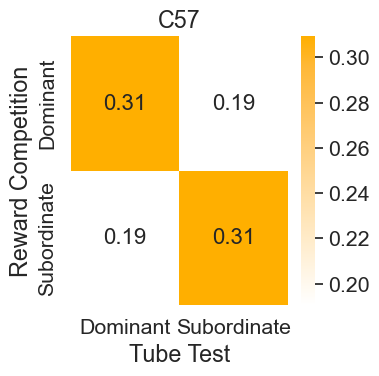

rc_dom_tie_sub
tt_dom_tie_sub


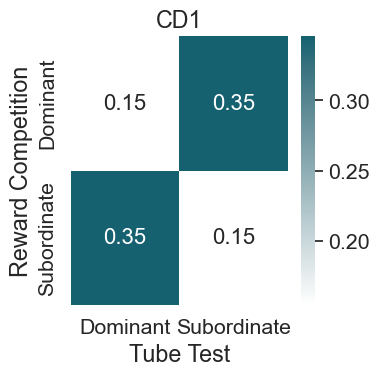

rc_dom_tie_sub
uma_dom_tie_sub


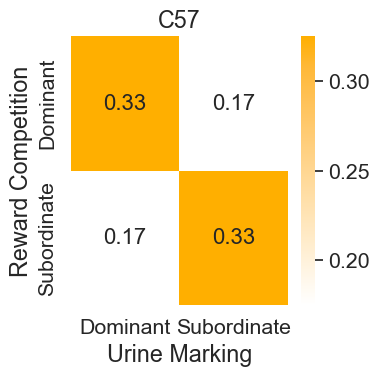

rc_dom_tie_sub
uma_dom_tie_sub


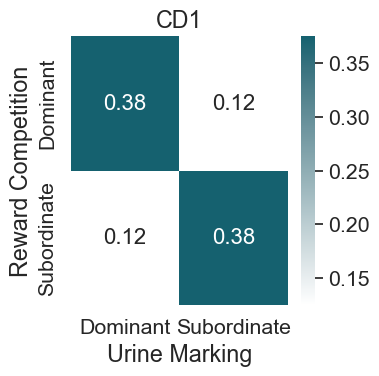

hco_dom_tie_sub
rc_dom_tie_sub


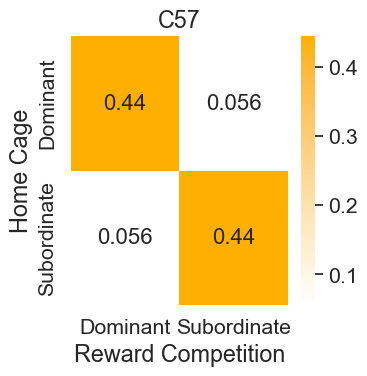

hco_dom_tie_sub
rc_dom_tie_sub


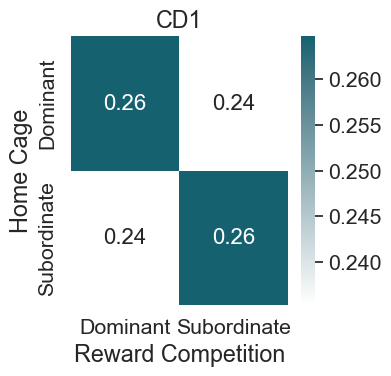

rc_dom_tie_sub
tt_dom_tie_sub


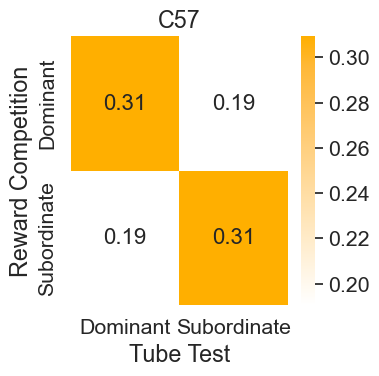

rc_dom_tie_sub
tt_dom_tie_sub


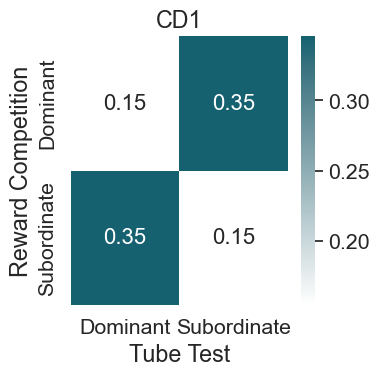

In [88]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion[["Dominant", "Subordinate"]].loc[["Dominant", "Subordinate"]]
    pair_assay_confusion = pair_assay_confusion / pair_assay_confusion.to_numpy().sum()
    pair_assay_confusion = pair_assay_confusion.reindex(["Dominant", "Subordinate"])

    if "CD1" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#e6ecee", "#cddadd", "#b4c8cd", "#9bb6bc", "#83a4ac", "#6b939d", "#52828d", "#37717e", "#15616f"])

    elif "C57" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#fff6e7", "#ffedce", "#ffe4b6", "#ffdb9e", "#ffd286", "#ffc96d", "#ffc053", "#ffb836", "#ffaf00"])
    
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap=color) # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet_no_tie_and_proportion.svg".format(strain, acronym_1, acronym_2))
    plt.show()

# Reward Competition Wins Based on Other Assay Ranks

In [89]:
all_reward_comp_file_paths = glob.glob("./pilot*/**/*reward_competition_all_competition*.csv", recursive=True)

In [90]:
all_reward_comp_file_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_all_competition_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20221003_20221004/pilot_3_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20221003_20221004.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20220728_20220729/pilot_2_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20220728_20220729.csv']

In [91]:
all_reward_comp_df = []
for file_path in all_reward_comp_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    all_reward_comp_df.append(per_experiment_df)

In [92]:
combined_reward_comp_df = pd.concat(all_reward_comp_df)
combined_reward_comp_df = combined_reward_comp_df.reset_index(drop=True)

In [93]:
combined_reward_comp_df["rc_averaged_loser"] = combined_reward_comp_df["rc_averaged_loser"].astype(str)
combined_reward_comp_df["rc_averaged_winner"] = combined_reward_comp_df["rc_averaged_winner"].astype(str)

In [94]:
combined_reward_comp_df.head()

rc_animal_ids     rc_date  \
0  ('1.1', '1.2')  2022-05-19   
1  ('1.1', '1.2')  2022-05-20   
2  ('1.1', '1.3')  2022-05-19   
3  ('1.1', '1.3')  2022-05-20   
4  ('1.1', '1.4')  2022-05-19   

                                           rc_winner  \
0  ['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....   
1  ['1.1', 'tie', '1.2', 'tie', '1.2', 'tie', '1....   
2  ['1.3', 'tie', '1.3', '1.1', '1.1', '1.3', '1....   
3  ['1.1', 'tie', '1.3', '1.1', '1.1', '1.1', '1....   
4  ['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....   

                                            rc_loser  \
0  ['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....   
1  ['1.2', 'tie', '1.1', 'tie', '1.1', 'tie', '1....   
2  ['1.1', 'tie', '1.1', '1.3', '1.3', '1.1', '1....   
3  ['1.3', 'tie', '1.1', '1.3', '1.3', '1.3', '1....   
4  ['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....   

                                   rc_winner_no_ties  \
0  ['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....   
1  ['1.1', '1.2', '1.2', '1.1', '1.1', '1.1', '1....   
2  ['1.3', '1.3', '1.1', '1.1', '1.3', '1.3', '1....   
3  ['1.1', '1.3', '1.1', '1.1', '1.1', '1.1', '1....   
4  ['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....   

                                    rc_loser_no_ties  \
0  ['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....   
1  ['1.2', '1.1', '1.1', '1.2', '1.2', '1.2', '1....   
2  ['1.1', '1.1', '1.3', '1.3', '1.1', '1.1', '1....   
3  ['1.3', '1.1', '1.3', '1.3', '1.3', '1.3', '1....   
4  ['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....   

                     rc_different_result_as_previous  rc_number_of_switches  \
0  [False, False, False, True, False, True, True,...                      8   
1  [True, False, True, False, False, True, False,...                      4   
2  [False, True, False, True, False, False, True,...                      6   
3  [True, True, False, False, False, False, False...                      4   
4  [True, True, False, True, True, True, True, Fa...                      9   

    cohort  processed_cage_number  ... rc_averaged_loser rc_winner_count  \
0  pilot_1                      1  ...               1.2              11   
1  pilot_1                      1  ...               1.2               5   
2  pilot_1                      1  ...               1.1              13   
3  pilot_1                      1  ...               1.3              15   
4  pilot_1                      1  ...               1.1              13   

  rc_loser_count  rc_tie_count  rc_all_match_count_including_ties  \
0              9             0                                 20   
1              4            10                                 19   
2              4             2                                 19   
3              3             2                                 20   
4              7             0                                 20   

   rc_winner_count_minus_loser_count  rc_win_to_win_plus_lost_ratio  \
0                                  2                       0.550000   
1                                  1                       0.555556   
2                                  9                       0.764706   
3                                 12                       0.833333   
4                                  6                       0.650000   

   rc_win_to_all_ratio  rc_is_win_to_win_and_loss_ratio_tie  \
0             0.550000                                 True   
1             0.263158                                 True   
2             0.684211                                False   
3             0.750000                                False   
4             0.650000                                False   

   rc_tie_to_all_ratio  
0             0.000000  
1             0.526316  
2             0.105263  
3             0.100000  
4             0.000000  

[5 rows x 22 columns]

In [95]:
winner_merged_final_elo_score_df = merged_final_elo_score_df.copy()
loser_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [96]:
winner_merged_final_elo_score_df.columns = ["winner_{}".format(col) for col in winner_merged_final_elo_score_df.columns]
loser_merged_final_elo_score_df.columns = ["loser_{}".format(col) for col in loser_merged_final_elo_score_df.columns]

In [97]:
winner_merged_final_elo_score_df.head()

winner_cohort winner_subject_id  \
0       pilot_1               1.1   
1       pilot_1               1.2   
2       pilot_1               1.3   
3       pilot_1               1.4   
4       pilot_1               2.1   

   winner_home_cage_observation_final_elo_score  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   winner_home_cage_observation_rank  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

   winner_reward_competition_final_elo_score  winner_reward_competition_rank  \
0                                     1165.8                             1.0   
1                                     1007.3                             2.0   
2                                      900.9                             4.0   
3                                      926.0                             3.0   
4                                     1144.7                             1.0   

   winner_tube_test_final_elo_score  winner_tube_test_rank  \
0                            1062.2                    2.0   
1                             927.1                    3.0   
2                             775.7                    4.0   
3                            1235.0                    1.0   
4                            1122.6                    2.0   

   winner_urine_marking_final_elo_score  winner_urine_marking_rank  
0                                1010.3                        2.0  
1                                1000.8                        3.0  
2                                 972.0                        4.0  
3                                1016.9                        1.0  
4                                1037.4                        1.0

In [98]:
winner_merged_final_elo_score_df.groupby(['winner_subject_id', "winner_cohort"]).count()

winner_home_cage_observation_final_elo_score  \
winner_subject_id winner_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 winner_home_cage_observation_rank  \
winner_subject_id winner_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 winner_reward_competition_final_elo_score  \
winner_subject_id winner_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 winner_reward_competition_rank  \
winner_subject_id winner_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 winner_tube_test_final_elo_score  \
winner_subject_id winner_cohort                                     
1.1               pilot_1                  

In [99]:
rc_all_competition_with_other_ranks_df = pd.merge(combined_reward_comp_df, winner_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_winner','cohort'], right_on = ['winner_subject_id','winner_cohort'])
rc_all_competition_with_other_ranks_df = pd.merge(rc_all_competition_with_other_ranks_df, loser_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_loser','cohort'], right_on = ['loser_subject_id','loser_cohort'])

In [100]:
rc_all_competition_with_other_ranks_df["rc_winner"] = rc_all_competition_with_other_ranks_df["rc_winner"].apply(lambda x: ast.literal_eval(x))
rc_all_competition_with_other_ranks_df["rc_loser"] = rc_all_competition_with_other_ranks_df["rc_loser"].apply(lambda x: ast.literal_eval(x))

In [101]:
rc_all_competition_with_other_ranks_df["list_of_animals"] = rc_all_competition_with_other_ranks_df["rc_animal_ids"].apply(lambda x: list(ast.literal_eval(x)))

In [102]:
rc_all_competition_with_other_ranks_df.tail()

rc_animal_ids     rc_date  \
186  ('6.2', '6.3')  2022-07-29   
187  ('6.2', '6.4')  2022-07-28   
188  ('6.2', '6.4')  2022-07-29   
189  ('6.3', '6.4')  2022-07-28   
190  ('6.3', '6.4')  2022-07-29   

                                             rc_winner  \
186  [6.2, 6.3, 6.3, 6.3, 6.2, 6.3, 6.3, 6.2, 6.3, ...   
187  [6.4, 6.4, 6.4, 6.4, 6.4, 6.4, tie, 6.2, tie, ...   
188  [6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...   
189  [6.3, 6.4, 6.4, 6.3, 6.3, 6.4, 6.3, 6.3, 6.3, ...   
190  [6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...   

                                              rc_loser  \
186  [6.3, 6.2, 6.2, 6.2, 6.3, 6.2, 6.2, 6.3, 6.2, ...   
187  [6.2, 6.2, 6.2, 6.2, 6.2, 6.2, tie, 6.4, tie, ...   
188  [6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...   
189  [6.4, 6.3, 6.3, 6.4, 6.4, 6.3, 6.4, 6.4, 6.4, ...   
190  [6.3, tie, 6.4, 6.4, tie, tie, 6.4, 6.4, 6.3, ...   

                                     rc_winner_no_ties  \
186  ['6.2', '6.3', '6.3', '6.3', '6.2', '6.3', '6....   
187  ['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....   
188  ['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....   
189  ['6.3', '6.4', '6.4', '6.3', '6.3', '6.4', '6....   
190  ['6.4', '6.3', '6.3', '6.3', '6.3', '6.4', '6....   

                                      rc_loser_no_ties  \
186  ['6.3', '6.2', '6.2', '6.2', '6.3', '6.2', '6....   
187  ['6.2', '6.2', '6.2', '6.2', '6.2', '6.2', '6....   
188  ['6.2', '6.2', '6.2', '6.2', '6.2', '6.2', '6....   
189  ['6.4', '6.3', '6.3', '6.4', '6.4', '6.3', '6....   
190  ['6.3', '6.4', '6.4', '6.4', '6.4', '6.3', '6....   

                       rc_different_result_as_previous  rc_number_of_switches  \
186  [True, False, False, True, True, False, True, ...                      9   
187  [False, False, False, False, False, True, True...                      2   
188  [False, False, False, False, False, False, Fal...                      0   
189  [True, False, True, False, True, True, False, ...                      9   
190  [True, False, False, False, True, True, True, ...                      7   

      cohort  processed_cage_number  ... loser_subject_id  \
186  pilot_2                      6  ...              6.2   
187  pilot_2                      6  ...              6.2   
188  pilot_2                      6  ...              6.2   
189  pilot_2                      6  ...              6.4   
190  pilot_2                      6  ...              6.4   

    loser_home_cage_observation_final_elo_score  \
186                                       779.7   
187                                       779.7   
188                                       779.7   
189                                      1080.4   
190                                      1080.4   

    loser_home_cage_observation_rank  \
186                              3.0   
187                              3.0   
188                              3.0   
189                              2.0   
190                              2.0   

     loser_reward_competition_final_elo_score  loser_reward_competition_rank  \
186                                     948.4                            3.0   
187                                     948.4                            3.0   
188                                     948.4                            3.0   
189                                     911.2                            4.0   
190                                     911.2                            4.0   

     loser_tube_test_final_elo_score  loser_tube_test_rank  \
186                           1031.7                   2.0   
187                           1031.7                   2.0   
188                           1031.7                   2.0   
189                           1114.1                   1.0   
190                           1114.1                   1.0   

     loser_urine_marking_final_elo_score  loser_urine_marking_rank  \
186                                962.5                       4.0   
187

In [103]:
hco_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_home_cage_observation_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_home_cage_observation_rank"].isin([1, 4]))]

In [104]:
tt_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_tube_test_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_tube_test_rank"].isin([1, 4]))]

In [105]:
hco_rank_1_4_for_reward_comf_df[["winner_home_cage_observation_rank", "loser_home_cage_observation_rank"]]

winner_home_cage_observation_rank  loser_home_cage_observation_rank
24                                 1.0                               4.0
43                                 1.0                               4.0
44                                 1.0                               4.0
63                                 1.0                               4.0
64                                 1.0                               4.0
85                                 4.0                               1.0
86                                 1.0                               4.0
97                                 4.0                               1.0
98                                 4.0                               1.0
119                                4.0                               1.0
120                                4.0                               1.0
133                                1.0                               4.0
134                                1.0                               4.0
137                                1.0                               1.0
143                                1.0                               4.0
144                                1.0                               4.0
161                                1.0                               4.0
162                                4.0                               1.0
175                                4.0                               1.0
176                                4.0                               1.0
181                                1.0                               4.0
182                                1.0                               4.0

In [106]:
cd1_rank_to_rc_wins = {}

In [107]:
cd1_rank_to_rc_wins["tt_rank_1_wins"] = []
cd1_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [108]:
cd1_rank_to_rc_wins["hco_rank_1_wins"] = []
cd1_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [109]:
c57_rank_to_rc_wins = {}

In [110]:
c57_rank_to_rc_wins["tt_rank_1_wins"] = []
c57_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [111]:
c57_rank_to_rc_wins["hco_rank_1_wins"] = []
c57_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [112]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (12,5)

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

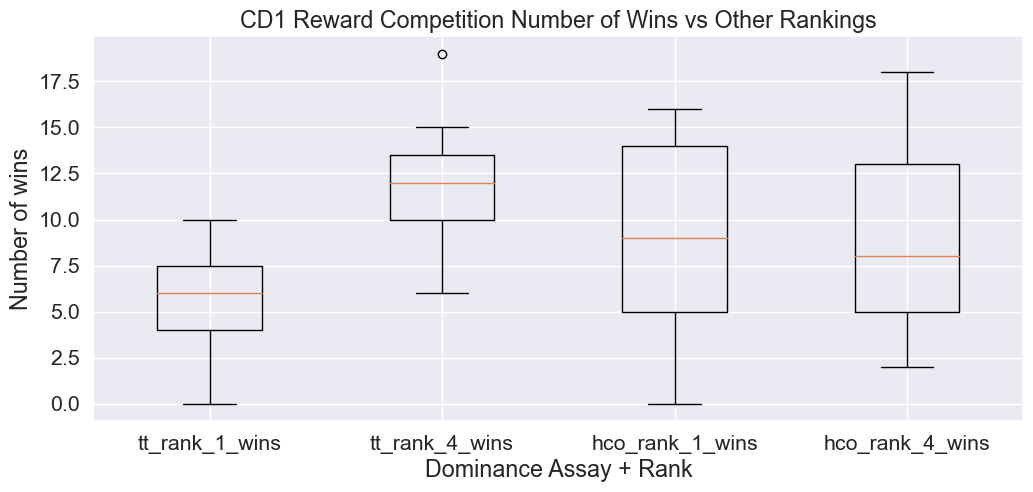

In [113]:
fig, ax = plt.subplots()
plt.title("CD1 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(cd1_rank_to_rc_wins.values())
ax.set_xticklabels(cd1_rank_to_rc_wins.keys())

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

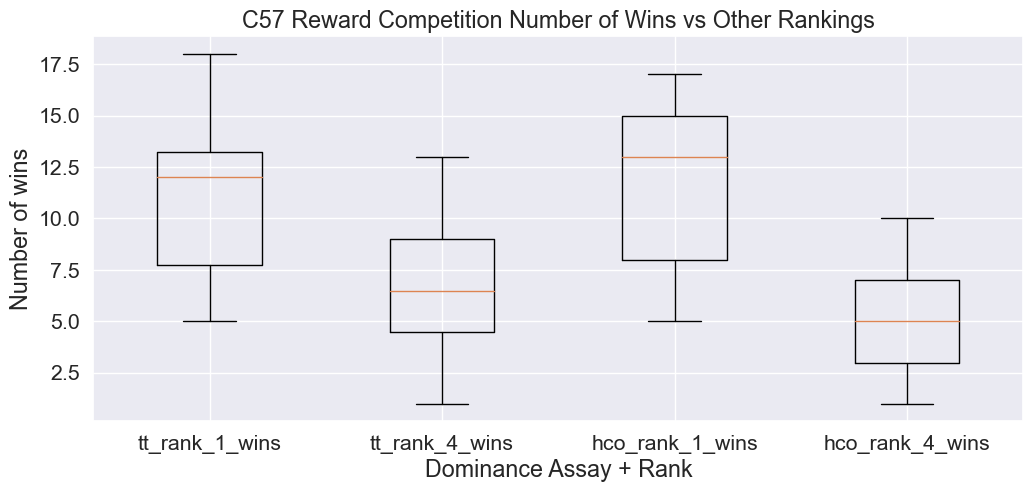

In [114]:
fig, ax = plt.subplots()
plt.title("C57 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(c57_rank_to_rc_wins.values())
ax.set_xticklabels(c57_rank_to_rc_wins.keys())

In [115]:
cd1_rank_to_rc_wins

{'tt_rank_1_wins': [6, 10, 7, 6, 0, 2, 6, 9, 4, 5, 9, 6, 4, 8, 4],
 'tt_rank_4_wins': [14, 9, 12, 11, 19, 15, 12, 9, 14, 12, 6, 13, 7, 11, 11],
 'hco_rank_1_wins': [14, 15, 15, 5, 14, 1, 0, 10, 6, 4, 6, 9, 16],
 'hco_rank_4_wins': [6, 4, 3, 14, 5, 18, 18, 5, 12, 8, 13, 8, 2]}

In [116]:
c57_rank_to_rc_wins

{'tt_rank_1_wins': [9, 11, 7, 13, 5, 6, 10, 15, 13, 13, 18, 16, 8, 5, 13, 14],
 'tt_rank_4_wins': [11, 8, 13, 6, 9, 9, 7, 3, 5, 6, 1, 3, 8, 13, 3, 5],
 'hco_rank_1_wins': [10, 15, 8, 5, 16, 17, 8, 13, 14],
 'hco_rank_4_wins': [7, 3, 10, 6, 2, 1, 8, 3, 5]}

In [117]:
pd.concat({k: pd.Series(v) for k, v in cd1_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/cd1_rank_to_rc_wins")

In [118]:
pd.concat({k: pd.Series(v) for k, v in c57_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/c57_rank_to_rc_wins")

# Looking at reward competition per day

In [119]:
rc_trial_as_column_paths = glob.glob("./**/*reward_competition_trial*.csv", recursive=True)

In [120]:
rc_trial_as_column_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_1_reward_competition_trial_as_columns_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_3_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20221003_20221004.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_2_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20220728_20220729.csv']

- Combining all the reward competition dataframes from each pilot

In [121]:
all_rc_trial_as_column_df = []
for file_path in rc_trial_as_column_paths:
    all_rc_trial_as_column_df.append(pd.read_csv(file_path, index_col=0))

In [122]:
combined_rc_trial_as_column_df = pd.concat(all_rc_trial_as_column_df)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.reset_index(drop=True)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.dropna(axis=1)
# Making this column into a tuple
combined_rc_trial_as_column_df["animal_ids"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: tuple(sorted(ast.literal_eval(x))))


- Creating a column for each animal ID so that we can merge based on the animal's ID

In [123]:
combined_rc_trial_as_column_df["first_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[0])
combined_rc_trial_as_column_df["second_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[1])

In [124]:
combined_rc_trial_as_column_df.head()

date  cage  box      match trial 1 winner trial 2 winner  \
0  2022-05-19     1  1.0  1.1 v 1.2            1.1            1.1   
1  2022-05-19     1  2.0  1.3 v 1.4            1.4            1.4   
2  2022-05-19     1  3.0  1.1 v 1.3            1.3            tie   
3  2022-05-19     1  4.0  1.2 v 1.4            1.4            1.2   
4  2022-05-19     1  2.0  1.2 v 1.3            1.2            1.3   

  trial 3 winner trial 4 winner trial 5 winner trial 6 winner  ...  \
0            1.1            1.1            1.2            1.2  ...   
1            1.3            1.3            1.4            1.4  ...   
2            1.3            1.1            1.1            1.3  ...   
3            1.2            1.2            1.4            1.4  ...   
4            1.3            1.3            1.2            1.3  ...   

  trial 15 winner trial 16 winner trial 17 winner trial 18 winner  \
0             1.2             1.2             1.1             1.2   
1             1.4             1.4             1.4             1.4   
2             1.3             1.3             1.3             1.3   
3             1.4             1.2             1.2             1.4   
4             1.2             1.2             1.3             1.2   

  trial 19 winner  animal_ids   cohort strain first_animal_id second_animal_id  
0             1.1  (1.1, 1.2)  pilot_1    C57             1.1              1.2  
1             1.3  (1.3, 1.4)  pilot_1    C57             1.3              1.4  
2             1.3  (1.1, 1.3)  pilot_1    C57             1.1              1.3  
3             1.4  (1.2, 1.4)  pilot_1    C57             1.2              1.4  
4             1.2  (1.2, 1.3)  pilot_1    C57             1.2              1.3  

[5 rows x 28 columns]

In [125]:
combined_rc_trial_as_column_df.columns

Index(['date', 'cage', 'box', 'match', 'trial 1 winner', 'trial 2 winner',
       'trial 3 winner', 'trial 4 winner', 'trial 5 winner', 'trial 6 winner',
       'trial 7 winner', 'trial 8 winner', 'trial 9 winner', 'trial 10 winner',
       'trial 11 winner', 'trial 12 winner', 'trial 13 winner',
       'trial 14 winner', 'trial 15 winner', 'trial 16 winner',
       'trial 17 winner', 'trial 18 winner', 'trial 19 winner', 'animal_ids',
       'cohort', 'strain', 'first_animal_id', 'second_animal_id'],
      dtype='object')

- Combining all trial columns into one for overall statistics

In [126]:
trial_columns = [col for col in combined_rc_trial_as_column_df.columns if "trial" in col]

In [127]:
trial_columns

['trial 1 winner',
 'trial 2 winner',
 'trial 3 winner',
 'trial 4 winner',
 'trial 5 winner',
 'trial 6 winner',
 'trial 7 winner',
 'trial 8 winner',
 'trial 9 winner',
 'trial 10 winner',
 'trial 11 winner',
 'trial 12 winner',
 'trial 13 winner',
 'trial 14 winner',
 'trial 15 winner',
 'trial 16 winner',
 'trial 17 winner',
 'trial 18 winner',
 'trial 19 winner']

- All the trials including ties

In [128]:
combined_rc_trial_as_column_df['all_trials_combined_with_ties'] = combined_rc_trial_as_column_df[trial_columns].apply(lambda x: list(x), axis=1)

- All the trials not including ties

In [129]:
combined_rc_trial_as_column_df['all_trials_combined_with_no_ties'] = combined_rc_trial_as_column_df.apply(lambda x: [trial for trial in x["all_trials_combined_with_ties"] if trial in x["animal_ids"]], axis=1)

- Making a column as 0 or 1 if the first/second animal wins tht round

In [130]:
combined_rc_trial_as_column_df["first_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["first_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)
combined_rc_trial_as_column_df["second_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["second_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)

In [131]:
combined_rc_trial_as_column_df.head()

date  cage  box      match trial 1 winner trial 2 winner  \
0  2022-05-19     1  1.0  1.1 v 1.2            1.1            1.1   
1  2022-05-19     1  2.0  1.3 v 1.4            1.4            1.4   
2  2022-05-19     1  3.0  1.1 v 1.3            1.3            tie   
3  2022-05-19     1  4.0  1.2 v 1.4            1.4            1.2   
4  2022-05-19     1  2.0  1.2 v 1.3            1.2            1.3   

  trial 3 winner trial 4 winner trial 5 winner trial 6 winner  ...  \
0            1.1            1.1            1.2            1.2  ...   
1            1.3            1.3            1.4            1.4  ...   
2            1.3            1.1            1.1            1.3  ...   
3            1.2            1.2            1.4            1.4  ...   
4            1.3            1.3            1.2            1.3  ...   

  trial 19 winner  animal_ids   cohort strain first_animal_id  \
0             1.1  (1.1, 1.2)  pilot_1    C57             1.1   
1             1.3  (1.3, 1.4)  pilot_1    C57             1.3   
2             1.3  (1.1, 1.3)  pilot_1    C57             1.1   
3             1.4  (1.2, 1.4)  pilot_1    C57             1.2   
4             1.2  (1.2, 1.3)  pilot_1    C57             1.2   

  second_animal_id                      all_trials_combined_with_ties  \
0              1.2  [1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...   
1              1.4  [1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...   
2              1.3  [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...   
3              1.4  [1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...   
4              1.3  [1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...   

                    all_trials_combined_with_no_ties  \
0  [1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...   
1  [1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...   
2  [1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...   
3  [1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...   
4  [1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...   

                            first_win_trials_no_ties  \
0  [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...   
1  [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...   
2  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...   
3  [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...   
4  [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...   

                           second_win_trials_no_ties  
0  [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...  
1  [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...  
2  [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...  
3  [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...  
4  [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...  

[5 rows x 32 columns]

- Counting the number of wins

In [132]:
combined_rc_trial_as_column_df["first_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["first_win_trials_no_ties"]), axis=1)
combined_rc_trial_as_column_df["second_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["second_win_trials_no_ties"]), axis=1)


- Counting the number of wins and losses(not including the ties)

In [133]:
combined_rc_trial_as_column_df["win_and_loss_count"] = combined_rc_trial_as_column_df.apply(lambda x: len(x["first_win_trials_no_ties"]), axis=1)


- Getting the proportions of wins vs wins + losses

In [134]:

combined_rc_trial_as_column_df["first_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["first_win_count"] / x["win_and_loss_count"], axis=1)
combined_rc_trial_as_column_df["second_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["second_win_count"] / x["win_and_loss_count"], axis=1)


- Classifying the mouse as dom/sub/tie based on if the winner has 60% or more

In [135]:
combined_rc_trial_as_column_df["first_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["first_win_proportion_no_ties"] >= 0.6 else ("sub" if x["second_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)
combined_rc_trial_as_column_df["second_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["second_win_proportion_no_ties"] >= 0.6 else ("sub" if x["first_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)

- Removing all the rows with ties for reward comp

In [136]:
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df[combined_rc_trial_as_column_df["first_dom_sub_or_tie"] != "tie"]

- Renaming to columns to numbers
    - Uncomment if using

- Splitting the rows into first and second subject

In [137]:
combined_rc_trial_as_column_df["animal_ids"]

2      (1.1, 1.3)
5      (1.1, 1.4)
6      (1.1, 1.4)
7      (1.2, 1.3)
8      (1.1, 1.3)
          ...    
185    (5.1, 5.2)
186    (6.1, 6.3)
187    (6.2, 6.4)
188    (6.1, 6.4)
190    (6.3, 6.4)
Name: animal_ids, Length: 144, dtype: object

In [138]:
combined_rc_trial_as_column_df["animal_ids_list"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: sorted(list(x)))

In [139]:
exploded_combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.explode("animal_ids")

In [140]:
exploded_combined_rc_trial_as_column_df = exploded_combined_rc_trial_as_column_df.rename(columns={"animal_ids": "subject_animal_id"})

In [141]:
exploded_combined_rc_trial_as_column_df["subject_index"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"].index(x["subject_animal_id"]), axis=1)

In [142]:
exploded_combined_rc_trial_as_column_df["agent_index"] = exploded_combined_rc_trial_as_column_df["subject_index"].apply(lambda x: list(set([0, 1]) - set([x]))[0])

In [143]:
exploded_combined_rc_trial_as_column_df["agent_animal_id"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"][x["agent_index"]], axis=1)

In [144]:
exploded_combined_rc_trial_as_column_df[["subject_index", "subject_animal_id", "animal_ids_list", "agent_index", "agent_animal_id"]].head()

subject_index subject_animal_id animal_ids_list  agent_index  \
2              0               1.1      [1.1, 1.3]            1   
2              1               1.3      [1.1, 1.3]            0   
5              0               1.1      [1.1, 1.4]            1   
5              1               1.4      [1.1, 1.4]            0   
6              0               1.1      [1.1, 1.4]            1   

  agent_animal_id  
2             1.3  
2             1.1  
5             1.4  
5             1.1  
6             1.4

- Merging the ranking dataframe based on the first and second animal ID + cohort

In [145]:
subject_merged_final_elo_score_df = merged_final_elo_score_df.copy()
agent_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [146]:
subject_merged_final_elo_score_df.columns = ["subject_{}".format(col) for col in subject_merged_final_elo_score_df.columns]
agent_merged_final_elo_score_df.columns = ["agent_{}".format(col) for col in agent_merged_final_elo_score_df.columns]

In [147]:
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(exploded_combined_rc_trial_as_column_df, subject_merged_final_elo_score_df,  how='left', left_on=['subject_animal_id','cohort'], right_on = ['subject_subject_id','subject_cohort'])
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(combined_rc_trial_as_column_with_other_ranks_df, agent_merged_final_elo_score_df,  how='left', left_on=['agent_animal_id','cohort'], right_on = ['agent_subject_id','agent_cohort'])


In [148]:
combined_rc_trial_as_column_with_other_ranks_df

date  cage  box      match trial 1 winner trial 2 winner  \
0    2022-05-19     1  3.0  1.1 v 1.3            1.3            tie   
1    2022-05-19     1  3.0  1.1 v 1.3            1.3            tie   
2    2022-05-19     1  1.0  1.1 v 1.4            1.4            1.1   
3    2022-05-19     1  1.0  1.1 v 1.4            1.4            1.1   
4    2022-05-20     1  4.0  1.1 v 1.4            1.1            1.1   
..          ...   ...  ...        ...            ...            ...   
283  2022-07-29     6  2.0    6.2v6.4            6.4            6.4   
284  2022-07-29     6  3.0    6.1v6.4            6.1            6.1   
285  2022-07-29     6  3.0    6.1v6.4            6.1            6.1   
286  2022-07-29     6  1.0    6.3v6.4            6.4            tie   
287  2022-07-29     6  1.0    6.3v6.4            6.4            tie   

    trial 3 winner trial 4 winner trial 5 winner trial 6 winner  ...  \
0              1.3            1.1            1.1            1.3  ...   
1              1.3            1.1            1.1            1.3  ...   
2              1.4            1.4            1.1            1.4  ...   
3              1.4            1.4            1.1            1.4  ...   
4              1.1            1.1            1.1            1.1  ...   
..             ...            ...            ...            ...  ...   
283            6.4            6.4            6.4            6.4  ...   
284            6.1            6.4            tie            6.1  ...   
285            6.1            6.4            tie            6.1  ...   
286            6.3            6.3            tie            tie  ...   
287            6.3            6.3            tie            tie  ...   

    agent_cohort agent_subject_id agent_home_cage_observation_final_elo_score  \
0        pilot_1              1.3                                         NaN   
1        pilot_1              1.1                                         NaN   
2        pilot_1              1.4                                         NaN   
3        pilot_1              1.1                                         NaN   
4        pilot_1              1.4                                         NaN   
..           ...              ...                                         ...   
283      pilot_2              6.2                                       779.7   
284      pilot_2              6.4                                      1080.4   
285      pilot_2              6.1                                      1425.3   
286      pilot_2              6.4                                      1080.4   
287      pilot_2              6.3                                       714.6   

    agent_home_cage_observation_rank agent_reward_competition_final_elo_score  \
0                                NaN                                    900.9   
1                                NaN                                   1165.8   
2                                NaN                                    926.0   
3                                NaN                                   1165.8   
4                                NaN                                    926.0   
..                               ...                                      ...   
283                              3.0                                    948.4   
284                              2.0                                    911.2   
285                              1.0                                   1117.1   
286                              2.0                                    911.2   
287                              4.0                                   1023.3   

    agent_reward_competition_rank agent_tube_test_final_elo_score  \
0                             4.0                           775.7   
1                             1.0                          1062.2   
2                             3.0                          1235.0   
3                             1.0                          1062.2   
4 

- "Melting" the dataframe so that each trial column is its own row. The trial number has its own column
    - This will help us plot by plotting the trial number on x and the proportion of wins on y

In [149]:
columns_to_keep = [col for col in combined_rc_trial_as_column_with_other_ranks_df.columns if "winner" not in col]

In [150]:
columns_to_keep

['date',
 'cage',
 'box',
 'match',
 'subject_animal_id',
 'cohort',
 'strain',
 'first_animal_id',
 'second_animal_id',
 'all_trials_combined_with_ties',
 'all_trials_combined_with_no_ties',
 'first_win_trials_no_ties',
 'second_win_trials_no_ties',
 'first_win_count',
 'second_win_count',
 'win_and_loss_count',
 'first_win_proportion_no_ties',
 'second_win_proportion_no_ties',
 'first_dom_sub_or_tie',
 'second_dom_sub_or_tie',
 'animal_ids_list',
 'subject_index',
 'agent_index',
 'agent_animal_id',
 'subject_cohort',
 'subject_subject_id',
 'subject_home_cage_observation_final_elo_score',
 'subject_home_cage_observation_rank',
 'subject_reward_competition_final_elo_score',
 'subject_reward_competition_rank',
 'subject_tube_test_final_elo_score',
 'subject_tube_test_rank',
 'subject_urine_marking_final_elo_score',
 'subject_urine_marking_rank',
 'agent_cohort',
 'agent_subject_id',
 'agent_home_cage_observation_final_elo_score',
 'agent_home_cage_observation_rank',
 'agent_reward_com

In [151]:
melted_rc_trial_as_column_df = combined_rc_trial_as_column_with_other_ranks_df.melt(id_vars=columns_to_keep, 
        var_name="trial_number", 
        value_name="trial_winner")

- Turning the trial number from a string into a integer so that it can plotted

In [152]:
melted_rc_trial_as_column_df["trial_number"] = melted_rc_trial_as_column_df["trial_number"].apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

In [153]:
melted_rc_trial_as_column_df.iloc[:, :15].head()

date  cage  box      match subject_animal_id   cohort strain  \
0  2022-05-19     1  3.0  1.1 v 1.3               1.1  pilot_1    C57   
1  2022-05-19     1  3.0  1.1 v 1.3               1.3  pilot_1    C57   
2  2022-05-19     1  1.0  1.1 v 1.4               1.1  pilot_1    C57   
3  2022-05-19     1  1.0  1.1 v 1.4               1.4  pilot_1    C57   
4  2022-05-20     1  4.0  1.1 v 1.4               1.1  pilot_1    C57   

  first_animal_id second_animal_id  \
0             1.1              1.3   
1             1.1              1.3   
2             1.1              1.4   
3             1.1              1.4   
4             1.1              1.4   

                       all_trials_combined_with_ties  \
0  [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...   
1  [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...   
2  [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...   
3  [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...   
4  [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...   

                    all_trials_combined_with_no_ties  \
0  [1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...   
1  [1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...   
2  [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...   
3  [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...   
4  [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...   

                            first_win_trials_no_ties  \
0  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...   
1  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...   
2  [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...   
3  [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...   

                           second_win_trials_no_ties  first_win_count  \
0  [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...                4   
1  [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...                4   
2  [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...                6   
3  [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...                6   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...               16   

   second_win_count  
0                13  
1                13  
2                13  
3                13  
4                 2

In [154]:
melted_rc_trial_as_column_df.iloc[:, -5:].head()

agent_tube_test_rank  agent_urine_marking_final_elo_score  \
0                   4.0                                972.0   
1                   2.0                               1010.3   
2                   1.0                               1016.9   
3                   2.0                               1010.3   
4                   1.0                               1016.9   

   agent_urine_marking_rank  trial_number trial_winner  
0                       4.0             1          1.3  
1                       2.0             1          1.3  
2                       1.0             1          1.4  
3                       2.0             1          1.4  
4                       1.0             1          1.1

In [155]:
melted_rc_trial_as_column_df["subject_is_winner"] = melted_rc_trial_as_column_df.apply(lambda x: 1 if x["subject_animal_id"] == x["trial_winner"] else 0, axis=1)

In [156]:
melted_rc_trial_as_column_df

date  cage  box      match subject_animal_id   cohort strain  \
0     2022-05-19     1  3.0  1.1 v 1.3               1.1  pilot_1    C57   
1     2022-05-19     1  3.0  1.1 v 1.3               1.3  pilot_1    C57   
2     2022-05-19     1  1.0  1.1 v 1.4               1.1  pilot_1    C57   
3     2022-05-19     1  1.0  1.1 v 1.4               1.4  pilot_1    C57   
4     2022-05-20     1  4.0  1.1 v 1.4               1.1  pilot_1    C57   
...          ...   ...  ...        ...               ...      ...    ...   
5467  2022-07-29     6  2.0    6.2v6.4               6.4  pilot_2    CD1   
5468  2022-07-29     6  3.0    6.1v6.4               6.1  pilot_2    CD1   
5469  2022-07-29     6  3.0    6.1v6.4               6.4  pilot_2    CD1   
5470  2022-07-29     6  1.0    6.3v6.4               6.3  pilot_2    CD1   
5471  2022-07-29     6  1.0    6.3v6.4               6.4  pilot_2    CD1   

     first_animal_id second_animal_id  \
0                1.1              1.3   
1                1.1              1.3   
2                1.1              1.4   
3                1.1              1.4   
4                1.1              1.4   
...              ...              ...   
5467             6.2              6.4   
5468             6.1              6.4   
5469             6.1              6.4   
5470             6.3              6.4   
5471             6.3              6.4   

                          all_trials_combined_with_ties  ...  \
0     [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...  ...   
1     [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...  ...   
2     [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...  ...   
3     [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...  ...   
4     [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...  ...   
...                                                 ...  ...   
5467  [6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...  ...   
5468  [6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...  ...   
5469  [6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...  ...   
5470  [6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...  ...   
5471  [6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...  ...   

     agent_home_cage_observation_rank  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
...                               ...   
5467                              3.0   
5468                              2.0   
5469                              1.0   
5470                              2.0   
5471                              4.0   

     agent_reward_competition_final_elo_score agent_reward_competition_rank  \
0                                       900.9                           4.0   
1                                      1165.8                           1.0   
2                                       926.0                           3.0   
3                                      1165.8                           1.0   
4                                       926.0                           3.0   
...                                       ...                           ...   
5467                                    948.4                           3.0   
5468                                    911.2                           4.0   
5469                                   1117.1                           1.0   
5470                                    911.2                           4.0   
5471                                   1023.3                           2.0   

      agent_tube_test_final_elo_score  agent_tube_test_rank  \
0                               775.7                   4.0   
1                              1062.2                   2.0   
2                              1235.0                   1.0   
3                              1062.2                   2.0   
4                              1235.0                   1.0   
...              

In [157]:
melted_rc_trial_as_column_df["subject_dom_sub_or_tie"] = melted_rc_trial_as_column_df.apply(lambda x: x["first_dom_sub_or_tie"] if x["subject_index"] == 0 else (x["second_dom_sub_or_tie"] if x["subject_index"] == 1 else np.nan), axis=1) 

In [158]:
melted_rc_trial_as_column_df

date  cage  box      match subject_animal_id   cohort strain  \
0     2022-05-19     1  3.0  1.1 v 1.3               1.1  pilot_1    C57   
1     2022-05-19     1  3.0  1.1 v 1.3               1.3  pilot_1    C57   
2     2022-05-19     1  1.0  1.1 v 1.4               1.1  pilot_1    C57   
3     2022-05-19     1  1.0  1.1 v 1.4               1.4  pilot_1    C57   
4     2022-05-20     1  4.0  1.1 v 1.4               1.1  pilot_1    C57   
...          ...   ...  ...        ...               ...      ...    ...   
5467  2022-07-29     6  2.0    6.2v6.4               6.4  pilot_2    CD1   
5468  2022-07-29     6  3.0    6.1v6.4               6.1  pilot_2    CD1   
5469  2022-07-29     6  3.0    6.1v6.4               6.4  pilot_2    CD1   
5470  2022-07-29     6  1.0    6.3v6.4               6.3  pilot_2    CD1   
5471  2022-07-29     6  1.0    6.3v6.4               6.4  pilot_2    CD1   

     first_animal_id second_animal_id  \
0                1.1              1.3   
1                1.1              1.3   
2                1.1              1.4   
3                1.1              1.4   
4                1.1              1.4   
...              ...              ...   
5467             6.2              6.4   
5468             6.1              6.4   
5469             6.1              6.4   
5470             6.3              6.4   
5471             6.3              6.4   

                          all_trials_combined_with_ties  ...  \
0     [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...  ...   
1     [1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...  ...   
2     [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...  ...   
3     [1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...  ...   
4     [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...  ...   
...                                                 ...  ...   
5467  [6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...  ...   
5468  [6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...  ...   
5469  [6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...  ...   
5470  [6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...  ...   
5471  [6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...  ...   

     agent_reward_competition_final_elo_score agent_reward_competition_rank  \
0                                       900.9                           4.0   
1                                      1165.8                           1.0   
2                                       926.0                           3.0   
3                                      1165.8                           1.0   
4                                       926.0                           3.0   
...                                       ...                           ...   
5467                                    948.4                           3.0   
5468                                    911.2                           4.0   
5469                                   1117.1                           1.0   
5470                                    911.2                           4.0   
5471                                   1023.3                           2.0   

     agent_tube_test_final_elo_score  agent_tube_test_rank  \
0                              775.7                   4.0   
1                             1062.2                   2.0   
2                             1235.0                   1.0   
3                             1062.2                   2.0   
4                             1235.0                   1.0   
...                              ...                   ...   
5467                          1031.7                   2.0   
5468                          1114.1                   1.0   
5469                           943.6                   3.0   
5470                          1114.1                   1.0   
5471                           910.6                   4.0   

      agent_urine_marking_final_elo_score  agent_urine_marking_rank  \
0                                   972.0                       4.0   
1

In [159]:
melted_rc_trial_as_column_df["subject_animal_id"]

0       1.1
1       1.3
2       1.1
3       1.4
4       1.1
       ... 
5467    6.4
5468    6.1
5469    6.4
5470    6.3
5471    6.4
Name: subject_animal_id, Length: 5472, dtype: object

- Getting all the rows that only have rank 1 vs 4 for a given assay

In [160]:
assay_to_rank_1_4_df = defaultdict(dict)

In [161]:
assay_to_rank_1_4_df["subject_home_cage_observation_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_home_cage_observation_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_home_cage_observation_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_tube_test_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_tube_test_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_tube_test_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_urine_marking_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_urine_marking_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_urine_marking_rank"].isin([1, 4]))]

- Getting the mean, standard error, and count for each assay

In [162]:
for key, item in assay_to_rank_1_4_df.items():
    assay_to_rank_1_4_df[key]["mean_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).mean().reset_index()
    assay_to_rank_1_4_df[key]["sem_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).sem().reset_index()
    assay_to_rank_1_4_df[key]["count_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).count().reset_index()


/tmp/ipykernel_487755/2275308943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  assay_to_rank_1_4_df[key]["mean_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).mean().reset_index()
/tmp/ipykernel_487755/2275308943.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  assay_to_rank_1_4_df[key]["sem_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).sem().reset_index()
/tmp/ipykernel_487755/2275308943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will defa

- Plotting without seperating winners

In [163]:
from matplotlib.transforms import Affine2D

In [164]:
import string

1.0
4.0


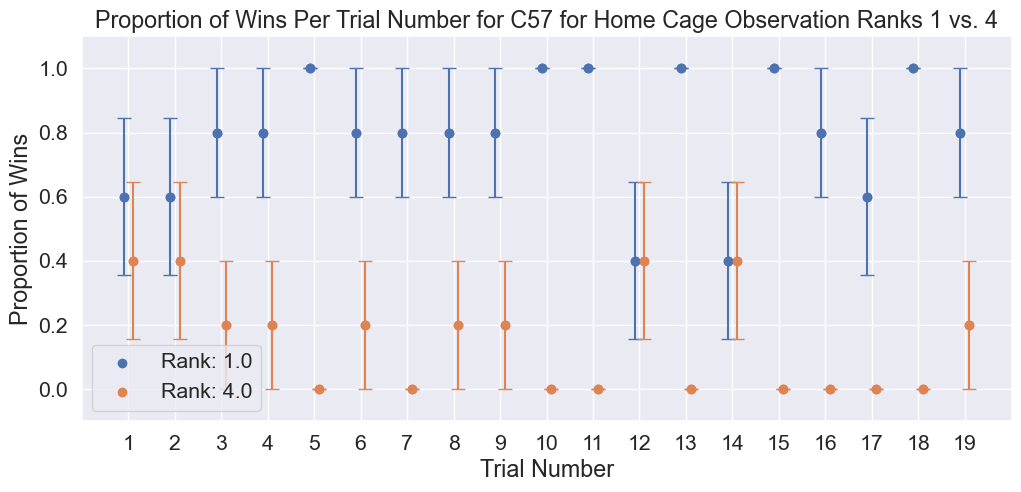

1.0
4.0


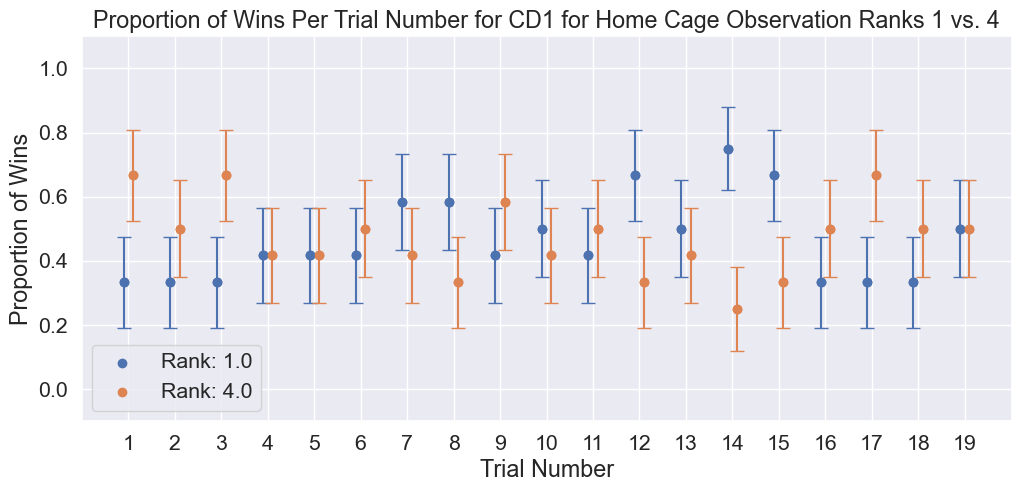

1.0
4.0


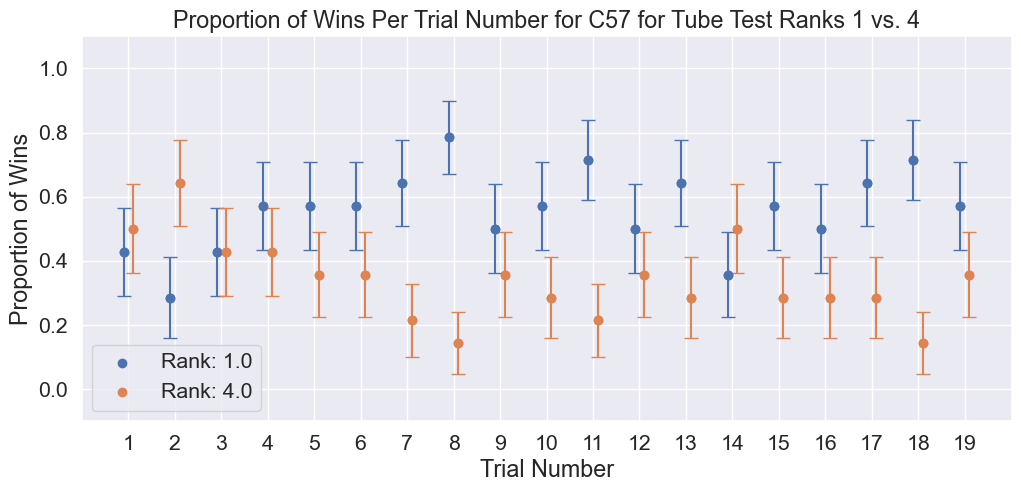

1.0
4.0


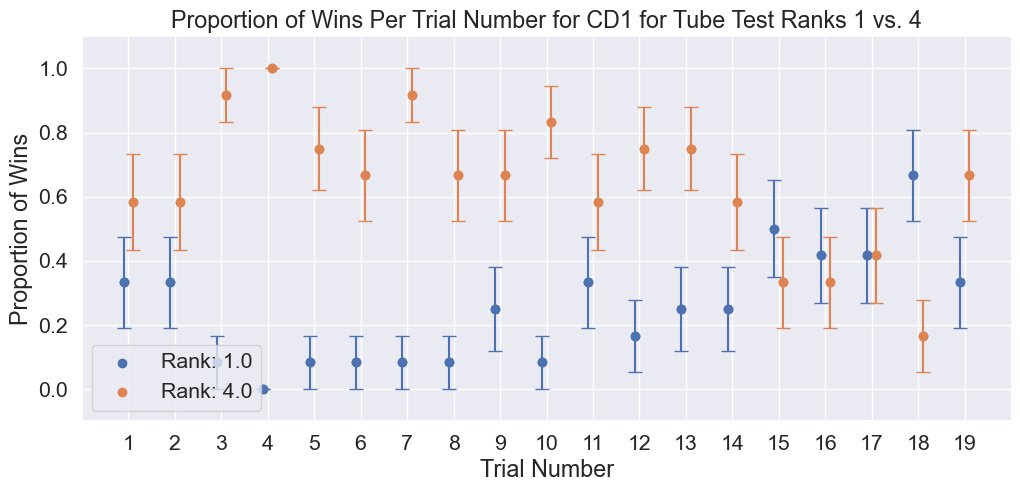

1.0
4.0


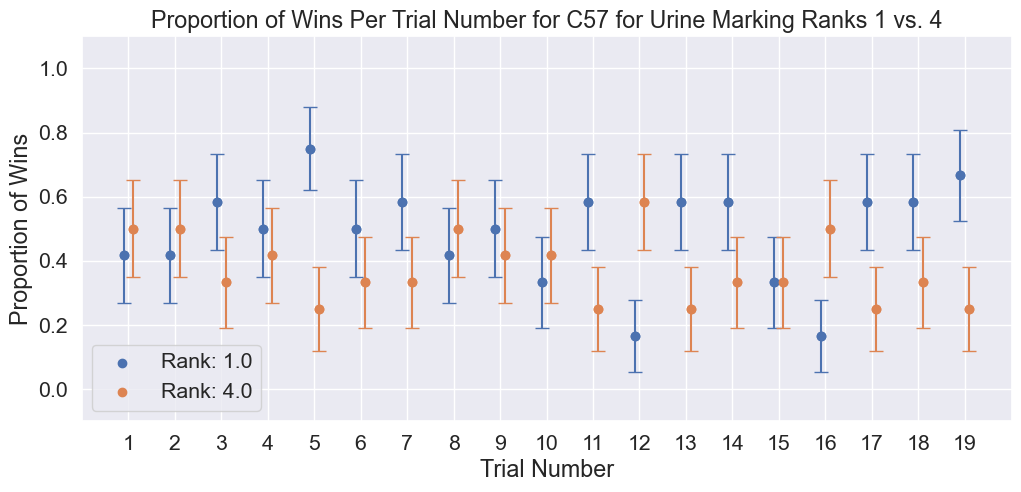

1.0
4.0


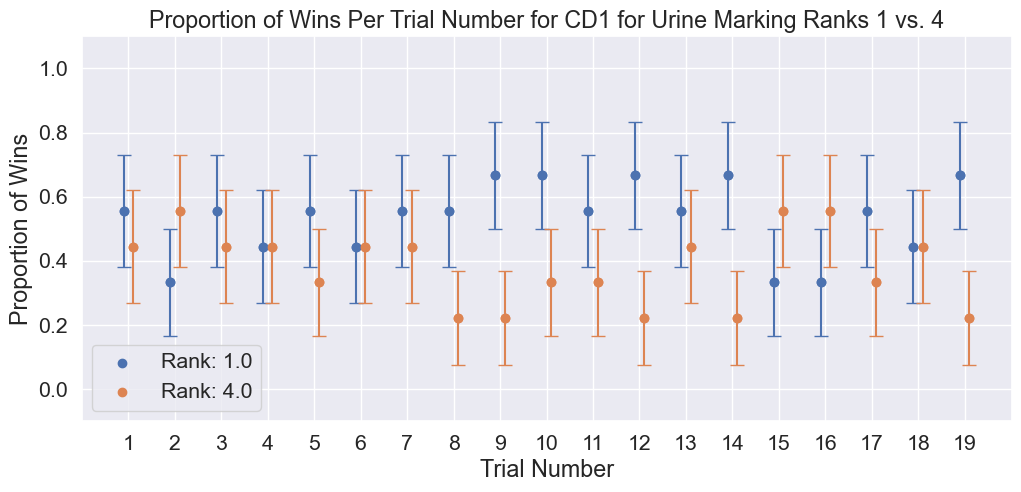

In [165]:
for key, item in assay_to_rank_1_4_df.items():
    for strain in assay_to_rank_1_4_df[key]["mean_df"]["strain"].unique():
        fig, ax = plt.subplots()
        # Transformations so that points can be differentiated on the same trial number
        trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
        trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
        transformation_list = [trans1, trans2]
        # Getting the rows for the current strain
        strain_mask = assay_to_rank_1_4_df[key]["mean_df"]["strain"] == strain
        strain_mean = assay_to_rank_1_4_df[key]["mean_df"][strain_mask]
        strain_sem = assay_to_rank_1_4_df[key]["sem_df"][strain_mask]
        strain_count = assay_to_rank_1_4_df[key]["count_df"][strain_mask]
        
        for rank in strain_mean[key].unique():
            print(rank)
            rank_index = list(strain_mean[key].unique()).index(rank)
            rank_mask = (strain_mean[key] == rank)
            rank_mean = strain_mean[rank_mask]
            rank_sem = strain_sem[rank_mask]
            rank_count = strain_count[rank_mask]
            plt.scatter(rank_mean["trial_number"], y=rank_mean["subject_is_winner"], label="Rank: {}".format(rank), transform=transformation_list[rank_index])
            plt.errorbar(rank_mean["trial_number"], rank_mean["subject_is_winner"], \
                         yerr=rank_sem["subject_is_winner"], fmt='o', transform=transformation_list[rank_index],\
                        capsize=5)

#         ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.legend(loc='lower left')

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        plt.xlabel("Trial Number")
        plt.ylabel("Proportion of Wins")
        assay_name_with_spaces = string.capwords(" ".join(key.split("_")[1:-1]))
        plt.title("Proportion of Wins Per Trial Number for {} for {} Ranks 1 vs. 4".format(strain, assay_name_with_spaces))
        plt.ylim((-0.1,1.1))
        plt.xticks(np.arange(assay_to_rank_1_4_df[key]["base_df"]["trial_number"].min(), assay_to_rank_1_4_df[key]["base_df"]["trial_number"].max()+1, 1.0))
        assay_name_with_underscore = "_".join(key.split("_")[1:-1])
        plt.savefig("./proc/reward_competition_plots/{}_reward_competition_per_trial_proportion_for_{}.svg".format(strain, assay_name_with_underscore))
        plt.show()

- Plotting with seperating the winners

In [166]:
from itertools import product

## Competition

## Percent Stable and percent unstable

# Urine Marking Assay

In [300]:
urine_marking_file_paths = glob.glob("./pilot_*/data/*Urine*.xlsx", recursive=True)

In [301]:
urine_marking_file_paths

['./pilot_1/data/iwata_Urine_Marking_Assay_Data.xlsx',
 './pilot_3/data/iwata_Urine_Marking_Assay_Data.xlsx',
 './pilot_2/data/iwata_Urine_Marking_Assay_Data.xlsx']

In [303]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_excel(file_path))

In [308]:
all_urine_marking_df[0]

Unnamed: 0           Unnamed: 1 Unnamed: 2         Unnamed: 3 Unnamed: 4
0          NaN                  NaN        NaN                NaN        NaN
1          NaN                  NaN        NaN                NaN        NaN
2          NaN                 Date       CAGE              Match     Winner
3          NaN  2022-05-18 00:00:00          3  4.1 (1) v 3.2 (2)    3.2 (2)
4          NaN  2022-05-18 00:00:00          3  4.2 (3) v 3.3 (4)    4.2 (3)
5          NaN  2022-05-18 00:00:00          4  3.1 (1) v 3.4 (2)    3.1 (1)
6          NaN  2022-05-18 00:00:00          4  4.3 (3) v 4.4 (4)    4.4 (4)
7          NaN  2022-05-19 00:00:00          3  4.1 (1) v 3.2 (2)    4.1 (1)
8          NaN  2022-05-19 00:00:00          3  4.2 (3) v 3.3 (4)        tie
9          NaN  2022-05-19 00:00:00          4  3.1 (1) v 3.4 (2)    3.4 (2)
10         NaN  2022-05-19 00:00:00          4  4.3 (3) v 4.4 (4)    4.4 (4)
11         NaN  2022-05-19 00:00:00          1          1.1 v 2.3        1.1
12         NaN  2022-05-19 00:00:00          1          2.2 v 1.4        1.4
13         NaN  2022-05-19 00:00:00          2          1.2 v 2.4        2.4
14         NaN  2022-05-19 00:00:00          2          2.1 v 1.3        2.1
15         NaN  2022-05-20 00:00:00          3  4.1 (1) v 4.2 (3)    4.1 (1)
16         NaN  2022-05-20 00:00:00          3  3.2 (2) v 3.3 (4)    3.3 (4)
17         NaN  2022-05-20 00:00:00          4  3.1 (1) v 4.3 (3)    3.1 (1)
18         NaN  2022-05-20 00:00:00          4  3.4 (2) v 4.4 (4)    4.4 (4)
19         NaN  2022-05-20 00:00:00          2          1.3 v 2.4        1.3
20         NaN  2022-05-20 00:00:00          2          2.1 v 1.2        2.1
21         NaN  2022-05-20 00:00:00          1          1.1 v 2.2        2.2
22         NaN  2022-05-20 00:00:00          1          2.3 v 1.4        1.4
23         NaN  2022-05-24 00:00:00          1          1.1 v 1.4        1.1
24         NaN  2022-05-24 00:00:00          1          2.2 v 2.3        tie
25         NaN  2022-05-24 00:00:00          2          2.1 v 2.4        2.1
26         NaN  2022-05-24 00:00:00          2          1.2 v 1.3        1.3
27         NaN  2022-05-24 00:00:00          3  4.1 (1) v 3.3 (4)    4.1 (1)
28         NaN  2022-05-24 00:00:00          3  3.2 (2) v 4.2 (3)    3.2 (2)
29         NaN  2022-05-24 00:00:00          4  3.1 (1) v 4.4 (4)    4.4 (4)
30         NaN  2022-05-24 00:00:00          4  3.4 (2) v 4.3 (3)    4.3 (3)
31         NaN  2022-05-25 00:00:00          1          1.1 v 2.2        1.1
32         NaN  2022-05-25 00:00:00          1          2.3 v 1.4        1.4
33         NaN  2022-05-25 00:00:00          2          2.1 v 1.2        2.1
34         NaN  2022-05-25 00:00:00          2          1.3 v 2.4        2.4
35         NaN  2022-05-25 00:00:00          4  3.1 (1) v 3.4 (2)    3.1 (1)
36         NaN  2022-05-26 00:00:00          1          1.1 v 2.3        1.1
37         NaN  2022-05-26 00:00:00          1          2.2 v 1.4        2.2
38         NaN  2022-05-27 00:00:00          3  4.2 (3) v 3.3 (4)    3.3 (4)
39         NaN  2022-05-27 00:00:00          4  4.3 (3) v 4.4 (4)    4.4 (4)
40         NaN  2022-06-01 00:00:00          4  4.3 (3) v 4.4 (4)    4.4 (4)

In [299]:
raise ValueError("")

ValueError: 

## Urine Marking Assay

In [167]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [168]:
urine_marking_file_paths

['./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_elo_score_history_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_3/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-09-12_2022-09-16/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-09-12_2022-09-16.csv',
 './pilot_2/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-08-08/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-07-11_2022-08-08.csv']

In [169]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [170]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [171]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

# TODO: OVERE HERE

In [298]:
combined_urine_marking_df

index  total_match_number  subject_id  agent_id  original_elo_score  \
0        0                   1         1.1       1.3              1000.0   
1        1                   1         1.3       1.1              1000.0   
2        2                   2         1.4       1.2              1000.0   
3        3                   2         1.2       1.4              1000.0   
4        4                   3         1.2       1.1               990.0   
..     ...                 ...         ...       ...                 ...   
287    287                  10         6.1       6.4              1029.1   
288    288                  11         6.1       6.2              1018.3   
289    289                  11         6.2       6.1               971.2   
290    290                  12         6.3       6.4               999.4   
291    291                  12         6.4       6.3              1011.1   

     updated_elo_score  win_draw_loss  subject_ranking  agent_ranking  \
0               1000.0            0.5                1              2   
1               1000.0            0.5                2              1   
2               1010.0            1.0                1              4   
3                990.0            0.0                4              1   
4               1000.3            1.0                2              4   
..                 ...            ...              ...            ...   
287             1018.3            0.0                1              2   
288             1027.0            1.0                1              4   
289              962.5            0.0                4              1   
290             1009.7            1.0                2              3   
291             1000.8            0.0                3              2   

     session_number_difference  ...  left_number_of_spots  winner  \
0                          NaN  ...                   4.0     1.1   
1                          NaN  ...                   4.0     1.1   
2                          0.0  ...                   0.0     1.4   
3                          0.0  ...                   0.0     1.4   
4                          1.0  ...                  12.0     1.2   
..                         ...  ...                   ...     ...   
287                        0.0  ...                 106.0     6.4   
288                        1.0  ...                  81.0     6.1   
289                        1.0  ...                  81.0     6.1   
290                        0.0  ...                  53.0     6.3   
291                        0.0  ...                  53.0     6.3   

     right_number_of_spots second_spot_number   cage processed_cage_number  \
0                      0.0                0.0  CAGE1                     1   
1                      0.0                0.0  CAGE1                     1   
2                      6.0                6.0  CAGE1                     1   
3                      6.0                6.0  CAGE1                     1   
4                     17.0               17.0  CAGE1                     1   
..                     ...                ...    ...                   ...   
287                   28.0              106.0  CAGE6                     6   
288                   37.0               37.0  CAGE6                     6   
289                   37.0               37.0  CAGE6                     6   
290                    3.0                3.0  CAGE6                     6   
291                    3.0                3.0  CAGE6                     6   

     experiment_type  strain   cohort                           notes  
0      urine_marking     C57  pilot_1                             NaN  
1      urine_marking     C57  pilot_1                             NaN  
2      urine_marking     C57  pilot_1                             NaN  
3      urine_marking     C57  pilot_1                             NaN  
4      urine_marking     C57  pilot_1                             NaN  
..               

- For even rows, the left pee spots correspond to the subject's pee spots

In [172]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [173]:
even_urine_marking_df.columns

Index(['index', 'total_match_number', 'subject_id', 'agent_id',
       'original_elo_score', 'updated_elo_score', 'win_draw_loss',
       'subject_ranking', 'agent_ranking', 'session_number_difference',
       'spot_percent_difference', 'loser', 'spot_number_then_percent_tie',
       'animal_id', 'ties', 'match', 'session_number', 'spot_number_tie',
       'date', 'sorted_animal_id', 'first_spot_number', 'id_to_spot_number',
       'spot_number_difference', 'spot_percent_tie', 'left_number_of_spots',
       'winner', 'right_number_of_spots', 'second_spot_number', 'cage',
       'processed_cage_number', 'experiment_type', 'strain', 'cohort',
       'notes'],
      dtype='object')

In [174]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [175]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [176]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [177]:
even_urine_marking_df.head()

matching_index  index  total_match_number  left_subject_id  left_elo_score  \
0               1      0                   1              1.1          1000.0   
2               2      2                   2              1.4          1010.0   
4               3      4                   3              1.2          1000.3   
6               4      6                   4              1.4          1019.7   
8               5      8                   5              1.1           990.6   

   win_draw_loss  left_ranking  session_number_difference  \
0            0.5             1                        NaN   
2            1.0             1                        0.0   
4            1.0             2                        1.0   
6            1.0             1                        0.0   
8            0.5             3                        1.0   

   spot_percent_difference  loser  ...  spot_percent_tie left_number_of_spots  \
0               200.000000    1.3  ...             False                  4.0   
2               200.000000    1.2  ...             False                  0.0   
4                34.482759    1.1  ...             False                 12.0   
6               200.000000    1.3  ...             False                  0.0   
8                18.181818    1.4  ...              True                 18.0   

  winner second_spot_number   cage  processed_cage_number experiment_type  \
0    1.1                0.0  CAGE1                      1   urine_marking   
2    1.4                6.0  CAGE1                      1   urine_marking   
4    1.2               17.0  CAGE1                      1   urine_marking   
6    1.4               10.0  CAGE1                      1   urine_marking   
8    1.1               15.0  CAGE1                      1   urine_marking   

  strain   cohort notes  
0    C57  pilot_1   NaN  
2    C57  pilot_1   NaN  
4    C57  pilot_1   NaN  
6    C57  pilot_1   NaN  
8    C57  pilot_1   NaN  

[5 rows x 31 columns]

In [178]:
odd_urine_marking_df.head()

matching_index  index  total_match_number  right_subject_id  \
1               1      1                   1               1.3   
3               2      3                   2               1.2   
5               3      5                   3               1.1   
7               4      7                   4               1.3   
9               5      9                   5               1.4   

   right_elo_score  win_draw_loss  right_ranking  session_number_difference  \
1           1000.0            0.5              2                        NaN   
3            990.0            0.0              4                        0.0   
5            989.7            0.0              4                        1.0   
7            990.3            0.0              3                        0.0   
9           1018.8            0.5              1                        1.0   

   spot_percent_difference  loser  ...  spot_percent_tie winner  \
1               200.000000    1.3  ...             False    1.1   
3               200.000000    1.2  ...             False    1.4   
5                34.482759    1.1  ...             False    1.2   
7               200.000000    1.3  ...             False    1.4   
9                18.181818    1.4  ...              True    1.1   

  right_number_of_spots second_spot_number   cage  processed_cage_number  \
1                   0.0                0.0  CAGE1                      1   
3                   6.0                6.0  CAGE1                      1   
5                  17.0               17.0  CAGE1                      1   
7                  10.0               10.0  CAGE1                      1   
9                  15.0               15.0  CAGE1                      1   

  experiment_type strain   cohort notes  
1   urine_marking    C57  pilot_1   NaN  
3   urine_marking    C57  pilot_1   NaN  
5   urine_marking    C57  pilot_1   NaN  
7   urine_marking    C57  pilot_1   NaN  
9   urine_marking    C57  pilot_1   NaN  

[5 rows x 31 columns]

In [179]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [180]:
cols_to_use

['right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'matching_index']

In [181]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [182]:
urine_marking_left_right

matching_index  index  total_match_number  left_subject_id  \
0                 1      0                   1              1.1   
1                 2      2                   2              1.4   
2                 3      4                   3              1.2   
3                 4      6                   4              1.4   
4                 5      8                   5              1.1   
..              ...    ...                 ...              ...   
141             142    282                   8              6.4   
142             143    284                   9              6.3   
143             144    286                  10              6.4   
144             145    288                  11              6.1   
145             146    290                  12              6.3   

     left_elo_score  win_draw_loss  left_ranking  session_number_difference  \
0            1000.0            0.5             1                        NaN   
1            1010.0            1.0             1                        0.0   
2            1000.3            1.0             2                        1.0   
3            1019.7            1.0             1                        0.0   
4             990.6            0.5             3                        1.0   
..              ...            ...           ...                        ...   
141          1000.3            1.0             2                        0.0   
142           999.4            1.0             3                        1.0   
143          1011.1            1.0             2                        0.0   
144          1027.0            1.0             1                        1.0   
145          1009.7            1.0             2                        0.0   

     spot_percent_difference  loser  ...   cage processed_cage_number  \
0                 200.000000    1.3  ...  CAGE1                     1   
1                 200.000000    1.2  ...  CAGE1                     1   
2                  34.482759    1.1  ...  CAGE1                     1   
3                 200.000000    1.3  ...  CAGE1                     1   
4                  18.181818    1.4  ...  CAGE1                     1   
..                       ...    ...  ...    ...                   ...   
141               133.333333    6.2  ...  CAGE6                     6   
142               190.243902    6.2  ...  CAGE6                     6   
143               116.417910    6.1  ...  CAGE6                     6   
144                74.576271    6.2  ...  CAGE6                     6   
145               178.571429    6.4  ...  CAGE6                     6   

    experiment_type strain   cohort                           notes  \
0     urine_marking    C57  pilot_1                             NaN   
1     urine_marking    C57  pilot_1                             NaN   
2     urine_marking    C57  pilot_1                             NaN   
3     urine_marking    C57  pilot_1                             NaN   
4     urine_marking    C57  pilot_1                             NaN   
..              ...    ...      ...                             ...   
141   urine_marking    CD1  pilot_2  #1 had 3 holes (3cm, 5cm,2cm)    
142   urine_marking    CD1  pilot_2  #1 had 3 holes (3cm, 5cm,2cm)    
143   urine_marking    CD1  pilot_2  #1 had 3 holes (3cm, 5cm,2cm)    
144   urine_marking    CD1  pilot_2  #1 had 3 holes (3cm, 5cm,2cm)    
145   urine_marking    CD1  pilot_2  #1 had 3 holes (3cm, 5cm,2cm)    

    right_elo_score right_number_of_spots  right_ranking right_subject_id  
0            1000.0                   0.0              2              1.3  
1             990.0                   6.0              4              1.2  
2             989.7                  17.0              4              1.1  
3             990.3                  10.0              3              1.3  
4            1018.8                  15.0              1              1.4  
..              ...                   ...            ...         

In [183]:
sorted(urine_marking_left_right.columns)

['animal_id',
 'cage',
 'cohort',
 'date',
 'experiment_type',
 'first_spot_number',
 'id_to_spot_number',
 'index',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'loser',
 'match',
 'matching_index',
 'notes',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'second_spot_number',
 'session_number',
 'session_number_difference',
 'sorted_animal_id',
 'spot_number_difference',
 'spot_number_then_percent_tie',
 'spot_number_tie',
 'spot_percent_difference',
 'spot_percent_tie',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner']

In [184]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [185]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [186]:
urine_marking_left_right.head()

experiment_type   cohort   cage  processed_cage_number strain        date  \
0   urine_marking  pilot_1  CAGE1                      1    C57  2022-05-19   
1   urine_marking  pilot_1  CAGE1                      1    C57  2022-05-19   
2   urine_marking  pilot_1  CAGE1                      1    C57  2022-05-20   
3   urine_marking  pilot_1  CAGE1                      1    C57  2022-05-20   
4   urine_marking  pilot_1  CAGE1                      1    C57  2022-05-24   

       match  winner  loser ties  ...  left_ranking  left_subject_id  \
0  1.1 v 1.3     1.1    1.3  NaN  ...             1              1.1   
1  1.2 v 1.4     1.4    1.2  NaN  ...             1              1.4   
2  1.1 v 1.2     1.2    1.1  NaN  ...             2              1.2   
3  1.3 v 1.4     1.4    1.3  NaN  ...             1              1.4   
4  1.1 v 1.4     1.1    1.4  NaN  ...             3              1.1   

   right_elo_score  right_number_of_spots  right_ranking  right_subject_id  \
0           1000.0                    0.0              2               1.3   
1            990.0                    6.0              4               1.2   
2            989.7                   17.0              4               1.1   
3            990.3                   10.0              3               1.3   
4           1018.8                   15.0              1               1.4   

   session_number  session_number_difference  total_match_number  \
0             1.0                        NaN                   1   
1             1.0                        0.0                   2   
2             2.0                        1.0                   3   
3             2.0                        0.0                   4   
4             3.0                        1.0                   5   

   win_draw_loss  
0            0.5  
1            1.0  
2            1.0  
3            1.0  
4            0.5  

[5 rows x 22 columns]

In [187]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

/tmp/ipykernel_487755/328799236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
/tmp/ipykernel_487755/328799236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)


In [188]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [189]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [190]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [191]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [192]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [193]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [194]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [195]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [196]:
cols_to_use


['cage',
 'cohort',
 'date',
 'experiment_type',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'loser',
 'match',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner',
 'left_subject_id']

In [197]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [198]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [199]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [200]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [201]:
sorted(urine_and_elo_score_df.columns)

['cage',
 'cohort',
 'date',
 'experiment_type',
 'home_cage_observation_elo_score_difference',
 'home_cage_observation_rank_difference',
 'left_cohort',
 'left_elo_score',
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_number_of_spots',
 'left_ranking',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_subject_id',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',
 'loser',
 'match',
 'pee_spot_difference',
 'processed_cage_number',
 'reward_competition_elo_score_difference',
 'reward_competition_rank_difference',
 'right_cohort',
 'right_elo_score',
 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_number_of_spots',
 'right_ranking',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_subject_id',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',

In [202]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [203]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [204]:
urine_and_elo_score_df

cohort   cage  processed_cage_number strain        date  winner  loser  \
0    pilot_1  CAGE1                      1    C57  2022-05-19     1.1    1.3   
1    pilot_1  CAGE1                      1    C57  2022-05-26     1.1    1.3   
2    pilot_1  CAGE1                      1    C57  2022-05-20     1.4    1.3   
3    pilot_1  CAGE1                      1    C57  2022-05-25     1.4    1.3   
4    pilot_1  CAGE1                      1    C57  2022-05-24     1.2    1.3   
..       ...    ...                    ...    ...         ...     ...    ...   
141  pilot_2  CAGE6                      6    CD1  2022-07-13     6.2    6.3   
142  pilot_2  CAGE6                      6    CD1  2022-07-13     6.1    6.4   
143  pilot_2  CAGE6                      6    CD1  2022-07-11     6.3    6.4   
144  pilot_2  CAGE6                      6    CD1  2022-08-05     6.3    6.4   
145  pilot_2  CAGE6                      6    CD1  2022-08-04     6.4    6.1   

    ties left_subject_id  left_elo_score  ...  \
0    NaN             1.1          1000.0  ...   
1    tie             1.1          1010.3  ...   
2    NaN             1.4          1019.7  ...   
3    tie             1.4          1028.0  ...   
4    tie             1.2          1000.0  ...   
..   ...             ...             ...  ...   
141  tie             6.2           990.9  ...   
142  tie             6.1          1019.7  ...   
143  NaN             6.3          1010.0  ...   
144  tie             6.3          1009.7  ...   
145  tie             6.4          1011.1  ...   

     right_home_cage_observation_rank  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
..                                ...   
141                               4.0   
142                               2.0   
143                               2.0   
144                               2.0   
145                               1.0   

    right_reward_competition_final_elo_score  right_reward_competition_rank  \
0                                      900.9                            4.0   
1                                      900.9                            4.0   
2                                      900.9                            4.0   
3                                      900.9                            4.0   
4                                      900.9                            4.0   
..                                       ...                            ...   
141                                   1023.3                            2.0   
142                                    911.2                            4.0   
143                                    911.2                            4.0   
144                                    911.2                            4.0   
145                                   1117.1                            1.0   

     right_tube_test_final_elo_score  right_tube_test_rank  \
0                              775.7                   4.0   
1                              775.7                   4.0   
2                              775.7                   4.0   
3                              775.7                   4.0   
4                              775.7                   4.0   
..                               ...                   ...   
141                            910.6                   4.0   
142                           1114.1                   1.0   
143                           1114.1                   1.0   
144                           1114.1                   1.0   
145                            943.6                   3.0   

     right_urine_marking_final_elo_score  right_urine_marking_rank  \
0                                  972.0                       4.0   
1                                  972.0                       4.0   
2                                  972.0                   

In [205]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [206]:
urine_and_elo_score_df.dropna(axis=1)

cohort   cage  processed_cage_number strain        date  winner  loser  \
0    pilot_1  CAGE1                      1    C57  2022-05-19     1.1    1.3   
1    pilot_1  CAGE1                      1    C57  2022-05-26     1.1    1.3   
2    pilot_1  CAGE1                      1    C57  2022-05-20     1.4    1.3   
3    pilot_1  CAGE1                      1    C57  2022-05-25     1.4    1.3   
4    pilot_1  CAGE1                      1    C57  2022-05-24     1.2    1.3   
..       ...    ...                    ...    ...         ...     ...    ...   
141  pilot_2  CAGE6                      6    CD1  2022-07-13     6.2    6.3   
142  pilot_2  CAGE6                      6    CD1  2022-07-13     6.1    6.4   
143  pilot_2  CAGE6                      6    CD1  2022-07-11     6.3    6.4   
144  pilot_2  CAGE6                      6    CD1  2022-08-05     6.3    6.4   
145  pilot_2  CAGE6                      6    CD1  2022-08-04     6.4    6.1   

    left_subject_id  left_elo_score  left_ranking  ...  \
0               1.1          1000.0             1  ...   
1               1.1          1010.3             2  ...   
2               1.4          1019.7             1  ...   
3               1.4          1028.0             1  ...   
4               1.2          1000.0             2  ...   
..              ...             ...           ...  ...   
141             6.2           990.9             4  ...   
142             6.1          1019.7             1  ...   
143             6.3          1010.0             2  ...   
144             6.3          1009.7             2  ...   
145             6.4          1011.1             2  ...   

    left_urine_marking_final_elo_score  left_urine_marking_rank  \
0                               1010.3                      2.0   
1                               1010.3                      2.0   
2                               1016.9                      1.0   
3                               1016.9                      1.0   
4                               1000.8                      3.0   
..                                 ...                      ...   
141                              962.5                      4.0   
142                             1027.0                      1.0   
143                             1009.7                      2.0   
144                             1009.7                      2.0   
145                             1000.8                      3.0   

     right_reward_competition_final_elo_score  right_reward_competition_rank  \
0                                       900.9                            4.0   
1                                       900.9                            4.0   
2                                       900.9                            4.0   
3                                       900.9                            4.0   
4                                       900.9                            4.0   
..                                        ...                            ...   
141                                    1023.3                            2.0   
142                                     911.2                            4.0   
143                                     911.2                            4.0   
144                                     911.2                            4.0   
145                                    1117.1                            1.0   

     right_tube_test_final_elo_score  right_tube_test_rank  \
0                              775.7                   4.0   
1                              775.7                   4.0   
2                              775.7                   4.0   
3                              775.7                   4.0   
4                              775.7                   4.0   
..                               ...                   ...   
141                            910.6                   4.0   
142                           1114.1                   1.0   
143                     

In [207]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

Index(['home_cage_observation_elo_score_difference',
       'home_cage_observation_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank', 'session_number_difference',
       'ties'],
      dtype='object')

# Plotting

In [208]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [209]:
urine_and_elo_score_df.columns

Index(['cohort', 'cage', 'processed_cage_number', 'strain', 'date', 'winner',
       'loser', 'ties', 'left_subject_id', 'left_elo_score', 'left_ranking',
       'right_subject_id', 'right_elo_score', 'right_ranking',
       'left_number_of_spots', 'right_number_of_spots', 'pee_spot_difference',
       'tube_test_elo_score_difference',
       'home_cage_observation_elo_score_difference',
       'reward_competition_elo_score_difference', 'tube_test_rank_difference',
       'home_cage_observation_rank_difference',
       'reward_competition_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward

In [210]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [211]:
os.makedirs("./proc/urine_marking_plots", exist_ok=True)

In [212]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

In [213]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

In [214]:
x_max = urine_and_elo_score_df["winner_number_of_spots"].max()

In [215]:
y_max = 35

In [216]:
bin_width = 5

In [217]:
bins=range(int(urine_and_elo_score_df["winner_number_of_spots"].min()), int(urine_and_elo_score_df["winner_number_of_spots"].max()) + bin_width, bin_width)


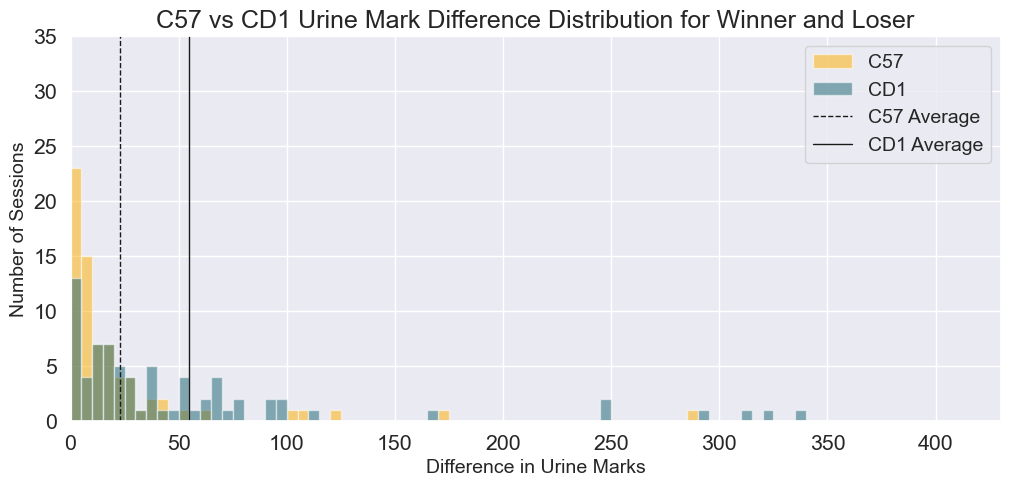

In [218]:


plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57', color="#ffaf00")
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1', color="#15616f")


# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')

plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Average")

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.title("C57 vs CD1 Urine Mark Difference Distribution for Winner and Loser", family="Arial", fontsize=18)
plt.xlabel("Difference in Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.savefig("./proc/urine_marking_plots/winner_and_loser_difference_uma_distribution_bin_size_5.svg")

plt.show()

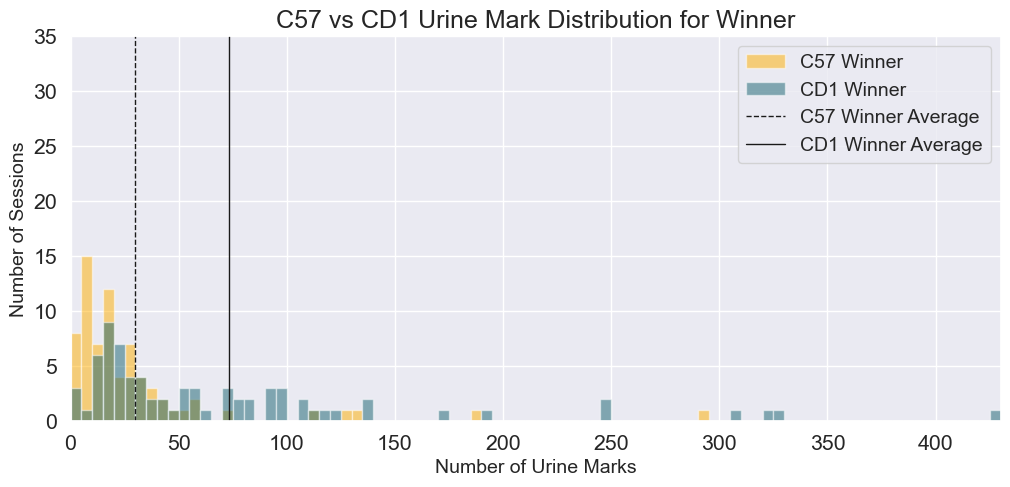

In [219]:
plt.hist(c57_df["winner_number_of_spots"], bins, alpha=0.5, label='C57 Winner', color="#ffaf00")
plt.hist(cd1_df["winner_number_of_spots"], bins, alpha=0.5, label='CD1 Winner', color="#15616f")


plt.axvline(c57_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Winner Average")
plt.axvline(cd1_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Winner Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Winner", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/winner_uma_distribution_bin_size_5.svg")
plt.show()

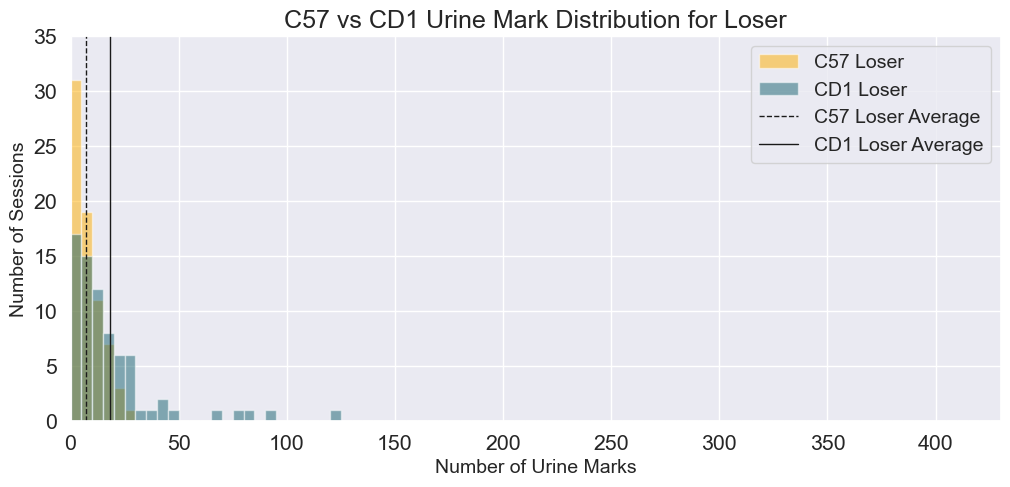

In [220]:
plt.hist(c57_df["loser_number_of_spots"], bins, alpha=0.5, label='C57 Loser', color="#ffaf00")
plt.hist(cd1_df["loser_number_of_spots"], bins, alpha=0.5, label='CD1 Loser', color="#15616f")


plt.axvline(c57_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Loser Average")
plt.axvline(cd1_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Loser Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Loser", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/loser_uma_distribution_bin_size_5.svg")
plt.show()

In [221]:
y_max = 60

In [222]:
bin_width = 10

In [223]:
bins=range(int(urine_and_elo_score_df["winner_number_of_spots"].min()), int(urine_and_elo_score_df["winner_number_of_spots"].max()) + bin_width, bin_width)


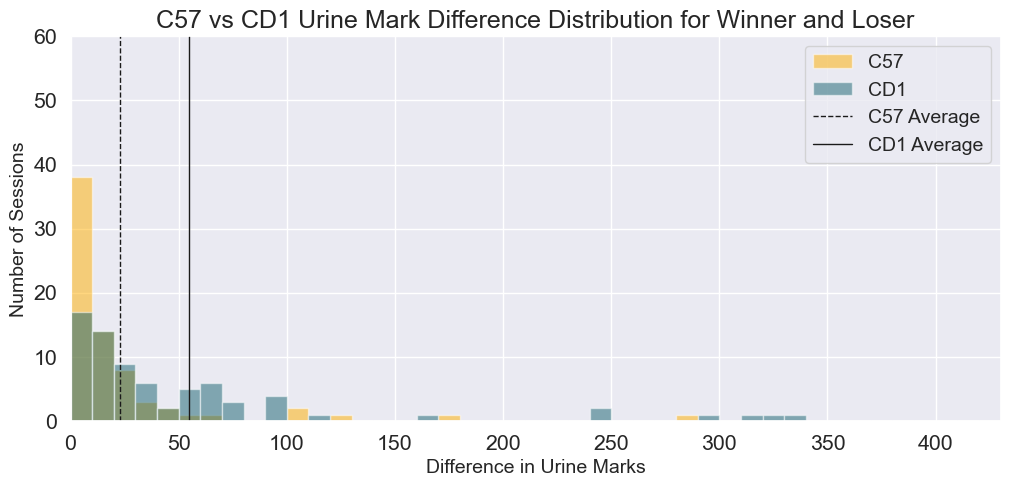

In [224]:


plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57', color="#ffaf00")
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1', color="#15616f")


# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')

plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Average")

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.title("C57 vs CD1 Urine Mark Difference Distribution for Winner and Loser", family="Arial", fontsize=18)
plt.xlabel("Difference in Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.savefig("./proc/urine_marking_plots/winner_and_loser_difference_uma_distribution_bin_size_10.svg")

plt.show()

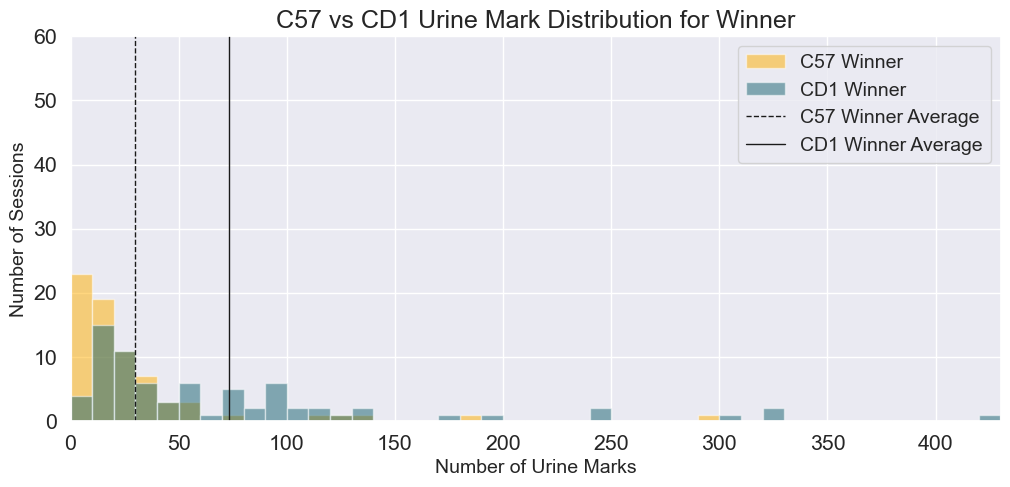

In [225]:
plt.hist(c57_df["winner_number_of_spots"], bins, alpha=0.5, label='C57 Winner', color="#ffaf00")
plt.hist(cd1_df["winner_number_of_spots"], bins, alpha=0.5, label='CD1 Winner', color="#15616f")


plt.axvline(c57_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Winner Average")
plt.axvline(cd1_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Winner Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Winner", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/winner_uma_distribution_bin_size_10.svg")
plt.show()

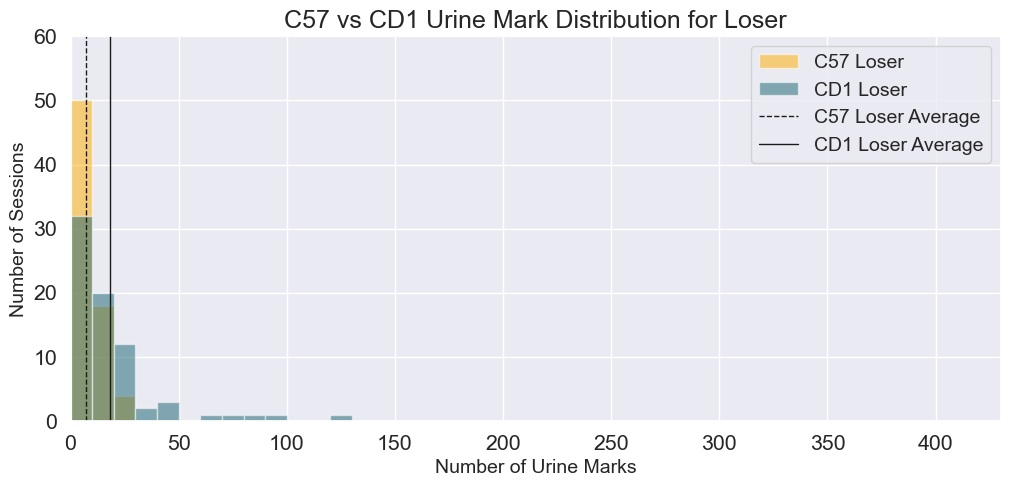

In [226]:
plt.hist(c57_df["loser_number_of_spots"], bins, alpha=0.5, label='C57 Loser', color="#ffaf00")
plt.hist(cd1_df["loser_number_of_spots"], bins, alpha=0.5, label='CD1 Loser', color="#15616f")


plt.axvline(c57_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Loser Average")
plt.axvline(cd1_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Loser Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Loser", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/loser_uma_distribution_bin_size_10.svg")
plt.show()

In [293]:
urine_and_elo_score_df[["cohort", ]]

cohort   cage  processed_cage_number strain        date  winner  loser  \
0    pilot_1  CAGE1                      1    C57  2022-05-19     1.1    1.3   
1    pilot_1  CAGE1                      1    C57  2022-05-26     1.1    1.3   
2    pilot_1  CAGE1                      1    C57  2022-05-20     1.4    1.3   
3    pilot_1  CAGE1                      1    C57  2022-05-25     1.4    1.3   
4    pilot_1  CAGE1                      1    C57  2022-05-24     1.2    1.3   
..       ...    ...                    ...    ...         ...     ...    ...   
141  pilot_2  CAGE6                      6    CD1  2022-07-13     6.2    6.3   
142  pilot_2  CAGE6                      6    CD1  2022-07-13     6.1    6.4   
143  pilot_2  CAGE6                      6    CD1  2022-07-11     6.3    6.4   
144  pilot_2  CAGE6                      6    CD1  2022-08-05     6.3    6.4   
145  pilot_2  CAGE6                      6    CD1  2022-08-04     6.4    6.1   

    ties left_subject_id  left_elo_score  ...  \
0    NaN             1.1          1000.0  ...   
1    tie             1.1          1010.3  ...   
2    NaN             1.4          1019.7  ...   
3    tie             1.4          1028.0  ...   
4    tie             1.2          1000.0  ...   
..   ...             ...             ...  ...   
141  tie             6.2           990.9  ...   
142  tie             6.1          1019.7  ...   
143  NaN             6.3          1010.0  ...   
144  tie             6.3          1009.7  ...   
145  tie             6.4          1011.1  ...   

     right_urine_marking_final_elo_score right_urine_marking_rank  \
0                                  972.0                      4.0   
1                                  972.0                      4.0   
2                                  972.0                      4.0   
3                                  972.0                      4.0   
4                                  972.0                      4.0   
..                                   ...                      ...   
141                               1009.7                      2.0   
142                               1000.8                      3.0   
143                               1000.8                      3.0   
144                               1000.8                      3.0   
145                               1027.0                      1.0   

     session_number  session_number_difference  total_match_number  \
0               1.0                        NaN                   1   
1               5.0                        1.0                   9   
2               2.0                        0.0                   4   
3               4.0                        0.0                   8   
4               3.0                        0.0                   6   
..              ...                        ...                 ...   
141             3.0                        1.0                   5   
142             3.0                        0.0                   6   
143             1.0                        0.0                   2   
144             6.0                        0.0                  12   
145             5.0                        0.0                  10   

     winner_number_of_spots  loser_number_of_spots  \
0                       4.0                    0.0   
1                      43.0                    0.0   
2                      10.0                    0.0   
3                       8.0                    0.0   
4                       0.0                    0.0   
..                      ...                    ...   
141                    34.0                   15.0   
142                    49.0                   34.0   
143                    55.0                   17.0   
144                    53.0                    3.0   
145                   106.0                   28.0   

     adjusted_winner_number_of_spots  adjusted_loser_number_of_spots  \
0                                4.0                             

In [294]:
urine_and_elo_score_df.columns

Index(['cohort', 'cage', 'processed_cage_number', 'strain', 'date', 'winner',
       'loser', 'ties', 'left_subject_id', 'left_elo_score', 'left_ranking',
       'right_subject_id', 'right_elo_score', 'right_ranking',
       'left_number_of_spots', 'right_number_of_spots', 'pee_spot_difference',
       'tube_test_elo_score_difference',
       'home_cage_observation_elo_score_difference',
       'reward_competition_elo_score_difference', 'tube_test_rank_difference',
       'home_cage_observation_rank_difference',
       'reward_competition_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward

In [ ]:
urine_and_elo_score_df[[""]

In [353]:
compact_urine_and_elo_score_df = urine_and_elo_score_df[['cohort', 'processed_cage_number', "winner", "loser", 'strain', 'date', 'winner_number_of_spots', 'loser_number_of_spots']]

In [354]:
compact_urine_and_elo_score_df["urine_spot_difference"] = compact_urine_and_elo_score_df.apply(lambda x: x["winner_number_of_spots"] - x["loser_number_of_spots"], axis=1)
compact_urine_and_elo_score_df["spot_percent_difference"] =  compact_urine_and_elo_score_df.apply(lambda x: x["urine_spot_difference"] / (0.5 * (x["winner_number_of_spots"] + x["loser_number_of_spots"])) * 100 if x["urine_spot_difference"] else 0, axis=1)
compact_urine_and_elo_score_df["spot_number_tie"] = compact_urine_and_elo_score_df["urine_spot_difference"] < 5
compact_urine_and_elo_score_df["spot_percent_tie"] = compact_urine_and_elo_score_df["spot_percent_difference"] < 20
compact_urine_and_elo_score_df["spot_number_then_percent_tie"] = compact_urine_and_elo_score_df.apply(lambda x: (x['spot_number_tie']) | (x['spot_percent_tie']), axis=1)


/tmp/ipykernel_487755/2402659019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_urine_and_elo_score_df["urine_spot_difference"] = compact_urine_and_elo_score_df.apply(lambda x: x["winner_number_of_spots"] - x["loser_number_of_spots"], axis=1)
/tmp/ipykernel_487755/2402659019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_urine_and_elo_score_df["spot_percent_difference"] =  compact_urine_and_elo_score_df.apply(lambda x: x["urine_spot_difference"] / (0.5 * (x["winner_number_of_spots"

In [358]:
compact_urine_and_elo_score_df = compact_urine_and_elo_score_df.sort_values(["strain", "cohort", "date", "processed_cage_number", "winner"]).reset_index(drop=True)

In [361]:
compact_urine_and_elo_score_df

cohort  processed_cage_number  winner  loser strain        date  \
0    pilot_1                      1     1.1    1.3    C57  2022-05-19   
1    pilot_1                      1     1.4    1.2    C57  2022-05-19   
2    pilot_1                      2     2.1    2.3    C57  2022-05-19   
3    pilot_1                      2     2.4    2.2    C57  2022-05-19   
4    pilot_1                      1     1.2    1.1    C57  2022-05-20   
..       ...                    ...     ...    ...    ...         ...   
141  pilot_3                      4     4.4    4.1    CD1  2022-09-16   
142  pilot_3                      5     5.2    5.3    CD1  2022-09-16   
143  pilot_3                      5     5.4    5.1    CD1  2022-09-16   
144  pilot_3                      6     6.3    6.2    CD1  2022-09-16   
145  pilot_3                      6     6.4    6.1    CD1  2022-09-16   

     winner_number_of_spots  loser_number_of_spots  urine_spot_difference  \
0                       4.0                    0.0                    4.0   
1                       6.0                    0.0                    6.0   
2                      15.0                    6.0                    9.0   
3                       5.0                    3.0                    2.0   
4                      17.0                   12.0                    5.0   
..                      ...                    ...                    ...   
141                    97.0                   82.0                   15.0   
142                   123.0                   28.0                   95.0   
143                   326.0                   13.0                  313.0   
144                    83.0                   21.0                   62.0   
145                    26.0                    1.0                   25.0   

     spot_percent_difference  spot_number_tie  spot_percent_tie  \
0                 200.000000             True             False   
1                 200.000000            False             False   
2                  85.714286            False             False   
3                  50.000000             True             False   
4                  34.482759            False             False   
..                       ...              ...               ...   
141                16.759777            False              True   
142               125.827815            False             False   
143               184.660767            False             False   
144               119.230769            False             False   
145               185.185185            False             False   

     spot_number_then_percent_tie  
0                            True  
1                           False  
2                           False  
3                            True  
4                           False  
..                            ...  
141                          True  
142                         False  
143                         False  
144                         False  
145                         False  

[146 rows x 13 columns]

In [360]:
compact_urine_and_elo_score_df.to_csv("./proc/urine_marking_distribution.csv")